# Objetivo del proceso a realizar				
## Objetivos del desafío 1			
- Efectuar una limpieza del dataset provisto. Particularmente, deberá diseñar estrategias para lidiar con los datos perdidos en ciertas variables.		
- Realizar un análisis descriptivo de las principales variables.		
- Crear nuevas columnas a partir de las características dadas que puedan tener valor predictivo.		

### 1) Imports

In [742]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.3f' % x) # Evita la notacion cientifica
pd.set_option('display.max_columns', 500) # Ancho de cantidad de columnas
# pd.set_option('display.max_colwidth', None) #Ancho de lo que tiene dentro la columna

In [743]:
path = '~/Desktop/Data/properatti.csv'
data = pd.read_csv(path, sep = ",", index_col='Unnamed: 0')

In [744]:
df = data.copy()

### 2) Analisis General del Data Set

In [745]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121220 entries, 0 to 121219
Data columns (total 25 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   operation                   121220 non-null  object 
 1   property_type               121220 non-null  object 
 2   place_name                  121197 non-null  object 
 3   place_with_parent_names     121220 non-null  object 
 4   country_name                121220 non-null  object 
 5   state_name                  121220 non-null  object 
 6   geonames_id                 102503 non-null  float64
 7   lat-lon                     69670 non-null   object 
 8   lat                         69670 non-null   float64
 9   lon                         69670 non-null   float64
 10  price                       100810 non-null  float64
 11  currency                    100809 non-null  object 
 12  price_aprox_local_currency  100810 non-null  float64
 13  price_aprox_us

Revisamos el porcentaje de nulos

In [746]:
df.isnull().sum()/df.shape[0]*100

operation                     0.000
property_type                 0.000
place_name                    0.019
place_with_parent_names       0.000
country_name                  0.000
state_name                    0.000
geonames_id                  15.441
lat-lon                      42.526
lat                          42.526
lon                          42.526
price                        16.837
currency                     16.838
price_aprox_local_currency   16.837
price_aprox_usd              16.837
surface_total_in_m2          32.443
surface_covered_in_m2        16.422
price_usd_per_m2             43.395
price_per_m2                 27.687
floor                        93.484
rooms                        60.906
expenses                     88.235
properati_url                 0.000
description                   0.002
title                         0.000
image_thumbnail               2.567
dtype: float64

Transformamos a category las variables currency state_name country_name place_with_parent_names place_name property_type operation.

Transformamos a string las variables title description properati_url


In [747]:
df.iloc[:,1:7]=df.iloc[:,1:7].astype('category')
df.iloc[:,22:25]=df.iloc[:,22:25].astype(str)
df['currency']=df.currency.astype('category')

In [748]:
df.dtypes

operation                       object
property_type                 category
place_name                    category
place_with_parent_names       category
country_name                  category
state_name                    category
geonames_id                   category
lat-lon                         object
lat                            float64
lon                            float64
price                          float64
currency                      category
price_aprox_local_currency     float64
price_aprox_usd                float64
surface_total_in_m2            float64
surface_covered_in_m2          float64
price_usd_per_m2               float64
price_per_m2                   float64
floor                          float64
rooms                          float64
expenses                       float64
properati_url                   object
description                     object
title                           object
image_thumbnail                 object
dtype: object

### 3) Analisis de duplicados

Vamos a ver si tenemos inmuebles duplicados en nuetro dataset.

Definimos que tenemos un duplicado si coinciden las filas "price", "place_name", "title", "surface_total_in_m2"

In [749]:
df.duplicated(['price','place_name','title','surface_total_in_m2']).any()

True

Nos muestra que tenemos duplicados, vamos a estudiarlos

In [750]:
duplicados_mask=df.duplicated(['price','place_name','title','surface_total_in_m2'], keep=False)


df[duplicados_mask].sort_values(['price','place_name','title','surface_total_in_m2'])[:20]


operation property_type            place_name  \
47708       sell     apartment               Florida   
47715       sell     apartment               Florida   
47717       sell     apartment               Florida   
28938       sell     apartment             San Telmo   
88036       sell     apartment             San Telmo   
48580       sell         house     Barrio Alto Camet   
48581       sell         house     Barrio Alto Camet   
48588       sell         house     Barrio Alto Camet   
94684       sell         store                 Lanús   
94694       sell         store                 Lanús   
94705       sell         store                 Lanús   
33524       sell     apartment         Mar del Plata   
63768       sell     apartment         Mar del Plata   
115661      sell     apartment               Córdoba   
115694      sell     apartment               Córdoba   
99138       sell     apartment         Villa Urquiza   
99162       sell     apartment         Villa Urquiza   
26300       sell     apartment              Congreso   
26507       sell     apartment              Congreso   
6446        sell         store  Centro / Microcentro   

                                                         place_with_parent_names  \
47708                 |Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Florida|   
47715                 |Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Florida|   
47717                 |Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Florida|   
28938                                      |Argentina|Capital Federal|San Telmo|   
88036                                      |Argentina|Capital Federal|San Telmo|   
48580   |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Alto Camet|   
48581   |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Alto Camet|   
48588   |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|Barrio Alto Camet|   
94684                             |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|   
94694                             |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|   
94705                             |Argentina|Bs.As. G.B.A. Zona Sur|Lanús|Lanús|   
33524                     |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|   
63768                     |Argentina|Buenos Aires Costa Atlántica|Mar del Plata|   
115661                                               |Argentina|Córdoba|Córdoba|   
115694                                               |Argentina|Córdoba|Córdoba|   
99138                                  |Argentina|Capital Federal|Villa Urquiza|   
99162                                  |Argentina|Capital Federal|Villa Urquiza|   
26300                                       |Argentina|Capital Federal|Congreso|   
26507                                       |Argentina|Capital Federal|Congreso|   
6446                            |Argentina|Capital Federal|Centro / Microcentro|   

       country_name                    state_name geonames_id  \
47708     Argentina      Bs.As. G.B.A. Zona Norte 3433908.000   
47715     Argentina      Bs.As. G.B.A. Zona Norte 3433908.000   
47717     Argentina      Bs.As. G.B.A. Zona Norte 3433908.000   
28938     Argentina               Capital Federal 3428113.000   
88036     Argentina               Capital Federal 3428113.000   
48580     Argentina  Buenos Aires Costa Atlántica         NaN   
48581     Argentina  Buenos Aires Costa Atlántica         NaN   
48588     Argentina  Buenos Aires Costa Atlántica         NaN   
94684     Argentina        Bs.As. G.B.A. Zona Sur         NaN   
94694     Argentina        Bs.As. G.B.A. Zona Sur         NaN   
94705     Argentina        Bs.As. G.B.A. Zona Sur         NaN   
33524     Argentina  Buenos Aires Costa Atlántica 3430863.000   
63768     Argentina  Buenos Aires Costa Atlántica 3430863.000   
115661    Argentina                       Córdoba 3860259.000   
115694    Argentina                       Córdoba 3860259.000   
99138     Argentina      

Luego de observar el dataframe de duplicados, podemos comprobar que efectivamente lo son, asi que procedemos a dropearlos.

In [751]:
df = df.drop_duplicates(['price','place_name','title','surface_total_in_m2'])


Verificamos que todas las propiedades provistas estan para la venta, y ninguna en renta, con lo cual la columna 'operation' no nos aporta mucha informacion.

In [752]:
df.operation.unique()

array(['sell'], dtype=object)

Vamos a revisar los valores estadisticos de las variables numericas de nuestro Data set

In [753]:
cols=['price','price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2','price_usd_per_m2','price_per_m2']
df[cols].describe()

price  price_aprox_local_currency  price_aprox_usd  \
count     94699.000                   94699.000        94699.000   
mean     465578.488                 4287216.602       242977.506   
std     2307937.712                 7044238.337       399231.394   
min           0.000                       0.000            0.000   
25%      110000.000                 1588005.000        90000.000   
50%      185000.000                 2579925.850       146217.000   
75%      420000.000                 4764015.000       270000.000   
max   650000000.000               821271104.300     46545445.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
count            74106.000              91858.000         64887.000   
mean               242.941                137.460          2141.952   
std               1739.620                759.461          2744.342   
min                  0.000                  0.000             0.600   
25%                 51.000                 46.000          1200.000   
50%                 88.000                 77.000          1795.455   
75%                214.000                157.000          2481.481   
max             200000.000             187000.000        206333.333   

       price_per_m2  
count     82363.000  
mean       6772.532  
std       28822.614  
min           1.510  
25%        1534.942  
50%        2200.000  
75%        3333.333  
max     3999999.960

Aca podemos observar algunos valores extraños en el data set:

* El valor minimo de superficie total, es 0.

* El valor minimo de venta es 0.

* El valor maximo de superficie llega a 20 hectareas


### 4) Analisis de columnas

**Analisis Descriptivo de las principales variables:**

Podemos separar a nuestras variables en 3 grandes grupos por su tipo:

Variables georeferenciales:

* geonames_id                  
* lat-lon                       
* lat                           
* lon                           

Variables relacionadas con el precio del inmueble: 

* price_per_m2: Es nuestra variable objetivo, es la que vamos a querer predecir en la siguiente etapa del trabajo, nos representa el precio por metro cuadrado del inmueble.VARIABLE CONTINUA

* price_usd_per_m2: Esta variable nos indica el valor en dolares por metro cuadrado del inmueble publicado.VARIABLE CONTINUA

* price: Esta variable nos indica el precio del inmueble expresado en la moneda "currency".VARIABLE CONTINUA

* currency: Esta variable nos indica la moneda en la que se publico el inmueble, puede valer (usd,ars,uyu,pen).VARIABLE CATEGORICA

Variables relacionadas con el tamaño del inmueble:

* surface_total_in_m2: Esta variable nos indica los metros cuadrados totales de la propiedad publicada.VARIABLE CONTINUA

* surface_covered_in_m2: Esta variable nos indica los metros cuadrados cubiertos de la propiedad publicada.VARIABLE CONTINUA

Variables que nos dan informacion sobre el lugar donde se encuentra la propiedad

* property_type: Nos indica el tipo de propiedad publicada (ph, apartment, house, store).VARIABLE CATEGORICA

* place_name: Nos indica el barrio(si es dentro de CABA) o localidad, de donde esta la propiedad publicada.VARIABLE CATEGORICA

* state_name: Nos indica la provincia en donde se encuentra la propiedad publicada.VARIABLE CATEGORICA

* place_with_parent_names: Es una combinacion de place_name y state_name, en algunos casos, con algunos datos mas sobre la ubicacion, como el partido. place_with_parent_names = |country_name|state_name|place_name|.VARIABLE CATEGORICA

Variables relacionadas con caracteristicas del inmueble:

* floor: Numero de piso en donde esta ubicado el inmueble(en caso de corresponder).VARIABLE CUALITATIVA ORDINAL

* rooms: Esta variable nos indica la cantidad de ambientes que posee el inmueble.VARIABLE CATEGORICA

* expenses: Valor de las expensas del inmueble (en caso de corresponder).VARIABLE CONTINUA

* description: Una breve descripcion sobre la propiedad en venta.

### 5) Análisis inicial de la distribución de los datos

In [754]:
#Para evitar problemas con los strings, convertimos todo el df en minuscula y eliminamos los ".".
df = df.applymap(lambda x: x.lower() if type(x) is str else x)

df = df.replace('\.',"",regex=True)


Droppeamos valores ilogicos, por ejemplo que un valor de superficie total sea menor que el de superficie cubierta, que alguna de las superficies valga 0, o que el precio de venta sea 0

In [755]:
sup_total_incorrecta = np.logical_or(df['surface_total_in_m2'] < df['surface_covered_in_m2'], df['surface_total_in_m2']==0)

df_sup_total_incorrecta=df[sup_total_incorrecta]
df_sup_total_incorrecta.shape

(1398, 25)

In [756]:
df.drop(index=df_sup_total_incorrecta.index, inplace=True)

In [757]:
df[sup_total_incorrecta]

<ipython-input-757-b1fafb12e45e>:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail]
Index: []

In [758]:
precio_incorrecto = df[df.price == 0]
precio_incorrecto

operation property_type place_name place_with_parent_names country_name  \
9761      sell         house    córdoba     |argentina|córdoba|    argentina   

     state_name  geonames_id               lat-lon   lat     lon  price  \
9761    córdoba  3860255.000  45458426,-7567893099 4.546 -75.679  0.000   

     currency  price_aprox_local_currency  price_aprox_usd  \
9761      NaN                       0.000            0.000   

      surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
9761                  NaN                    NaN               NaN   

      price_per_m2  floor  rooms  expenses  \
9761           NaN  2.000  3.000       NaN   

                                                        properati_url  \
9761  http://wwwproperaticomar/165i3_venta_casa_cordoba_invierte-bien   

                             description  \
9761  casa en venta de 2 dorm en armenia   

                                      title  \
9761  se vende casa en el barrio el limonar   

                                                                                                                               image_thumbnail  
9761  https://thumbs4properaticom/2/2hubkpzv0rywdaajsp6ndqi4pju=/trim/198x0/smart/filters:strip_icc()/wwwgva-onlinecomar/318/fotos/fi000500318

In [759]:
df.drop(index = precio_incorrecto.index ,inplace= True)

Dropeamos propiedades falsas

In [760]:
patron_falsas = re.compile(r'estas(\s)?propiedades(\s)?son(\s)?falsas')

encuentra_falsas = df.description.apply(lambda x: re.search(patron_falsas,str(x)))
falsas_mask=encuentra_falsas.notnull()
index_maldad=encuentra_falsas[falsas_mask].index

df = df.drop(index_maldad)

Dropeamos departamentos que tengan mas de 750 m2 (limite tomado a partir de publicaciones de zonaprop), y los que tengan menos de 18 m2(minimo permitido)

In [761]:
departamentos_fueradeumbral = \
df[np.logical_and(df.property_type=='apartment',np.logical_or(df.surface_total_in_m2>750, df.surface_total_in_m2<18))].index

In [762]:
df = df.drop(index =departamentos_fueradeumbral)

Dropeamos inmuebles que sean ventas de pozo, o para inversion, inmuebles que aun no fueron construidos, y por eso tienen un precio "promocionado"

In [763]:
patron_pozo = re.compile(r'pozo|inversion|financiacion|pre-venta|en(\s)?construccion|entrega|cuotas|emprendimiento|a(\s)?desarrollarse|proyecto')

encuentra_pozo = df.description.apply(lambda x: re.search(patron_pozo,str(x)))
                                      
pozo_mask=encuentra_pozo.notnull()

pozo = encuentra_pozo[pozo_mask].apply(lambda x: x.group())
print(df.shape)
df = df.drop(index = pozo.index)
print(df.shape)

patron_pozo = re.compile(r'pozo|inversion|financiacion|pre-venta|en(\s)?construccion|entrega|cuotas|emprendimiento|a(\s)?desarrollarse|proyecto')

encuentra_pozo = df.title.apply(lambda x: re.search(patron_pozo,str(x)))
                                      
pozo_mask=encuentra_pozo.notnull()

pozo = encuentra_pozo[pozo_mask].apply(lambda x: x.group())
print(df.shape)
df = df.drop(index = pozo.index)
print(df.shape)

(107839, 25)
(87535, 25)
(87535, 25)
(86869, 25)


In [764]:
df[df.place_name=='capital federal'].title[:5]

108        casa 180m² con 2 plantas en navarro, julián 2900, argentina, capital federal, por u$s 170000
110    casa 744m² con 2 plantas en del valle iberlucea 2500, argentina, capital federal, por u$s 490000
115             casa 720m² con plantas en palma, diego 1800, argentina, capital federal, por u$s 440000
119        casa 200m² con cochera en barbosa, gerónimo 1400, argentina, capital federal, por u$s 320000
121             casa 340m² con cochera en palma, diego 1300, argentina, capital federal, por u$s 370000
Name: title, dtype: object

In [765]:
place_names=list(df.place_name.unique())

In [766]:
df["PLACE NAME"]=df.place_name

df_capitalfederal_mal_cargado = df[df.place_name=='capital federal']

for place in place_names:
    patron_placenames = re.compile(str(place))
    encuentra_names = df_capitalfederal_mal_cargado.description.apply(lambda x: re.search(patron_placenames,str(x)))
    encuentra_names_mask = encuentra_names.notnull()
    names = encuentra_names[encuentra_names_mask].apply(lambda x: x.group())
    df.loc[names.index,'PLACE NAME']=names
    
for place in place_names:
    patron_placenames = re.compile(str(place))
    encuentra_names = df_capitalfederal_mal_cargado.title.apply(lambda x: re.search(patron_placenames,str(x)))
    encuentra_names_mask = encuentra_names.notnull()
    names = encuentra_names[encuentra_names_mask].apply(lambda x: x.group())
    df.loc[names.index,'PLACE NAME']=names


Eliminamos los pocos registros que no tenian informacion sobre su ubicacion y estaban mal ingresados.

In [767]:
df_mal_ingresados = df[df["PLACE NAME"]=='capital federal']
df_mal_ingresados.shape[0]
df_mal_infresados_index = df_mal_ingresados.index

In [768]:
df = df.drop(df_mal_infresados_index)

Revisamos para capital federal los valores.

In [769]:
df_capital = df[df.state_name=='capital federal']
df_capital['PLACE NAME'].unique()

array(['mataderos', 'liniers', 'belgrano', 'palermo soho', 'palermo',
       'flores', 'boedo', 'las cañitas', 'puerto madero', 'balvanera',
       'caballito', 'navarro', 'colegiales', 'floresta', 'barrio norte',
       'barracas', 'recoleta', 'chacarita', 'nuñez', 'almagro',
       'constitución', 'villa urquiza', 'villa crespo',
       'palermo hollywood', 'monserrat', 'pompeya', 'agronomía',
       'parque centenario', 'palermo chico', 'villa luro', 'villa devoto',
       'san telmo', 'parque avellaneda', 'boca', 'coghlan',
       'san cristobal', 'villa pueyrredón', 'velez sarsfield', 'abasto',
       'versalles', 'villa del parque', 'monte castro', 'retiro', 'nan',
       'parque patricios', 'saavedra', 'villa santa rita', 'carpintería',
       'congreso', 'san jose', 'centro / microcentro', 'once',
       'tribunales', 'paternal', 'parque chacabuco', 'catalinas',
       'san nicolás', 'corrientes', 'ituzaingó', 'córdoba', 'avellaneda',
       'villa general mitre', 'sarmiento', 

In [770]:
df_capital[df_capital['PLACE NAME']=='navarro'].title.values

array(['casa 180m² con 2 plantas en navarro, julián 2900, argentina, capital federal, por u$s 170000'],
      dtype=object)

In [771]:
#Mal cargado
df = df.drop(df[df['PLACE NAME']=='navarro'].index)

In [772]:
df_capital[df_capital['PLACE NAME']=='carpintería'].title.values

array(['departamento venta'], dtype=object)

In [773]:
#Mal cargado
df = df.drop(df[df['PLACE NAME']=='carpintería'].index)

In [774]:
#Mal cargado
df = df.drop(df[df['PLACE NAME']=='ituzaingó'].index)

In [775]:
barrio=df_capital[df_capital['PLACE NAME']=='córdoba']['description'].index

df_capital[df_capital['PLACE NAME']=='córdoba']['description'].values

df.loc[barrio,'PLACE NAME']='palermo'

In [776]:
df_capital[df_capital['PLACE NAME']=='rivadavia']


operation property_type       place_name      place_with_parent_names  \
6952       sell         store  capital federal  |argentina|capital federal|   
10194      sell     apartment  capital federal  |argentina|capital federal|   
21365      sell         store  capital federal  |argentina|capital federal|   
72115      sell         house  capital federal  |argentina|capital federal|   
72420      sell     apartment  capital federal  |argentina|capital federal|   

      country_name       state_name  geonames_id                      lat-lon  \
6952     argentina  capital federal  3433955.000                          NaN   
10194    argentina  capital federal  3433955.000                          NaN   
21365    argentina  capital federal  3433955.000                          NaN   
72115    argentina  capital federal  3433955.000  -346338215043,-584505999727   
72420    argentina  capital federal  3433955.000   -34608474032,-583818630313   

          lat     lon      price currency  price_aprox_local_currency  \
6952      NaN     NaN        NaN      NaN                         NaN   
10194     NaN     NaN        NaN      NaN                         NaN   
21365     NaN     NaN        NaN      NaN                         NaN   
72115 -34.634 -58.451 340000.000      usd                 5999130.000   
72420 -34.608 -58.382  94000.000      usd                 1658583.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
6952               NaN                  NaN                 26.000   
10194              NaN                  NaN                 40.000   
21365              NaN                  NaN                 66.000   
72115       340000.000                  NaN                127.000   
72420        94000.000               27.000                 27.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
6952                NaN           NaN    NaN    NaN       NaN   
10194               NaN           NaN    NaN  1.000       NaN   
21365               NaN           NaN    NaN    NaN       NaN   
72115               NaN      2677.165    NaN    NaN       NaN   
72420          3481.481      3481.481    NaN    NaN  3000.000   

                                                                                                                                                                                                              properati_url  \
6952                                                                                                                               http://wwwproperaticomar/15w56_venta_local_capital-federal_rodriguez-caceres-propiedades   
10194                                                                                                http://wwwproperaticomar/166o1_venta_departamento_capital-federal_balcon_estrenar_el-trebol-morana-inmuebles-servicios   
21365                                                                                                                       http://wwwproperaticomar/17fbm_venta_local_capital-federal_el-trebol-morana-inmuebles-servicios   
72115  http://wwwproperaticomar/1alvl_venta_casa_capital-federal_fernandez-moreno-baldomero_1800_baulera_suite_lavadero_parrilla_patio_quincho_terraza_toilette_luminoso_garage_placard_subte-linea-e_grupo-mega-flores_get   
72420                           http://wwwproperaticomar/1ambn_venta_departamento_capital-federal_rivadavia-av-_1100_piscina_garage_amoblado_subte-linea-d_subte-linea-b_subte-linea-a_subte-linea-e_subte-linea-c_interwin   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [777]:
df.loc[[6952,72420],'PLACE NAME']='centro'
df.loc[72115,'PLACE NAME']='parquechacabuco'
df = df.drop([10194,21365])

In [778]:
barrio=df_capital[df_capital['PLACE NAME']=='olivos'].index
df.loc[barrio,'state_name']='bsas gba zona norte'

In [779]:
barrio = df_capital[df_capital['PLACE NAME']=='santiago del estero'].index
df.loc[barrio,'PLACE NAME']='constitucion'

In [780]:
barrio=df_capital[df_capital['PLACE NAME']=='chubut'].index
df.loc[barrio,'state_name']='bsas gba zona norte'

In [781]:
barrio=df_capital[df_capital['PLACE NAME']=='misiones'].index
df.loc[barrio,'PLACE NAME']='palermo'

In [782]:
barrio=df_capital[df_capital['PLACE NAME']=='lima'].index
df_capital[df_capital['PLACE NAME']=='lima'].title.values



array(['piso en venta ciudad autonoma de buenos aires / buenos aires (a004 3266)',
       'versailles: amplia vivienda de siete ambientes en terreno igualmente amplio con dos cocheras cubiertas y una descubierta en barrio residencial gran parque con pileta',
       'monoambiente - bsanta rita',
       'monoambiente divisible- bsanta rita',
       'departamento divisible - bsanta rita',
       'monoambiente divisible  - bsanta rita',
       'monoambiente divisible - bsanta rita',
       'departamento - villa gralmitre'], dtype=object)

In [783]:
df = df.drop(barrio[0])
df.loc[barrio[1],'PLACE NAME'] = 'versalles'   
df.loc[barrio[2:6],'PLACE NAME']='santarita'
df.loc[barrio[7],'PLACE NAME']='villageneralmitre'


In [784]:
barrio=df_capital[df_capital['PLACE NAME']=='haedo'].index
df.loc[barrio,'state_name']='bsas gba zona oeste'


In [785]:
barrio = df_capital[df_capital['PLACE NAME']=='campana'].index
df = df.drop(barrio)


In [786]:
barrio = df_capital[df_capital['PLACE NAME']=='el zorzal'].index
df.loc[barrio,'PLACE NAME'] = 'liniers'   


In [787]:
barrio = df_capital[df_capital['PLACE NAME']=='uspallata'].index
df.loc[barrio,'PLACE NAME'] = 'parquepatricios' 

In [788]:
barrio=df_capital[df_capital['PLACE NAME']=='tandil'].index
df.loc[barrio,'state_name']='bsas gba zona sur'

In [789]:
barrio=df_capital[df_capital['PLACE NAME']=='azul'].index
df.loc[barrio,'state_name']='bsas gba zona centro'

In [790]:
barrio=df_capital[df_capital['PLACE NAME']=='santa rosa'].index
df.loc[barrio,'state_name']='bsas gba zona norte'

In [791]:
#Mal cargado
df = df.drop(df[df['PLACE NAME']=='las calles'].index)

In [792]:
#Mal cargado
df = df.drop(df[df['PLACE NAME']=='pinto'].index)

In [793]:
df_capital[df_capital['PLACE NAME']=='centenario'].title.values

array(['río de janeiro 900- pcentenario', 'departamento en pcentenario',
       'departamento - pcentenario'], dtype=object)

In [794]:
barrio = df_capital[df_capital['PLACE NAME']=='centenario'].index
df.loc[barrio,'PLACE NAME'] = 'caballito' 

In [795]:
barrio=df_capital[df_capital['PLACE NAME']=='concordia'].index
df.loc[barrio,'PLACE NAME'] = 'villadelparque' 

In [796]:
barrio=df_capital[df_capital['PLACE NAME']=='delta'].index
df.loc[barrio,'PLACE NAME'] = 'parquechacabuco' 

In [797]:
barrio=df_capital[df_capital['PLACE NAME']=='puerto'].index
df.loc[barrio,'PLACE NAME'] = 'puertomadero' 

In [798]:
barrio=df_capital[df_capital['PLACE NAME']=='moreno'].index
df.loc[barrio,'PLACE NAME'] = 'parquechacabuco' 

In [799]:
barrio=df_capital[df_capital['PLACE NAME']=='tres arroyos'].index
df.loc[barrio,'PLACE NAME'] = 'villageneralmitre' 

In [800]:
barrio=df_capital[df_capital['PLACE NAME']=='la paz'].index
df.loc[barrio,'PLACE NAME'] = 'parquechacabuco' 

Separamos las columnas que consideramos tengan alguna relacion con el precio_per_m2 o nos puedan brindar informacion util 

In [801]:
cols_utiles_sin_price=['property_type','PLACE NAME','place_with_parent_names','state_name','currency'\
            ,'price_aprox_local_currency','price_aprox_usd','surface_total_in_m2','surface_covered_in_m2'\
            ,'price_usd_per_m2','price_per_m2','floor','rooms','expenses','description']

In [802]:
groupby_property_type=df.groupby('property_type')[cols_utiles_sin_price].median()
groupby_property_type

price_aprox_local_currency  price_aprox_usd  \
property_type                                                
apartment                     2117340.000       120000.000   
house                         4234680.000       240000.000   
ph                            2117340.000       120000.000   
store                         3652411.500       207000.000   

               surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
property_type                                                                 
apartment                   61.000                 55.000          2148.289   
house                      286.000                180.000          1041.667   
ph                          98.000                 75.000          1307.692   
store                      167.000                120.000          1580.000   

               price_per_m2  floor  rooms  expenses  
property_type                                        
apartment          2538.462  3.000  2.000  1800.000  
house              1518.325  2.000  4.000  4800.000  
ph                 1714.286  2.000  3.000   500.000  
store              1977.401  1.000  1.000  1111.000

Dado que 'price', depende del valor de currency, si esta en usd o en ars, vamos a calcularlos por separados, para no crear un bias.

In [803]:
groupby_property_type_price_usd=df[df.currency=='usd'].groupby('property_type')['price'].median()
groupby_property_type_price_ars=df[df.currency=='ars'].groupby('property_type')['price'].median()

groupby_property_type['price_usd']=groupby_property_type_price_usd
groupby_property_type['price_ars']=groupby_property_type_price_ars
groupby_property_type['cant de propiedades']=df.groupby('property_type')['operation'].count()

groupby_property_type

price_aprox_local_currency  price_aprox_usd  \
property_type                                                
apartment                     2117340.000       120000.000   
house                         4234680.000       240000.000   
ph                            2117340.000       120000.000   
store                         3652411.500       207000.000   

               surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
property_type                                                                 
apartment                   61.000                 55.000          2148.289   
house                      286.000                180.000          1041.667   
ph                          98.000                 75.000          1307.692   
store                      167.000                120.000          1580.000   

               price_per_m2  floor  rooms  expenses  price_usd   price_ars  \
property_type                                                                
apartment          2538.462  3.000  2.000  1800.000 129000.000 1361000.000   
house              1518.325  2.000  4.000  4800.000 250000.000 1400000.000   
ph                 1714.286  2.000  3.000   500.000 125000.000 1035000.000   
store              1977.401  1.000  1.000  1111.000 230000.000  900000.000   

               cant de propiedades  
property_type                       
apartment                    43969  
house                        32957  
ph                            4878  
store                         3423

In [804]:
df_toplot=groupby_property_type.reset_index()

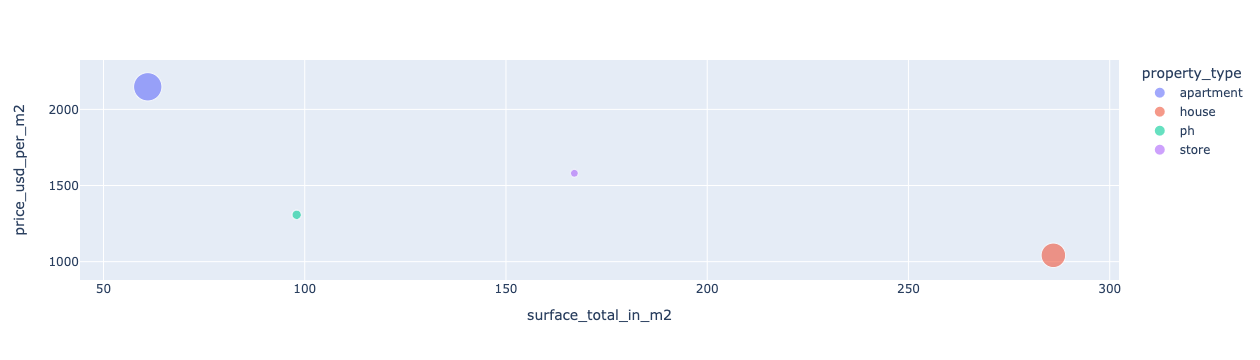

In [805]:
fig = px.scatter(data_frame = df_toplot, x = "surface_total_in_m2", y = "price_usd_per_m2",
                 size = "cant de propiedades", color = "property_type", opacity = 0.6)
fig.show()


Al agrupar las propiedades por su tipo, podemos realizar las siguientes observaciones:

*  Las casas son las propiedades que tienen el precio mas bajo en relacion a sus metros cuadrados.

*  Los departamentos son las propiedades que mayor valor por metro cuadrado tienen.

*  La mayoria de los inmuebles publicados son departamentos, seguidos por las casas.

In [806]:
groupby_provincia_price_usd=df[df.currency=='usd'].groupby('state_name')['price'].median()
groupby_provincia_price_ars=df[df.currency=='ars'].groupby('state_name')['price'].median()

groupby_provincia=df.groupby('state_name')[cols_utiles_sin_price].median()

groupby_provincia['price_usd']=groupby_provincia_price_usd
groupby_provincia['price_ars']=groupby_provincia_price_ars
groupby_provincia['cant de propiedades']=df.groupby('state_name')[cols_utiles_sin_price].count().property_type


groupby_provincia=groupby_provincia.sort_values('cant de propiedades',ascending=False)
groupby_provincia


price_aprox_local_currency  price_aprox_usd  \
state_name                                                                  
capital federal                              2911342.500       165000.000   
bsas gba zona norte                          4234680.000       240000.000   
bsas gba zona sur                            2519634.600       142800.000   
córdoba                                      1830701.560       103754.800   
buenos aires costa atlántica                 1764450.000       100000.000   
bsas gba zona oeste                          2117340.000       120000.000   
santa fe                                     1499782.500        85000.000   
buenos aires interior                        2293785.000       130000.000   
río negro                                    2823120.000       160000.000   
mendoza                                      2293785.000       130000.000   
tucumán                                      1632787.790        92538.060   
neuquén                                      2558452.500       145000.000   
misiones                                     1484352.560        84125.510   
entre ríos                                   1679246.915        95171.125   
salta                                        1729161.000        98000.000   
chubut                                       3352455.000       190000.000   
san luis                                     2284896.140       129496.225   
la pampa                                     1682266.330        95342.250   
corrientes                                   4896348.750       277500.000   
chaco                                        2284896.140       129496.225   
san juan                                     8411331.650       476711.250   
tierra del fuego                             2177050.390       123384.080   
jujuy                                        2454129.570       139087.510   
santa cruz                                   2473921.050       140209.190   
catamarca                                    5999130.000       340000.000   
formosa                                      1367833.835        77521.825   
santiago del estero                          2737413.425       155142.590   
la rioja                                     1286438.790        72908.770   
bsas gba zona centro                         2293785.000       130000.000   

                              surface_total_in_m2  surface_covered_in_m2  \
state_name                                                                 
capital federal                            71.000                 63.000   
bsas gba zona norte                       193.000                140.000   
bsas gba zona sur                         133.000                102.000   
córdoba                                    90.000                100.000   
buenos aires costa atlántica               75.000                 69.000   
bsas gba zona oeste                       169.000                 90.000   
santa fe                                   70.000                 62.000   
buenos aires interior                     249.500                120.000   
río negro                                 175.000                125.000   
mendoza                                   164.500                120.000   
tucumán                                   128.000                 95.500   
neuquén                                   115.500                 95.000   
misiones                                  225.000                 90.000   
entre ríos                                182.500                100.000   
salta                                     184.000                 99.000   
chubut                                    140.000                120.000   
san luis                                  240.000                113.000   
la pampa                                  130.000                116.500   
corrientes                                121.000                120.000   
chaco                                     205.

In [807]:
groupby_provincia_toplot=groupby_provincia.reset_index()

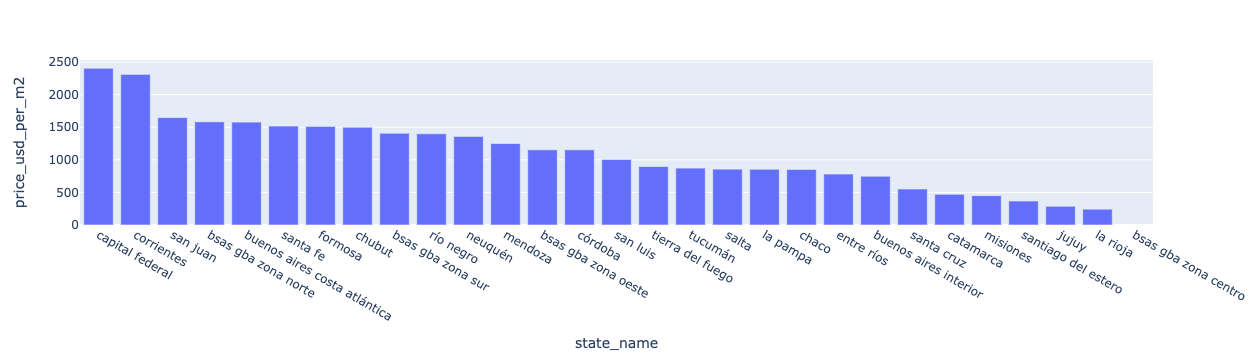

In [808]:
fig = px.bar(groupby_provincia_toplot, x="state_name", y="price_usd_per_m2",  barmode='stack')

fig.update_layout(
    hoverlabel=dict(
        bgcolor="white", 
        font_size=16, 
        font_family="Rockwell"
    )
)

fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'}) #Ordena manera decreciente


fig.show()

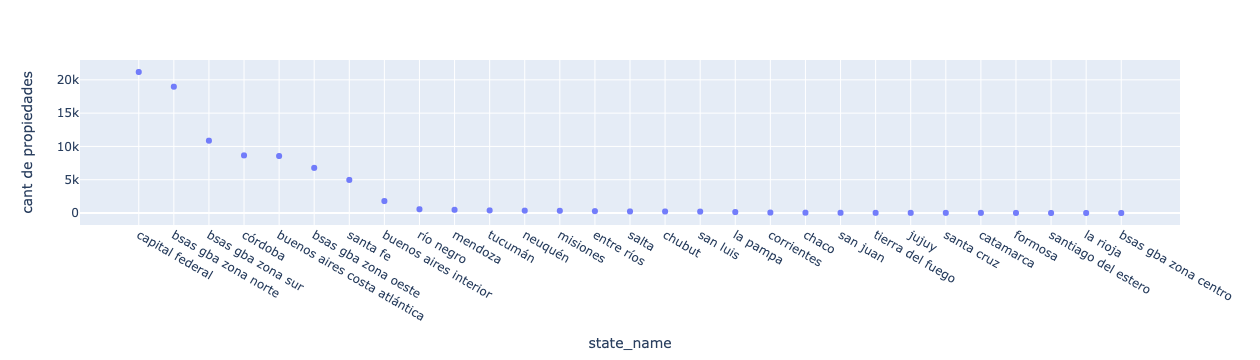

In [809]:
fig = px.scatter(data_frame = groupby_provincia_toplot, y = "cant de propiedades", x = "state_name",
                  opacity = 0.9)
fig.show()

Al agrupar las propiedades por provincia, podemos realizar las siguientes observaciones:

*  Las propiedades que se encuentran en capital federal, son las que tienen un precio por metro cuadrado en usd mas alto.

*  La mayor cantidad de propiedades en venta, se encuentran en capital federal.


### 6) Analisis de consistencia y calidad de los datos

## place_with_parent_names

place_with_parent_names = |country_name|state_name|place_name|, con lo cual, no nos da informacion extra, y es mas facil utilizar para los groupby sus columnas "hijas", con lo cual, la utilizaremos para completar "place_name" y "Provincia, que tiene algunos nulos y luego la descartaremos.


Vamos a comprobar si podemos completar place_name, con place_with_parent_names. Para esto, vamos a eliminar las filas donde haya NaN en place_name y comparar si es igual al anteultimo elemento de place_with_parent_names, al aplicarle un split(el ultimo es el pipe).

In [810]:
place_name_tester=df.place_with_parent_names.apply(lambda x: x.split('|')[-2])
place_name_tester

0               mataderos
1                la plata
2               mataderos
3                 liniers
4                  centro
               ...       
121214         san isidro
121215           belgrano
121216             beccar
121218        plaza colón
121219    capital federal
Name: place_with_parent_names, Length: 85227, dtype: object

In [811]:
place_name_null_mask = df.place_name.isnull()

In [812]:
(place_name_tester[~place_name_null_mask]==df.place_name[~place_name_null_mask]).all()

True

Comprobamos que podemos imputar el valor de place_name , a partir de la columna place_with_parent_names, asi que vamos a imputarlo, creando una nueva columna, que utilice la informacion de los registros anteriores

In [813]:
df.loc[place_name_null_mask,'PLACE NAME']=place_name_tester

df['PLACE NAME'].isnull().sum()

0

Nota: Esto ocurre para todos los casos salvo para cuando la propiedad esta radicada en mar del plata

In [814]:
df_mardelplata_centro=df[np.logical_and(df.state_name!='capital federal', df['PLACE NAME']=='centro')]

df.loc[df_mardelplata_centro.index,'PLACE NAME'] = 'mar del plata'

In [815]:
patron_microcentro = re.compile(r'centro')

encontra_microcentro = df['PLACE NAME'].apply(lambda x: re.match(patron_microcentro,str(x)))

encontra_microcentro_mask = encontra_microcentro.notnull()

index_microcentro=encontra_microcentro[encontra_microcentro_mask].index

df.loc[index_microcentro,'PLACE NAME']='centro/microcentro'

Si bien no hay valores np.NaN, podemos ver que hay una categoria 'nan', que nos quedo, son pocos valores, y todos corresponden a la misma ubicacion "fernandez"

In [816]:
df[df['PLACE NAME']=='nan']

operation property_type       place_name      place_with_parent_names  \
842         sell         store  capital federal  |argentina|capital federal|   
846         sell         house  capital federal  |argentina|capital federal|   
4792        sell         store  capital federal  |argentina|capital federal|   
10720       sell         store  capital federal  |argentina|capital federal|   
16128       sell         house  capital federal  |argentina|capital federal|   
38472       sell         store  capital federal  |argentina|capital federal|   
71357       sell         house  capital federal  |argentina|capital federal|   
75769       sell     apartment  capital federal  |argentina|capital federal|   
112424      sell            ph  capital federal  |argentina|capital federal|   

       country_name       state_name  geonames_id  \
842       argentina  capital federal  3433955.000   
846       argentina  capital federal  3433955.000   
4792      argentina  capital federal  3433955.000   
10720     argentina  capital federal  3433955.000   
16128     argentina  capital federal  3433955.000   
38472     argentina  capital federal  3433955.000   
71357     argentina  capital federal  3433955.000   
75769     argentina  capital federal  3433955.000   
112424    argentina  capital federal  3433955.000   

                            lat-lon     lat     lon       price currency  \
842                             NaN     NaN     NaN   53000.000      usd   
846                             NaN     NaN     NaN  495000.000      usd   
4792                            NaN     NaN     NaN   60000.000      usd   
10720                           NaN     NaN     NaN   50000.000      usd   
16128                           NaN     NaN     NaN 2700000.000      usd   
38472                           NaN     NaN     NaN 1000000.000      usd   
71357   -346268126273,-585232401467 -34.627 -58.523         NaN      NaN   
75769   -346405417155,-584785251993 -34.641 -58.479   79800.000      usd   
112424                          NaN     NaN     NaN  105000.000      usd   

        price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
842                     935158.500        53000.000                  NaN   
846                    8734027.500       495000.000              371.000   
4792                   1058670.000        60000.000                  NaN   
10720                   882225.000        50000.000               22.000   
16128                 47640150.000      2700000.000             3484.000   
38472                 17644500.000      1000000.000              345.000   
71357                          NaN              NaN              380.000   
75769                  1408031.100        79800.000               44.000   
112424                 1852672.500       105000.000                  NaN   

        surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
842                    24.000               NaN      2208.333    NaN    NaN   
846                   300.000          1334.232      1650.000    NaN    NaN   
4792                   35.000               NaN      1714.286    NaN    NaN   
10720                  22.000          2272.727      2272.727    NaN    NaN   
16128                 890.000           774.971      3033.708    NaN    NaN   
38472                 187.000          2898.551      5347.594    NaN    NaN   
71357                 351.000               NaN           NaN    NaN    NaN   
75769                  44.000          1813.636      1813.636    NaN    NaN   
112424                 68.000               NaN      1544.118    NaN    NaN   

        expenses  \
842          NaN   
846          NaN   
4792         NaN   
10720        NaN   
16128        NaN   
38472        NaN   
71357        NaN   
75769   1900.000   
112424       NaN   

                                                                                                                                                                 

In [817]:
fila_fernandez = df[df['PLACE NAME']=='nan'].index[:6]
df.loc[fila_fernandez,'PLACE NAME']='fernandez'

dropeamos los valores que no pudimos obtener informacion de donde eran

In [818]:
df = df.drop(df[df['PLACE NAME']=='nan'].index)
df[df['PLACE NAME']=='nan']

Empty DataFrame
Columns: [operation, property_type, place_name, place_with_parent_names, country_name, state_name, geonames_id, lat-lon, lat, lon, price, currency, price_aprox_local_currency, price_aprox_usd, surface_total_in_m2, surface_covered_in_m2, price_usd_per_m2, price_per_m2, floor, rooms, expenses, properati_url, description, title, image_thumbnail, PLACE NAME]
Index: []

## surface_covered_in_m2

Vamos a imputar los valores NaN de surface_covered_in_m2, con informacion que encontremos el la variable description y ponerlos en una nueva columna que llamaremos SUPERFICIE CUBIERTA EN M2

Vamos a imputar valores de surface_covered_in_m2, a partir de datos obtenidos de la columna description

Para lo que es superficie cubierta, utilizamos un criterio para acotar de 404.9m2 maximo(quantile 90), para lo que serian casos como grandes depositos y 65m2, como minimo(quantile 10)

In [819]:
df['SUPERFICIE CUBIERTA EN M2']=df.surface_covered_in_m2

surface_covered_in_m2_null_mask=df.surface_covered_in_m2.isna()
patron_superficie_cubierta = re.compile(r'(cub(:)?\d+(m²|m2))|((cubierta|cub)(de)?(\d+))((m²|m2))|\d+(m²|m2)(cub)')

encuentra_superficie_cubierta = df.loc[surface_covered_in_m2_null_mask,'description'].apply(lambda x: re.search(patron_superficie_cubierta,str(x)))

encuentra_superficie_cubierta_mask=encuentra_superficie_cubierta.notnull()

superficie_cubierta=encuentra_superficie_cubierta[encuentra_superficie_cubierta_mask].apply(lambda x: x.group())

patron_limpiame_sup_cubierta = re.compile(r'\d+')
limpiame_sup_cubierta = superficie_cubierta.apply(lambda x: re.search(patron_limpiame_sup_cubierta,str(x)))

superficie_cubierta_str=limpiame_sup_cubierta.apply(lambda x: x.group())

superficie_cubierta_int = superficie_cubierta_str.astype(int)

superficie_cubierta_int_acotado_mask = np.logical_and(superficie_cubierta_int < superficie_cubierta_int.quantile(0.9),superficie_cubierta_int > superficie_cubierta_int.quantile(0.1))

superficie_cubierta_int_acotado=superficie_cubierta_int[superficie_cubierta_int_acotado_mask]

In [820]:
df.loc[surface_covered_in_m2_null_mask,'SUPERFICIE CUBIERTA EN M2'] = superficie_cubierta_int_acotado

## surface_total_in_m2

Vamos a completar valores a partir de datos que aparecen en description, creando una nueva columna llamada SUPERFICIE TOTAL EN M2

Utilizamos como criterio para acotar, el valor maximo de superficie total de 700m2(q3), y como minimo 44m2

Elegimos acotar los valores obtenidos con Regex, para no generar un bias, a partir de datos erroneos que haya tomado el patron.

In [821]:
df['SUPERFICIE TOTAL EN M2']=df.surface_total_in_m2

surface_total_in_m2_null_mask=df.surface_total_in_m2.isna()

patron_superficie_total = re.compile(r'(sup(\s)?cub(:)?(\s)?\d+(m²|m2|mts2))|((cubierta|cub)(\s)?(de)?(\s)?(\d+))((m²|m2|mts2))|\d+(\s)?(m²|m2|mts2)(\s)?(cub)|\d+\d+?(m²|m2|mts2)')

encuentra_superficie_total = df.loc[surface_total_in_m2_null_mask,'description'].apply(lambda x: re.search(patron_superficie_total,str(x)))

encuentra_superficie_total_mask=encuentra_superficie_total.notnull()

superficie_total_y_cubierta=encuentra_superficie_total[encuentra_superficie_total_mask].apply(lambda x: x.group())

patron_cubierta = re.compile(r'cub')

valores_sup_cubierta=superficie_total_y_cubierta.apply(lambda x:re.search(patron_cubierta,str(x)))

superficie_total=superficie_total_y_cubierta[valores_sup_cubierta.isnull()]


superficie_total_sin_m2=(superficie_total.replace('(m²|m2|mts2)','', regex=True))

superficie_total_int = superficie_total_sin_m2.astype(int)
superficie_total_int_acotado_mask = np.logical_and(superficie_total_int < superficie_total_int.quantile(0.8), superficie_total_int > superficie_total_int.quantile(0.2))

superficie_total_int_acotado=superficie_total_int[superficie_total_int_acotado_mask]



In [822]:
df.loc[surface_total_in_m2_null_mask,'SUPERFICIE TOTAL EN M2'] = superficie_total_int_acotado


## Price

El precio price_usd_per_m2, coincide con price/surface_covered_in_m2, cuando currency ==usd, para esto nos vamos a crear una nueva columna llamada PRECIO USD POR M2

In [823]:
df_dolares = df[df.currency=='usd']

df['PRECIO USD POR M2']=df_dolares[['price','surface_total_in_m2']].apply(lambda x: 0 if x.surface_total_in_m2 == 0 else x.price/x.surface_total_in_m2, axis=1)


In [824]:
df[['PRECIO USD POR M2','price_usd_per_m2']].sample(10)

PRECIO USD POR M2  price_usd_per_m2
43037                 NaN               NaN
72192            1053.922          1053.922
9330                  NaN               NaN
8626                  NaN               NaN
29228            1730.769          1730.769
77861                 NaN               NaN
93593                 NaN               NaN
7088                  NaN               NaN
116271           2142.857          2142.857
35916                 NaN               NaN

In [825]:
df['PRECIO USD POR M2'].notnull().sum()

44788

In [826]:
df['price_usd_per_m2'].notnull().sum()

48896

Como PRECIO USD POR M2 es igual que price_usd_per_m2, vamos a imputar los valores que podamos de PRECIO USD POR M2 con price_usd_per_m2

In [827]:
PRECIO_USD_POR_M2_null = df['PRECIO USD POR M2'].isna()

df.loc[PRECIO_USD_POR_M2_null,'PRECIO USD POR M2'] = df.loc[PRECIO_USD_POR_M2_null,'price_usd_per_m2']

#### Los precios estan en distintas monedas.

In [828]:
df.currency.value_counts()

usd    66657
ars     7027
pen        1
uyu        1
Name: currency, dtype: int64

##### Primero, vamos a estudiar los casos donde currency vale pen y uyu

In [829]:
df_currency_uyu=df[df.currency=='uyu']
df_currency_uyu.description.values

array(['casa con calefacción central, mendoza, san roque, por $ 650000000'],
      dtype=object)

In [830]:
df_currency_uyu

operation property_type place_name        place_with_parent_names  \
107390      sell         house  san roque  |argentina|mendoza|san roque|   

       country_name state_name  geonames_id lat-lon  lat  lon         price  \
107390    argentina    mendoza  3836586.000     NaN  NaN  NaN 650000000.000   

       currency  price_aprox_local_currency  price_aprox_usd  \
107390      uyu               405477284.730     22980378.290   

        surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
107390                  NaN                    NaN               NaN   

        price_per_m2  floor  rooms  expenses  \
107390           NaN    NaN    NaN       NaN   

                                                                             properati_url  \
107390  http://wwwproperaticomar/1by0s_venta_casa_san-roque_garage_ciudad-inmobiliaria_go2   

                                                              description  \
107390  casa con calefacción central, mendoza, san roque, por $ 650000000   

                     title  \
107390  casa - san vicente   

                                                                                                                                                                                                                image_thumbnail  \
107390  https://thumbs4properaticom/2/pa0rbudkrk6ggvfynighuzabjmw=/trim/198x0/smart/filters:strip_icc()/tbcns3-accelerateamazonawscom/pictures/93074386646834267802048084061149412749606864096523041674189414770450190912595jpg   

       PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
107390  san roque                        NaN                     NaN   

        PRECIO USD POR M2  
107390                NaN

In [831]:
#Dado que el valor esta en otra moneda y nos parece una suma ilogica el precio, vamos a dropearlo
df = df.drop(index = df_currency_uyu.index)


In [832]:
df[df.currency=='pen'].description.values

array(['ref: 56duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u hay 3 departamentos en venta, todos con cocina, termotanque y calefactores '],
      dtype=object)

La descripcion que podemos encontrar, es un poco confusa sobre los precios que usariamos para imputar, ya que por ejemplo no nos queda claro en que tipo de moneda esta, por lo que optamos por dropear esta fila.

In [833]:
df[df.currency=='pen']

operation property_type       place_name      place_with_parent_names  \
50388      sell     apartment  capital federal  |argentina|capital federal|   

      country_name         state_name  geonames_id lat-lon  lat  lon  \
50388    argentina  bsas gba zona sur  3433955.000     NaN  NaN  NaN   

           price currency  price_aprox_local_currency  price_aprox_usd  \
50388 950000.000      pen                 5167162.350       292848.330   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
50388                  NaN                    NaN               NaN   

       price_per_m2  floor  rooms  expenses  \
50388           NaN    NaN    NaN       NaN   

                                                                                          properati_url  \
50388  http://wwwproperaticomar/19e90_venta_departamento_capital-federal_www-inmobiliariadelgado-com-ar   

                                                                                                                                           description  \
50388  ref: 56duplex en venta de 1 dormitorio con aproximadamente 50m2 c/u hay 3 departamentos en venta, todos con cocina, termotanque y calefactores    

                                           title  \
50388  duplex a la venta | liniers 1200 | tandil   

                                                                                                                                                        image_thumbnail  \
50388  https://thumbs4properaticom/8/_cbxayr_9pdysgqesqna8fgtqy4=/trim/198x0/smart/filters:strip_icc()/wwwinmobiliariadelgadocomar/exportacao/fotos/798jpg%3f1497443268   

      PLACE NAME  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
50388     tandil                        NaN                  50.000   

       PRECIO USD POR M2  
50388                NaN

In [834]:
df.drop(index = df[df.currency=='pen'].index, inplace=True)
df.reset_index(drop=True,inplace=True)

#### **Ahora vamos a comprobar si columnas como 'price_aprox_local_currency' ,'price_aprox_usd' ,'place_with_parent_names' ,tienen alguna utilidad para nosotros, o la informacion que nos dan, las tenemos contenidas en otras columnas**

## 'price_aprox_local_currency', 'price_aprox_usd',

In [835]:
df[['price_aprox_local_currency','price_aprox_usd','price','currency']].sample(5)

price_aprox_local_currency  price_aprox_usd      price currency
46860                 5822685.000       330000.000 330000.000      usd
28607                10057365.000       570000.000 570000.000      usd
22885                 1764450.000       100000.000 100000.000      usd
42417                 1358626.500        77000.000  77000.000      usd
61381                 5293350.000       300000.000 300000.000      usd

Observando el dataset, vemos que price_aprox_local_currency(ars), se aproxima al valor de price, cuando currency esta en 'ars'

Tambien vemos que price_aprox_usd, coincide con el valor de price, cuando currency esta en 'usd'.


In [836]:
ars_mask = df.currency == 'ars'

df_ars=df[ars_mask]

rel = df_ars.price/df_ars.price_aprox_local_currency
relacion = rel.mean()
relacion

1.0099155770024748

*Observamos que la relacion entre price y price_aprox_local_currency, es "relacion"*


Nuestro objetivo, es obtener informacion nueva de price_aprox_local_currency y price_aprox_usd, para completar PRICE USD POR M2, price, price_per_m2

Veamos primero si nos son utiles estas columnas para lo que queremos hacer.

In [837]:
notnull_price_aprox_local_currency=df.price_aprox_local_currency.notnull()
notnull_price_aprox_usd=df.price_aprox_usd.notnull()
price_ars_usd = np.logical_or((df.currency == 'usd'),(df.currency == 'ars'))
null_price_ars_usd=df.price[price_ars_usd].isnull()


price_local_o_price_usd=np.logical_or(notnull_price_aprox_local_currency,notnull_price_aprox_usd)

null_price_notnull_price_local_o_price_usd=np.logical_and(price_local_o_price_usd,null_price_ars_usd)

null_price_notnull_price_local_o_price_usd.any()

False

Por lo tanto, comprobamos que **NO HAY** ningun valor no nulo en price_aprox_usd o price_aprox_local_currency, que podamos utilizar para imputar price, con currency 'ars' o 'usd'

Vamos a imputar los valores NaN de Price, con informacion que encontremos el la variable description y ponerlos en una nueva columna que llamaremos PRICE, dependiendo si son usd o pesos, tambien completaremos una nueva columna que llamaremos CURRENCY

#### Price en usd

Vamos a tomar como criterio de valor maximo de price en usd 265.000(q3), y un valor minimo de 95000(q1)

Dado que vamos a trabajar con Regex, vamos a eliminar los espacios del df, para simplificar los patrones de busqueda 

In [838]:
df = df.replace(" ","", regex=True)

In [839]:
df['PRICE']=df.price
df['CURRENCY']=df.currency

price_null_mask = df.price.isnull()

patron_price_usd = re.compile(r'u\$d\d+')

encuentra_price_usd = df.loc[price_null_mask,'title'].apply(lambda x: re.search(patron_price_usd,str(x)))
encuentra_price_usd_mask=encuentra_price_usd.notnull()

price_usd_str = encuentra_price_usd.loc[encuentra_price_usd_mask].apply(lambda x: x.group())

price_usd_clean = price_usd_str.apply(lambda x: x.split('u$d')[1])

price_usd_int = price_usd_clean.astype(int)

price_usd_int_acotado_mask = \
np.logical_and(price_usd_int < price_usd_int.quantile(0.75), price_usd_int > price_usd_int.quantile(0.25))

price_usd_int_acotado=price_usd_int[price_usd_int_acotado_mask]

df.loc[price_usd_int_acotado.index,'PRICE']=price_usd_int_acotado
df.loc[price_usd_int_acotado.index,'CURRENCY']='usd'


#### Price en ars

In [840]:
price_null_mask = df.price.isnull()

patron_price_ars = re.compile(r'\$\d+')

encuentra_price_ars = df.loc[price_null_mask,'title'].apply(lambda x: re.search(patron_price_ars,str(x)))
encuentra_price_ars_mask=encuentra_price_ars.notnull()

price_ars_str = encuentra_price_ars.loc[encuentra_price_ars_mask].apply(lambda x: x.group())


price_ars_clean = price_ars_str.apply(lambda x: x.split('$')[1])

price_ars_int = price_ars_clean.astype(int)

price_ars_int_acotado_mask = \
np.logical_and(price_ars_int < price_ars_int.quantile(0.75), price_ars_int > price_ars_int.quantile(0.25))

price_ars_int_acotado=price_ars_int[price_ars_int_acotado_mask]

df.loc[price_ars_int_acotado.index,'PRICE']=price_ars_int_acotado
df.loc[price_ars_int_acotado.index,'CURRENCY']='ars'


Ahora vamos a crear una nueva columna que se llame PRECIO USD, que sera el precio en usd del inmueble

In [841]:
df_usd = df[df['CURRENCY']=='usd']

df['PRECIO USD'] = df[['PRECIO USD POR M2','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD POR M2']*x['SUPERFICIE TOTAL EN M2'], axis=1)

df.loc[df_usd.index,'PRECIO USD'] = df.PRICE

## Depositos / Naves industriales

Vamos a clasificar un nuevo grupo, que seran aquellas propiedades que ofrezcan tambien un deposito, o que se traten de naves industriales.

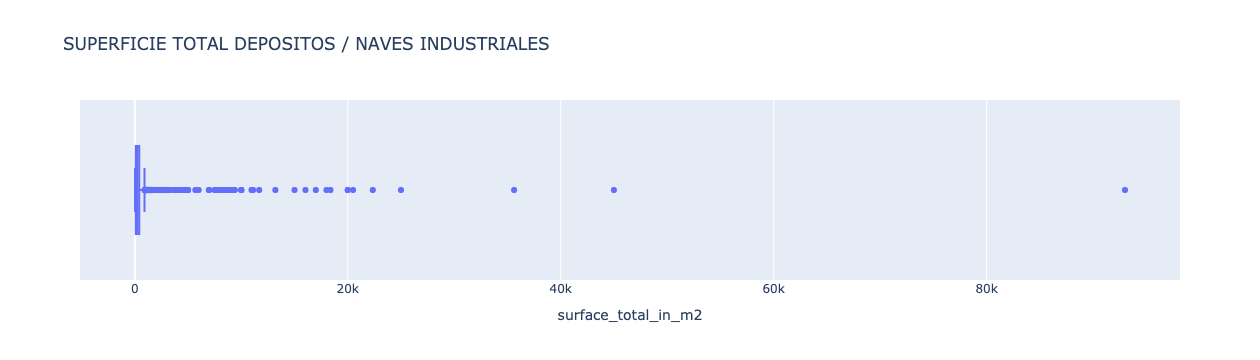

In [842]:
patron_deposito = re.compile(r'deposito|galpon|nave|industrial|hangar')

encuentra_deposito = df.description.apply(lambda x: re.search(patron_deposito, str(x)))


encuentra_deposito_mask = encuentra_deposito.notnull()

px.box(df[encuentra_deposito_mask], x='surface_total_in_m2', title= 'SUPERFICIE TOTAL DEPOSITOS / NAVES INDUSTRIALES')

In [843]:
df[encuentra_deposito_mask].shape[0]

3800

In [844]:
df['TIPO DE PROPIEDAD']=df.property_type

df.loc[encuentra_deposito_mask,'TIPO DE PROPIEDAD']='deposito'

## Duplex / Triplex

Creamos una nueva categoria de propiedades, los duplex.

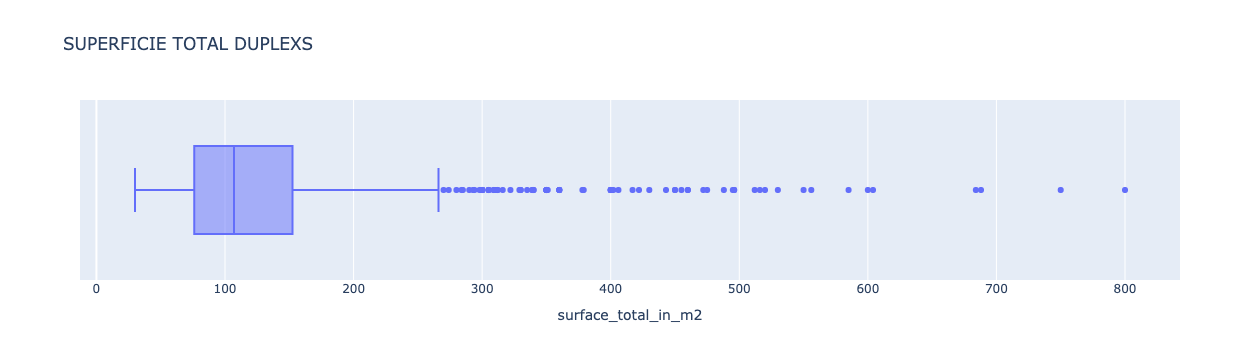

In [845]:
patron_duplex = re.compile(r'duplex|triplex')

encuentra_duplex = df.title.apply(lambda x: re.search(patron_duplex, str(x)))


encuentra_duplex_mask = encuentra_duplex.notnull()

px.box(df[encuentra_duplex_mask], x='surface_total_in_m2', title= 'SUPERFICIE TOTAL DUPLEXS')

In [846]:
df[encuentra_duplex_mask].shape

(2092, 33)

In [847]:

df.loc[encuentra_duplex_mask,'TIPO DE PROPIEDAD']='duplex/triplex'

### Piso / Penthouses

In [848]:
df_apartamento=df[df.property_type=='apartment']

patron_piso = re.compile(r'piso|semipiso')

depto_sup_mayor_200m2 = df[np.logical_and(np.logical_or(df.surface_total_in_m2>200, df.surface_covered_in_m2>200), df.property_type=='apartment')]

encuentra_piso = depto_sup_mayor_200m2.title.apply(lambda x: re.search(patron_piso, str(x)))


encuentra_piso_mask = encuentra_piso.notnull()

piso=encuentra_piso[encuentra_piso_mask].apply(lambda x: x.group())

patron_penthouse = re.compile(r'penthouse')

encuentra_pent = df[df.property_type=='apartment'].description.apply(lambda x: re.search(patron_penthouse, str(x)))

encuentra_pent_mask = encuentra_pent.notnull()

pent_index = df_apartamento.loc[encuentra_pent_mask].index
piso_index = piso.index

df.loc[pent_index,'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[piso_index,'TIPO DE PROPIEDAD']='piso/penthouse'


In [849]:
df_apartamento=df[df.property_type=='apartment']

patron_piso = re.compile(r'piso|semipiso')

depto_sup_mayor_200m2 = df[np.logical_and(np.logical_or(df.surface_total_in_m2>200, df.surface_covered_in_m2>200), df.property_type=='apartment')]

encuentra_piso = depto_sup_mayor_200m2.description.apply(lambda x: re.search(patron_piso, str(x)))


encuentra_piso_mask = encuentra_piso.notnull()

piso=encuentra_piso[encuentra_piso_mask].apply(lambda x: x.group())

patron_penthouse = re.compile(r'penthouse')

encuentra_pent = df[df.property_type=='apartment'].title.apply(lambda x: re.search(patron_penthouse, str(x)))

encuentra_pent_mask = encuentra_pent.notnull()

pent_index = df_apartamento.loc[encuentra_pent_mask].index
piso_index = piso.index

df.loc[pent_index,'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[piso_index,'TIPO DE PROPIEDAD']='piso/penthouse'

### 7) Analisis EDA

#### Outliers

Vamos a graficar algunas variables numericas a ver como esta distribuida nuestra data

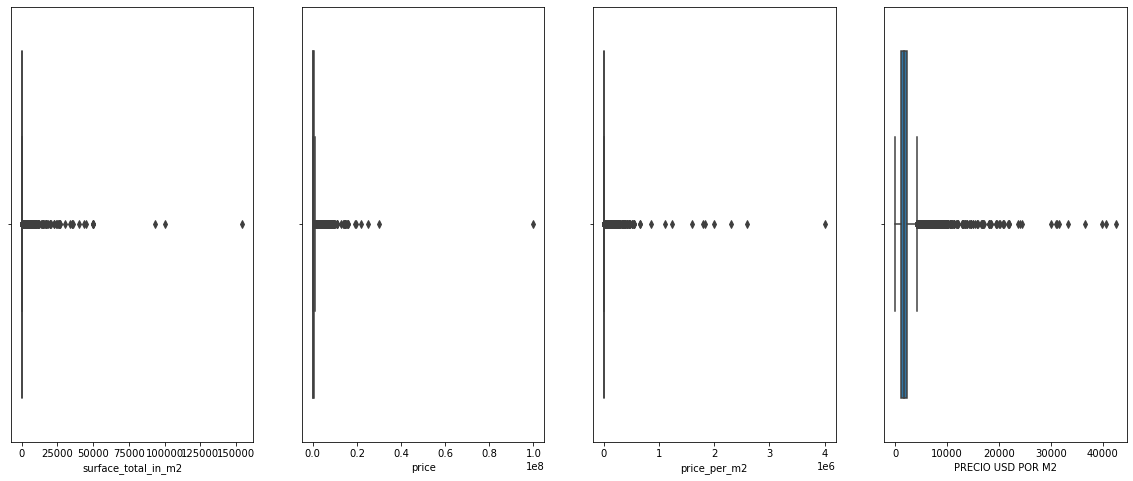

In [850]:
fig,ax = plt.subplots(ncols=4, figsize=(20,8))

sns.boxplot(data=df, x='surface_total_in_m2', ax=ax[0]) 
sns.boxplot(data=df, x='price', ax=ax[1]) 
sns.boxplot(data=df, x='price_per_m2', ax=ax[2]) 
sns.boxplot(data=df, x='PRECIO USD POR M2', ax=ax[3])

plt.show()

Dado que los ultimos 2 graficos son consecuencia de los primeros dos, vamos a trabajar con ellos.

## surface_total_in_m2

## Apartment

Vamos a buscar outliers a partir de place_name en departamentos de capital federal

In [851]:
pd.set_option('display.max_colwidth', None)

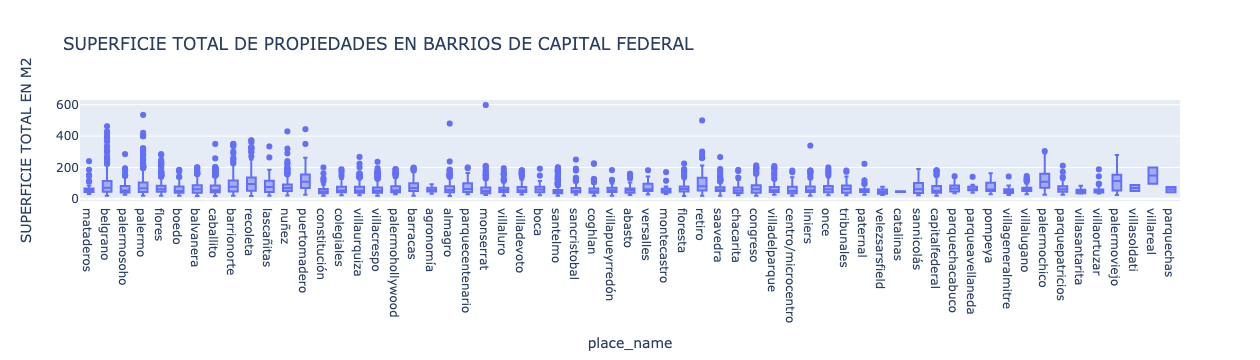

In [852]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')],\
             y = "SUPERFICIE TOTAL EN M2", x='place_name', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL')
fig.show()


### mataderos - Apartment

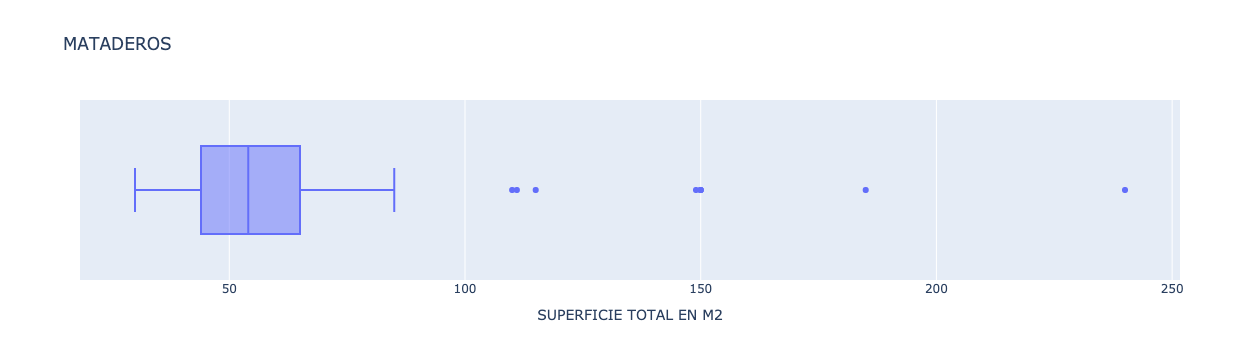

In [853]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='mataderos',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='MATADEROS')
fig.show()

In [854]:
df_apartamentos = df[df['TIPO DE PROPIEDAD']=='apartment']


mataderos_index=df_apartamentos[df_apartamentos['PLACE NAME']=='mataderos'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:7].index
df_apartamentos[df_apartamentos['PLACE NAME']=='mataderos'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:7]


SUPERFICIE TOTAL EN M2  \
19270                 240.000   
57144                 185.000   
43714                 150.000   
39700                 150.000   
74517                 150.000   
60066                 149.000   
73455                 115.000   

                                                                title  \
19270                                                   avevapern5800   
57144                                              departamentotipoph   
43714              3ambconterraza,parrillaysotano(estado100impecable)   
39700                                        casa4ambientes-mataderos   
74517                                          departamento-mataderos   
60066  departamento4ambientescondep2balcones,todoalexterior-mataderos   
73455                                          departamento-mataderos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  
19270                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                publicadoporcirculoinmobiliariasuratravesinmomap  
57144                                                                                                                                                                                                                                                                      departamentotipoph,estáenlaplantaalta1erpiso,estádesocupadoyenbuenestadosinexpensas,muycómodo,conbalcóncorridoentodoeldepartamentolivingcomedoralfrentecongranventanabalcón,1dormalfrenteyotroalcontrafrente,conbañolacocinacomedortienesalidaabalcónterrazaconlavaderoel2dopisoseconformaconundormitorioconbaño,unamplioplayroomconplacard,quepuedetransformarceenotrodormitorioparrillainternaconbarraysalidaabalcónamplioconhornodebarrobuenmantenimientogeneralcercanoaplaza,barriotranquilodecasas,próximoaavescalada  
43714                                                                                                                                                                                                                                              codigo:114-577ubicadoen:araujo-publicadopor:ingeavillamilpropiedadeselprecioesdeusd180000nullunmerecido3ambtipocasaconterraza,parrillaysotanoelinmueblecuentaconlasiguientedistribucionenplantabaja:livingcomedorcocinaamplio,cocinacomedorseparadaconartefactodecocinaconhorno,alacenaybajomesada,toilleteysotanoenpriimerpisopiso2dormitorios(unode4x4maproxyotrode5x4maproxambosconplacardconinterior),bañocompleto,terrazaconlavaderoyparrillalasfotoslodicentodo,pocaantiguedad,bienmantenido,buenpreciovengayvealopublicadoatravésdemapaprop  
39700                                                

In [855]:
df.loc[mataderos_index[3],'TIPO DE PROPIEDAD']='house'

In [856]:
df.loc[mataderos_index[1],'TIPO DE PROPIEDAD']='ph'

In [857]:
df.loc[mataderos_index[6],'TIPO DE PROPIEDAD']='ph'

### belgrano - Apartment

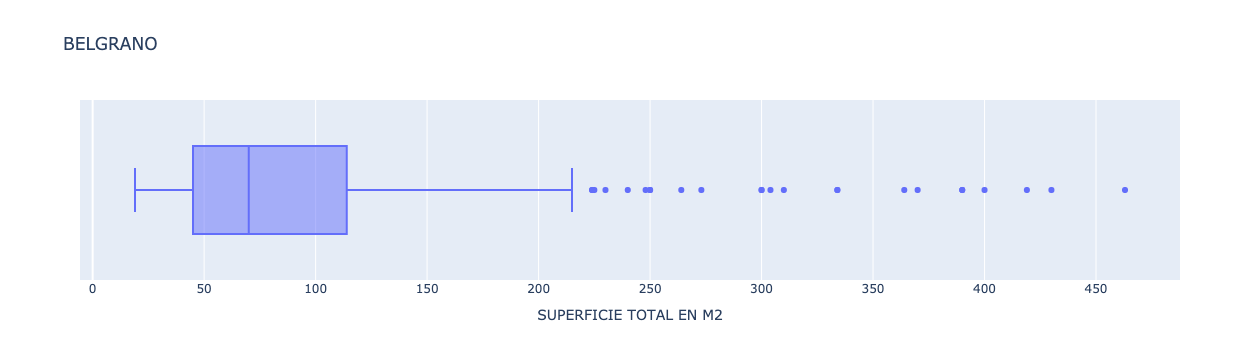

In [858]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='belgrano',df['TIPO DE PROPIEDAD']=='apartment')], x = "SUPERFICIE TOTAL EN M2", title='BELGRANO')
fig.show()

In [859]:
belgrano_index = df_apartamentos[df_apartamentos['PLACE NAME']=='belgrano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title']][:18].index

df_apartamentos[df_apartamentos['PLACE NAME']=='belgrano'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:18]


SUPERFICIE TOTAL EN M2  \
615                   463.000   
41645                 430.000   
36023                 419.000   
24670                 400.000   
69783                 390.000   
69566                 390.000   
69646                 370.000   
85094                 364.000   
37251                 334.000   
38159                 334.000   
49848                 310.000   
27932                 304.000   
69491                 300.000   
48357                 300.000   
36907                 273.000   
79714                 264.000   
59948                 250.000   
60502                 250.000   

                                                                                                       title  \
615                                                                                      departamentoenventa   
41645                                                                                    departamentoenventa   
36023                                                              belgrano/laimprenta7ambaptoprofdepcochera   
24670                                                       belgranoexcelentedepartamentoenventade8ambientes   
69783                                                   4suitesescritorioyplayroombalconterrazaypiletapropia   
69566                                                                                 departamentoenbelgrano   
69646                                                   3defebreroyzabala-torredemaximacategoriaconamenities   
85094                                                                                 departamento-belgranoc   
37251                                                                                      departamentoventa   
38159                                              muylindodepartamentocon200mts²dejardínson334m2206dejardín   
49848                                                                            oportunidad!!3defebrero2169   
27932                                                              excelentedepartamentoconterrazay2jardines   
69491                                                                       arribeñosesqzabala3cocherasfijas   
48357                                                                                         ohiggins22002º   
36907                                                                                    departamentoenventa   
79714                                                                                    departamentoenventa   
59948  departamentoenbelgranoforumalcorta!!!espectacular3dormensuitecondepamenitiesdesuperlujoyvistaalrio!!!   
60502                                   forumalcorta!amenitiesdemaximonivelvistaalrio!253m2delujo3dormcondep   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
615                                                                                    

In [860]:
df.loc[belgrano_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'

### palermo soho - Apartment

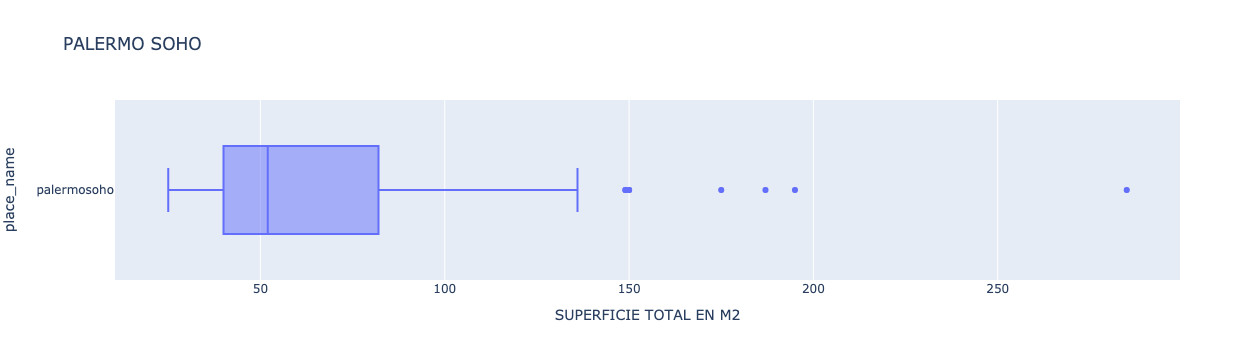

In [861]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='palermosoho',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", y='place_name', title='PALERMO SOHO')
fig.show()

In [862]:
palermosoho_index = df_apartamentos[df_apartamentos['PLACE NAME']=='palermosoho'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title']][:6].index

df_apartamentos[df_apartamentos['PLACE NAME']=='palermosoho'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6]


SUPERFICIE TOTAL EN M2  \
77332                 285.000   
76002                 195.000   
7338                  187.000   
40999                 175.000   
62695                 150.000   
10225                 150.000   

                                                                                 title  \
77332                                                                departamentoventa   
76002                                  departamentoenventaenpalermosoho,capitalfederal   
7338   semipisoenjuncalentreugartecheyrepublicaarabesiriaopcioncocheraybaulerau$s30000   
40999          excelentedeptoentorreconterrazasparrillavista360unico!2cocherasybaulera   
62695                                                                     paraguay4700   
10225                                    departamentoenpalermosohocongranbalcónterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
77332                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       hermosadptodedosambientesmuyeconómico  
76002                                                                                                                                                                                                                                               codigo:1237-76ubicadoen:paraguay4700-publicadopor:desdemonajudithmorettielprecioesdeusd927000nullexcelente5/c/dependenciaambientesenedificiotorre,superluminoso,excelentesterminacionescategoríapremuinbaulerasoptativascocherasoptativaslasmedidasconsignadasnosonexáctas,tienenunfinmeramenteinformativo,novinculareslasmedidasysuperficiesrealessurgendeltítulodepropiedadelmontorealdeexpensassurgedeldetalledeladministradorlasimágenessonorientativasnosonexactasalapropiedadpublicadoatravésdemapaprop  
7338                                                                                                                                                                                                                                                                                                                                                                                                                excelentesemipisoalfrenteconluzdemañanaenmuyestadodeconservacion(deepocacocinaybaños)-conseguridadlas24hs3dormitorios+escritorioconbiblioteca(principalensuite,yunbañocompletoparalosotros2dormitorios)-cocinaconcomedordiariolavaderoindependiente,dependenciadeservicio-calefaccionyaguacalientecentral(servicioscentrales)-ablanual$18944-  
40999                     excelentepisoentorrefullamenitiesvista360gradosexcelenteestadomastersuiteconvestidorybañopartimentadoducha,hidromasajescuartodebañoybachadobletodalasuitedaaun

In [863]:
df.loc[palermosoho_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

## Palermo - Apartment

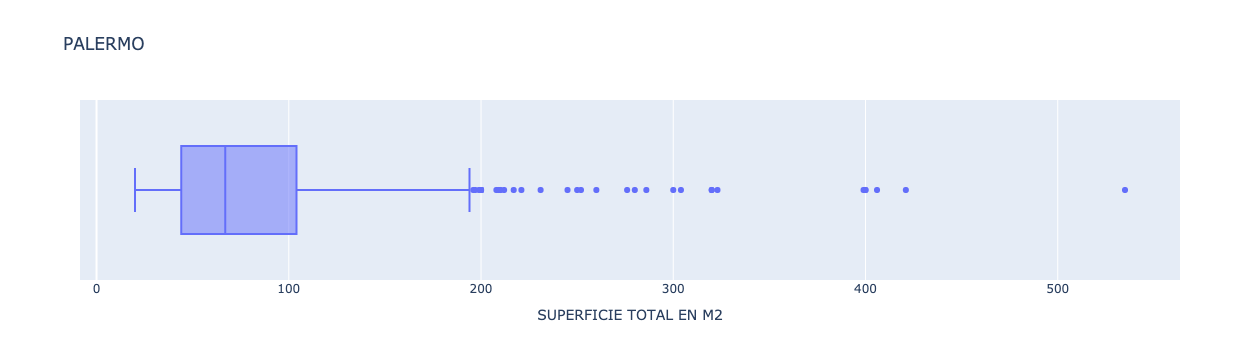

In [864]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='palermo',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='PALERMO')
fig.show()

In [865]:
palermo_index = df_apartamentos[df_apartamentos['PLACE NAME']=='palermo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:25].index

df_apartamentos[df_apartamentos['PLACE NAME']=='palermo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:25]


SUPERFICIE TOTAL EN M2  \
54502                 535.000   
60306                 421.000   
82584                 406.000   
69801                 400.000   
32996                 400.000   
43029                 399.000   
60167                 323.000   
54467                 320.000   
23443                 320.000   
32957                 304.000   
34542                 300.000   
35570                 286.000   
52716                 280.000   
60227                 276.000   
34646                 260.000   
36172                 252.000   
78261                 250.000   
69736                 245.000   
36819                 231.000   
76008                 221.000   
69290                 217.000   
76009                 212.000   
5162                  210.000   
17093                 210.000   
57519                 209.000   

                                                                                                                                                                                    title  \
54502                                                                                                             ventadepartamentode5ambientescondependencias,2cocherasybauleraenpalermo   
60306                                                                                                                                                        latorremaslujosadepalermo!!!   
82584                                                                                                                                                                        ventapalermo   
69801                                                                                                                                  torredecategoria-frentealrosedal-espectacularvista   
32996                                                                                                                                                                        ventapalermo   
43029                                                                                                                                                                   dellibertador1700   
60167                                                                                                                                                               departamentoenpalermo   
54467                                                                                                                                                                     venta5ambientes   
23443                                                                                                                                                                avlibertadorykennedy   
32957                                                                                                                                                                        ventapalermo   
34542                                                                                                                                          departamentoexclusivoenventa,muybuenavista   
35570  departamentolivingcomedor4dormitorio(s)1ensuite3baño(s)1toilette(s)habitacióndeservicio2cochera(s)entremedianerasalfrenterecicladoimpecableluminosoorientaciónesteantigüedad50años   
52716                                                                                                           departamento4ambientes,enplantabaja,congranpatioalaventa,torredecategoría   
60227                                                                                                                                                               departamentoenpalermo   
34646                                                                                                                               departamento260m²,capitalfederal,palermo,poru$s350000   
36172                                                                                                                       

In [866]:
df.loc[palermo_index[7],'TIPO DE PROPIEDAD']='duplex/triplex'

In [867]:
df.loc[palermo_index[-5],'TIPO DE PROPIEDAD']='duplex/triplex'

In [868]:
df.loc[palermo_index[-3],'TIPO DE PROPIEDAD']='duplex/triplex'

In [869]:
df.loc[palermo_index[-2],'TIPO DE PROPIEDAD']='duplex/triplex'

## Barrio Norte - Apartment

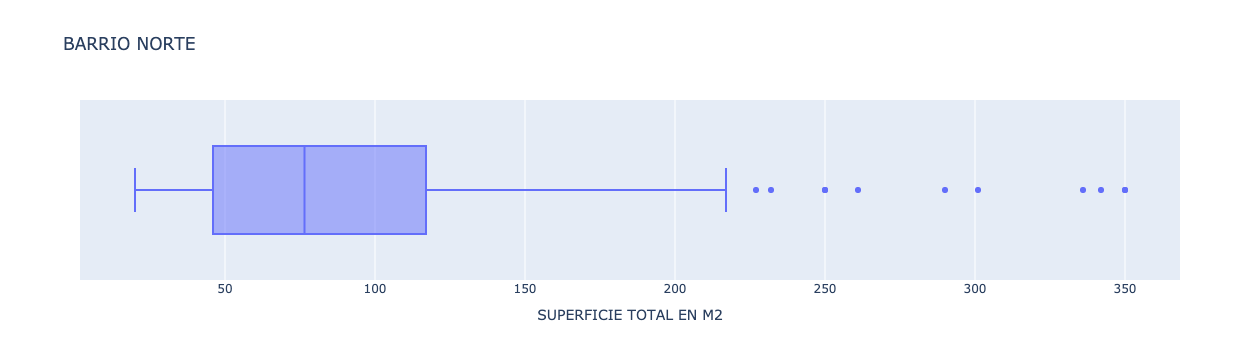

In [870]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='barrionorte',df['TIPO DE PROPIEDAD']=='apartment')],\
             x = "SUPERFICIE TOTAL EN M2", title='BARRIO NORTE')
fig.show()

In [871]:
barrionorte_index=df_apartamentos[df_apartamentos['PLACE NAME']=='barrionorte'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9].index

df_apartamentos[df_apartamentos['PLACE NAME']=='barrionorte'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9]


SUPERFICIE TOTAL EN M2  \
12661                 350.000   
18851                 350.000   
28333                 342.000   
44171                 336.000   
9501                  301.000   
65650                 290.000   
30899                 261.000   
53326                 250.000   
79965                 250.000   

                                                                       title  \
12661              departamentoenventaubicadoenbarrionorte(iur0369_lp118265)   
18851                                               excelentedeptoenrecoleta   
28333      torrelibedinsky-barrionorte-grandbourg-5ambc/dependenciasycochera   
44171                              edificiofariña,3suites2dep,3cocherasfijas   
9501                                                   suipachaesquinajuncal   
65650                                              departamento-palermochico   
30899                                                       ventabarrionorte   
53326                    departamentoenventa3dormitoriosconpatio-barrionorte   
79965  departamentode4dormitoriosdegrancategoriamuyluminosoenexcelenteestado   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
12661  edificioconstruidodegrancategoría,ubicadofrenteaplazalibertadenlamismacuadradelteatrocoliseodepartamentode350mts,conunagranplantafuncionalymuybuenacirculacióningresoporpalierprivadoyaccesodeserviciocuentacon5ampliosdormitoriostodosconampliosplacares,tresdeellosensuiteydoscompartenampliobañohaciaelfrentetenemoselcomedor,living,estaryescritorio,todosellosconlaposibilidaddeintegrarlososepararlosporpuertascorredizasampliacocinaconuncomedordiariointegradodemuybuendiseñoeimpecableestadoeláreadeserviciocuentaconundormitoriocompletoyunlavaderoindependientehoyeneledificioseestánhaciendotareasdereacondicionamientoycambiodecañeríasdegas,eldepartamentofueunodelosmenosafectadosconlasperdidasyalabrevedadestarárestablecidoelserviciodegasnormalmenteexpensas$18000+aysaabl$3380  
18851                                                                                                                                                                                                                                                                          ampliolivingycomedorendesnivelalfrenteconbalcn,saladeestar,toilettederecepcin,mastersuiteconjacuzziyvestidor,otros3dormitoriosensuitey1livingintimo,ampliacocinaconmesadedesayuno,cuartodelavado,lavadero,dependenciasdeservicioconbaocalefaccin,aireacondicionadoseguridad24hsporcircuitodeseguridadbalcon-comedor-baulera-cocina-comedordediario-dependenciadeservicio-dormitorioensuite-escritorio-hall-jardin-lavadero-living-livingcomedor-patio-terraza-toilette-vestidorpublicadopormaxplensoajepintoatravesinmomap  
28333                                                                                                                                                                                                                                                                                     excelentedepartamento,ubicadoenlazonamaselegantedelaciudaddebuenosaires,enelemblematicoedificiolibedinskyeldepartamentoconstadeliving-comedorapaisadoconvistaalacopadelosarboles,conbalconaterrazadode180grados,megasuiteconvistaajardines,tresdormitorios(un

In [872]:
df.loc[barrionorte_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Villa Crespo - Apartment

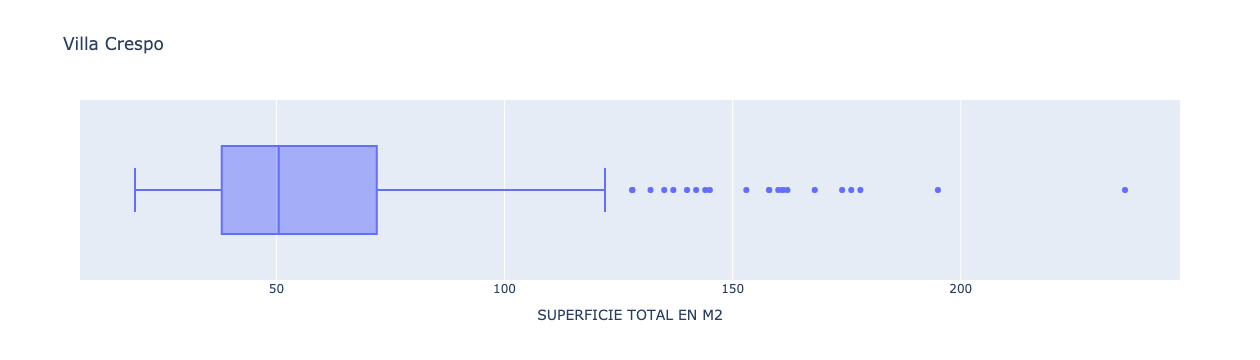

In [873]:
fig = px.box(df[np.logical_and(df['PLACE NAME']=='villacrespo',df['TIPO DE PROPIEDAD']=='apartment')],\
                 x = "SUPERFICIE TOTAL EN M2", title='Villa Crespo')
fig.show()

In [874]:
villacrespo_index=df_apartamentos[df_apartamentos['PLACE NAME']=='villacrespo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:19].index


df_apartamentos[df_apartamentos['PLACE NAME']=='villacrespo'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:19]


SUPERFICIE TOTAL EN M2  \
79388                 236.000   
32961                 195.000   
62536                 178.000   
22707                 176.000   
42040                 174.000   
22873                 168.000   
83256                 162.000   
20606                 161.000   
79638                 161.000   
52639                 160.000   
83268                 158.000   
82961                 158.000   
9507                  153.000   
78503                 145.000   
28500                 144.000   
29087                 142.000   
40885                 140.000   
83305                 137.000   
13636                 135.000   

                                                      title  \
79388  departamentodecategoría,alfrenteconbalcónsinexpensas   
32961          departamentode4ambientesenventaenvillacrespo   
62536                              departamento-villacrespo   
22707                                   departamentoenventa   
42040                                   departamentoenventa   
22873                                   departamentoenventa   
83256                              departamento-villacrespo   
20606          departamentode3ambientesenventaenvillacrespo   
79638                                   departamentoenventa   
52639                              departamento-villacrespo   
83268                              departamento-villacrespo   
82961                              departamento-villacrespo   
9507                                         juanbjusto2700   
78503            venta4ambientescondependenciaenvillacrespo   
28500                                   departamentoenventa   
29087                                   departamentoenventa   
40885       ventasemipisode4ambcondependenciasenvillacrespo   
83305                              departamento-villacrespo   
13636                                   departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
79388                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        características:departamentodecategoría,4dormitorios,granlivingycomedorindependienteescritorio,cocinaconcomedordiariosdependenciadeservicioconbañopatiocubiertoconparrillalavaderobalcóncorridoalfrenteeledificiocuentaconascensorsinexpensasubicación:ubicadoenelbarriodevillacrespo,sobreavjuanbjusto,ametrosdelaestacióndelmetrobus"honoriopueyrredon"próximoa:-avcorrientes-subtelinea"b"-avsanmartinobservaciones:departamentoúnicoenlazonaaptoprofesional  
32961                                                                                                                                                                                                  

In [875]:
df.loc[villacrespo_index[8],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-7],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-8],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villacrespo_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[villacrespo_index[-5],'TIPO DE PROPIEDAD']='duplex/triplex'

### Puerto Madero - Apartment

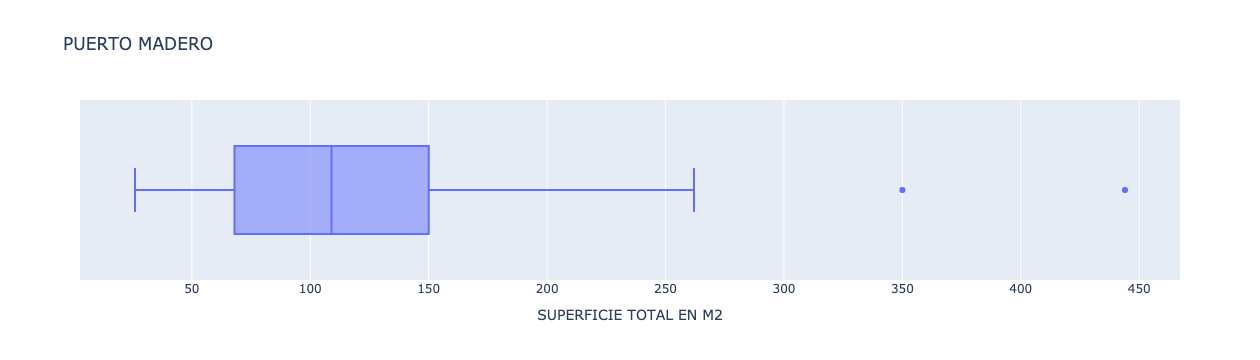

In [876]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'],\
                x = "SUPERFICIE TOTAL EN M2", title='PUERTO MADERO')
fig.show()

In [877]:
index_puertomadero=df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index


df_apartamentos[df_apartamentos['PLACE NAME']=='puertomadero'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


SUPERFICIE TOTAL EN M2  \
67515                 444.000   
4172                  350.000   

                                                      title  \
67515                                          puertomadero   
4172   torreelfaro-impresionantevistaalrío,tigreypuerto!!!-   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
67515  -increíbledepartamentoendúplexen2plantasconterrazapropiayparrillapb:palierprivado,toilette,granlivingcomedorconvistaatodaslasdireccionesybalcóncocinacomedorydependenciadeservicioposibilidaddehabitaciónensuite(4todormitorio)enpa:3habitacionesensuite,principalconbalcón,vistaalríoydoblebañoconhidromasajesimpactanteterrazacondeckbañoyparrilladoblecirculaciónabl13000nota:lainformaciongraficayescritacontenidaenelpresenteavisoesmeramenteatituloestimativoynoformapartedeningúntipodedocumentacióncontractuallasmedidasysuperficiesdefinitivassurgirándeltitulodepropiedaddelinmueblereferidoasimismolosimportesdetasas,serviciosyexpensasindicadosestánsujetosaverificaciónelvalordelinmuebleindicadoenelpresentepuedesermodificadosinprevioaviso  
4172                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     superluminosoysoleado-grancategoría-living/comedor,toilette,balcónincorporadoconcerramiento,3suites,granbalcónenmastersuite,estar,dependencia,4cocherasfijas,seg24hs,amenitiesalarmadelaplantacerramientosdevidriosdobles

In [878]:
df.loc[index_puertomadero[0],'TIPO DE PROPIEDAD']='duplex/triplex'

In [879]:
df.loc[index_puertomadero[1],'TIPO DE PROPIEDAD']='piso/penthouse'

### Nuñez - Apartment

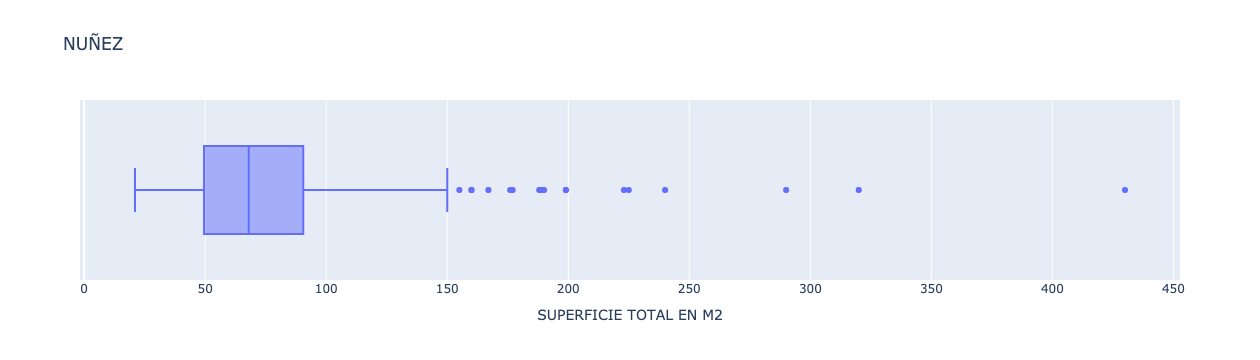

In [880]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'],\
             x = "SUPERFICIE TOTAL EN M2", title='NUÑEZ')
fig.show()

In [881]:
nunez_index=df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'].\
                    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:14].index

df_apartamentos[df_apartamentos['PLACE NAME']=='nuñez'].\
                    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description','PRECIO USD']][:14]


SUPERFICIE TOTAL EN M2  \
41644                 430.000   
44509                 320.000   
51918                 290.000   
34337                 240.000   
41022                 225.000   
31266                 223.000   
5782                  199.000   
3858                  199.000   
83021                 190.000   
82483                 189.000   
2956                  188.000   
36455                 177.000   
67788                 176.000   
54681                 167.000   

                                                             title  \
41644                                          departamentoenventa   
44509                                                 forumalcorta   
51918  ventatorrechateauexcelenteesquineroconlamejorvistadelatorre   
34337                                          casaenventa-caseros   
41022                           quantumbelliniesquinero3dormcondep   
31266                     avdellibertador7000-nuñez-capitalfederal   
5782     avdellibertador7000,departamentoenventa,4dormitorios,caba   
3858       avdellibertador7000,departamentoenventa,5ambientes,caba   
83021                                           departamento-nuñez   
82483                 magnificodepartamentode4ambenavlibertador!!!   
2956                        departamentode4ambientesenventaennuñez   
36455                                espectacularpisoconvistaalrío   
67788                                           departamento-nuñez   
54681                                      treplexconterrazapropia   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  \
41644                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             excelentedepartamentoenventa/forumalcorta,catañedayjuramento/belgranocuentacon4dormitoriosensuitec/vestidor+dependenciadeservicio,toiletteampliolivingcomedor,cómodofamilyroomy2balconesaterrazadossuperficiecubierta:330m2+balconaterrazado100m2superficietotal430m2incluye2cocherasy1baulera/lozaradianteycalefaccióncentralamenities:piletacubierta,piletadescubiertac/zonasdeniños,canchadeteniscubiertaycanchadetenisdescubierta,sum,sectordeparrillas,áreadejuegosinfantiles,fitnesscenterc/vestuariosysaunas,laundry,bauleras,grupoelectrógenosectorizado,internetinalambricoenáreascomunes,bicicleteros,vigilancia24hs--conectarpropiedades   
44509                                                                                                                                                                     

In [882]:
df.loc[nunez_index[3],'TIPO DE PROPIEDAD']='house'
df=df.drop(nunez_index[6])
df.loc[nunez_index[8],'TIPO DE PROPIEDAD']='house'
df.loc[nunez_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[nunez_index[-2],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[nunez_index[-1],'TIPO DE PROPIEDAD']='duplex/triplex'

### Constitucion - Apartment

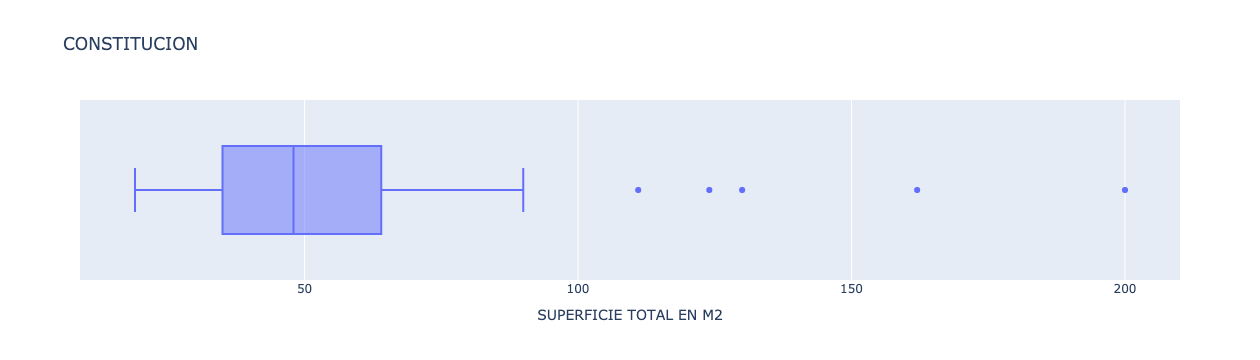

In [883]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'], x = "SUPERFICIE TOTAL EN M2", title='CONSTITUCION')
fig.show()

In [884]:
constitucion_index = df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:5].index
df_apartamentos[df_apartamentos['PLACE NAME']=='constitución'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:5]


SUPERFICIE TOTAL EN M2  \
8691                  200.000   
65007                 162.000   
77920                 130.000   
8711                  124.000   
13072                 111.000   

                                                                                                                                                            title  \
8691                                                                                                                        ventapisotipoph-de200m2-balcónalfrte-   
65007                                                                                                                     departamento/ph-4ambientes-constitución   
77920                                                                         departamento130m²5ambientesconwashing-room,capitalfederal,constitución,poru$s269000   
8711                                                                                    piso4ambientesenventasantiagodelestero1300escomovivirenunacasaenaltura!!!   
13072  departamentoliving/comedor3dormitorio(s)1toilette(s)habitacióndeservicioalfrenteenesquinaantiguoluminosoenmuybuenestadoorientaciónnoroesteantigüedad56años   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
8691                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            ventadepisotipoph(1ºpiso)u$s249000“conexcelenterenta”opcióndeventadel2ºy3ºpisototalmenterecicladospisosenphde200m2aprox2hallsderecepción10habitaciones-3bañoscompletos-1cocina-techosdedoblealturaconentrepisosyventilacionindependientepatio-balcóncorridoalacallesuperluminososestadodeledificio:muybuenoedificiode3pisosconentradaindependienteexcelentezonaturísticaydecrecimientoa1cuadraymediadeav9dejulio,cercaniauniversidad,4cuadrasdeplazasantelmo-8cuadrasdepuertomadero-porestayotraspropiedades:tambiéndeotrasexcelentespropiedadesconosinrentaenlasmejoreszonasdebsasllamardedomingoaviernesde10a21hs-srsaúl-tel11ycel/wsp1115mail:(ventacondicionadaalasolicituddelcotiacargodelpropietario)resgral2371-afipteléfonodelinea  
65007                                                                                                                                  

In [885]:
df.loc[constitucion_index[0],'TIPO DE PROPIEDAD']='ph'
df.loc[constitucion_index[1],'TIPO DE PROPIEDAD']='ph'
df.loc[constitucion_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'


### Colegiales - Apartment

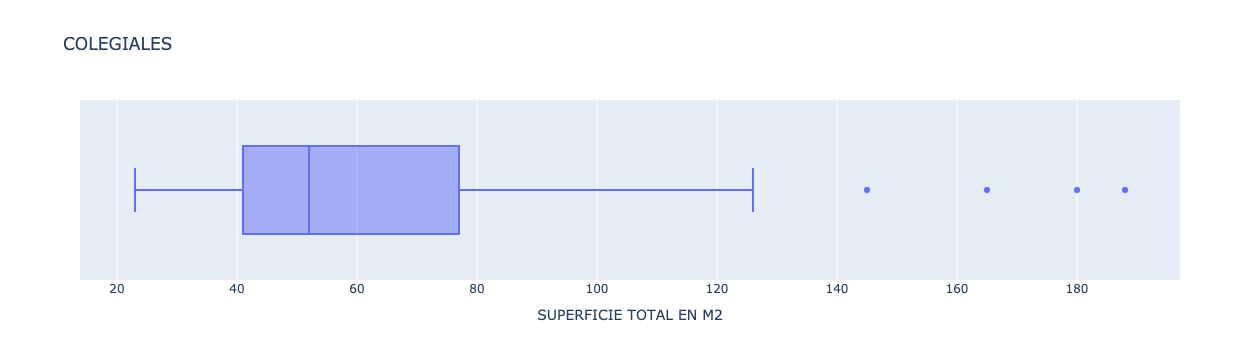

In [886]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'],\
             x = "SUPERFICIE TOTAL EN M2", title='COLEGIALES')
fig.show()

In [887]:
colegiales_index =df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4].index
df_apartamentos[df_apartamentos['PLACE NAME']=='colegiales'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4]


SUPERFICIE TOTAL EN M2                        title  \
3373                  188.000          departamentoenventa   
47697                 180.000  palpa2855-pbopcionalcochera   
79619                 165.000          departamentoenventa   
45938                 145.000          departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
3373                                                                                                                                                                                                                                                                                                                                                                                                                                               excelenteoportunidaddecompradedepartamentotriplexenplenocorazóndecolegialesventadetriplexenpalermo,-lostrespisosconstituyenunsólodepartamento�a",tienelosaradianteenlostrespisos,calderaindependientededoblecircuitoparalosaradianteyserviciosanitariotienebauleraindividual,enel6topiso-dedicadaaldepartamento,terrazasemicubiertaconparrillaybalcónconparrillatreshabitaciones(habitaciónsuiteconbaño)yunadependenciadeserviciodosbañosyuntoiletteelvalordelaexpensasincluye(aprox9,500ars)baulera,cochera,cableeinternetmuyluminosocómodacocinaagasconhornoedificiode9a10añosconseguridaddecircuitocerradoporcámaraconectadaalserviciodecable--nexopropiedades  
47697  porsubuenayestratégicaubicación,palpa2855cuentaconexcelentescondicionesparaconvertirseenunaprivilegiadacomunidadlas10unidadesfueronespecialmentepensadasporlosarquitectosparaalbergarcómodamenteasusresidentesen4niveles,10semipisostipocasaconampliasterrazasconparrillaenpalpa2855lacomodidadeslomásimportante;elcomplejocuentaconcocherasfjasoptativasconportónautomatizadoparaquelospropietariosyresidentestenganlatranquilidaddetenersuvehículoseguronadaenpalpa2855fuelibradoalazartieneundiseñoarquitectónicoconcuidadacalidadenlosdetallesdiseñomodernoydescontracturado,yelesmeroenlaeleccióndelosmaterialesmásnoblesparasuconstruccióndancomoresultadounapropuestaresidencialinmejorableposeeascensorconpuertasautomáticasaccesoalasviviendasporpatioprivadotodaslasunidadessecaracterizanporsusampliosventanales,luminosidadyventilacióncruzadaqueinvitanaunamejorcalidaddevidatotalmenteintegradasaunasuperfcieediliciadehermosaslíneas,todaslasresidenciasfuerondiseñadasparabrindarelmáximoconfort,creandoespaciosqueaprovechanlaluznaturalypermitendisfrutarunestilodevidaqueatesorarássiempre  
79619                                                                                                                                                                    pisotipocasa4ambientesfrenteycontrafrente165m2impecabletodosoldobleentradadoblecirculacionespectacularlivingen"l"bañocompleto+toilettegrancocinacomedor5placardsserviciosindividualesterrazaalfrenteconrejapatiocontoldodealuminiolavaderoindependientepisosdeparquet3unidadesentotal,xescaleraexp

In [888]:
df.loc[colegiales_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[colegiales_index[1],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[colegiales_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Almagro - Apartment

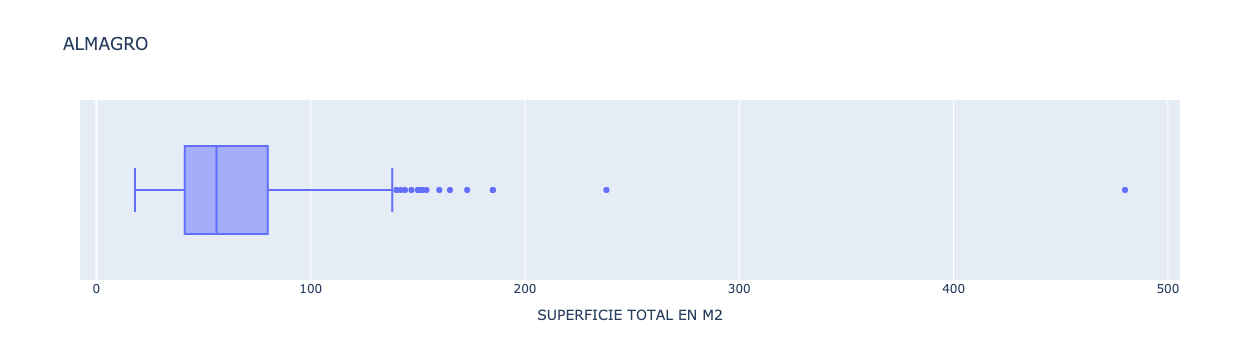

In [889]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'], x = "SUPERFICIE TOTAL EN M2", title='ALMAGRO')
fig.show()

In [890]:
almagro_index =df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13].index
df_apartamentos[df_apartamentos['PLACE NAME']=='almagro'].\
    sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13]


SUPERFICIE TOTAL EN M2  \
77970                 480.000   
27803                 238.000   
20310                 185.000   
18546                 185.000   
62795                 173.000   
15596                 165.000   
3776                  160.000   
5583                  154.000   
8896                  152.000   
14000                 152.000   
17318                 151.000   
78982                 150.000   
43521                 147.000   

                                                                                                                                                                                           title  \
77970                                                                                                                                                                  aranguren100//muyluminoso   
27803  departamentoliving/comedor3dormitorio(s)1suiteconvest,2ensuite5baño(s)1toilette(s)habitacióndeservicio4cochera(s)alfrenteenesquinaexcelenteterrazaluminosoorientaciónnorteantigüedad6años   
20310                                                                                                                                                         ventadepartamento4ambientesalmagro   
18546                                                                                           *nuevoprecio*departamentoenventaenalmagro3ambientes2baños105m2+patioc/parrilla80m2–rivadavia3500   
62795                                                                                                                                                   inmejorabledepto5ambc/depcocheraybaulera   
15596                                                                                                                                                                        departamentoenventa   
3776                                                                                                                                                                         departamentoenventa   
5583                                                                                                                                                     granpiso5ambc/dependencia7ºpisoalfrente   
8896                                                                                                                                                                         departamentoenventa   
14000                                                                                                                                                   departamentode5ambientesenventaenalmagro   
17318                                                                                                                                                           3ambientes2porescaleraconterraza   
78982                                                                                                                                            impecablepisode150m2conbajasexpensasaptocrédito   
43521                                                                                                                                                                        departamentoenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

In [891]:
df.loc[almagro_index[0],'TIPO DE PROPIEDAD']='house'
df.loc[almagro_index[4],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[almagro_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-6],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[almagro_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[almagro_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Monserrat - Apartment

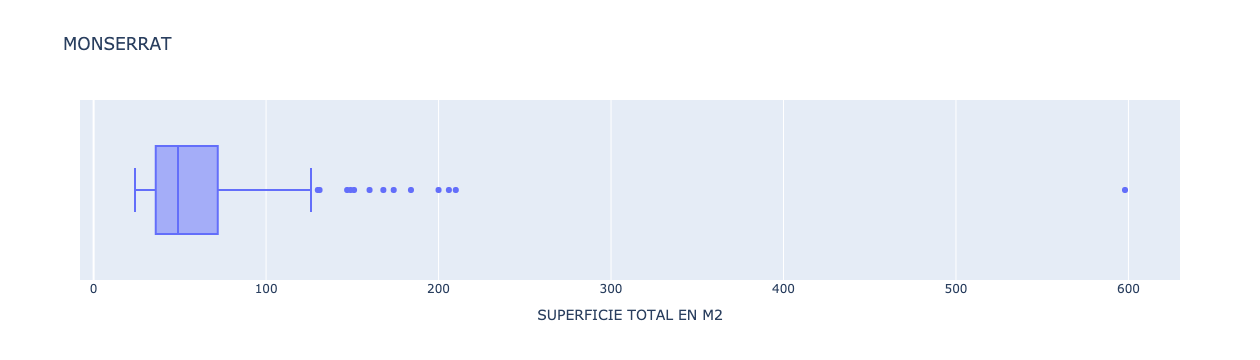

In [892]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'], x = "SUPERFICIE TOTAL EN M2", title='MONSERRAT')
fig.show()

In [893]:
monserrat_index=df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13].index

df_apartamentos[df_apartamentos['PLACE NAME']=='monserrat'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:13]

SUPERFICIE TOTAL EN M2  \
34461                 598.000   
77976                 210.000   
29127                 206.000   
33410                 200.000   
37882                 184.000   
61040                 174.000   
24424                 168.000   
32634                 160.000   
58424                 151.000   
62470                 149.000   
5242                  147.000   
29995                 131.000   
36115                 130.000   

                                                                        title  \
34461                                                           barrioprivado   
77976                                                 muyluminoso//sanjose400   
29127                                                     departamentoenventa   
33410                                 espectacularpisode5ambientesenmonserrat   
37882                                           departamentoantiguoconcochera   
61040                                                  departamento-monserrat   
24424                 hermosodepartamentoestiloracionalistaservicioscentrales   
32634                                      excelente5ambenedificioemblemático   
58424                                                  departamento-monserrat   
62470                                              departamento/ph-5ambientes   
5242             hermosodepartamentoantiguoenesquina,luminoso,aptoprofesional   
29995                                                     departamentoenventa   
36115  excelentedepartamentocuatroambientes,alfrente,muyluminosobajasexpensas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            description  
34461                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              ¿querésvivirrodeadodepaz,paisajesnaturalesyelmayorconfot?elprimerbarrioprivadodelaciudaddebalcarce,seencuentraubicadoalpiedelasierralabarrosa,cercanoalautodromojuanmanuelfangio,unodelospuntosmásimpactantesencuantoaloqueofreceelpaisajeserranoypróximoalosdistintoscircuitosdeactividadesculturalesydeportivasdisfrutedetodaslascomodidadesdelclubhouse,conlanaturalezadefondolaseguridadqueofreceunbarrioprivado,yunimportanteentornonatural,hacenquepuedaolvidarsedesuspreocupacionesyrelajarsedeverdadconsulteporlotesdisponibleslotesde598m2a1000m2conlacompradeunlotesebonificalaescriturayademásseobsequiandosbicicletasdemountainbikeconsultas:(04

In [894]:
df.loc[monserrat_index[0]].description

'¿querésvivirrodeadodepaz,paisajesnaturalesyelmayorconfot?elprimerbarrioprivadodelaciudaddebalcarce,seencuentraubicadoalpiedelasierralabarrosa,cercanoalautodromojuanmanuelfangio,unodelospuntosmásimpactantesencuantoaloqueofreceelpaisajeserranoypróximoalosdistintoscircuitosdeactividadesculturalesydeportivasdisfrutedetodaslascomodidadesdelclubhouse,conlanaturalezadefondolaseguridadqueofreceunbarrioprivado,yunimportanteentornonatural,hacenquepuedaolvidarsedesuspreocupacionesyrelajarsedeverdadconsulteporlotesdisponibleslotesde598m2a1000m2conlacompradeunlotesebonificalaescriturayademásseobsequiandosbicicletasdemountainbikeconsultas:(04168rocío'

Se trata de un anuncio que incluye el conjunto de 4 unidades dentro de su precio.

In [895]:
df = df.drop(monserrat_index[0])

In [896]:
df.loc[monserrat_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-4],'TIPO DE PROPIEDAD']='ph'
df.loc[monserrat_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[monserrat_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Villa Luro - Apartment

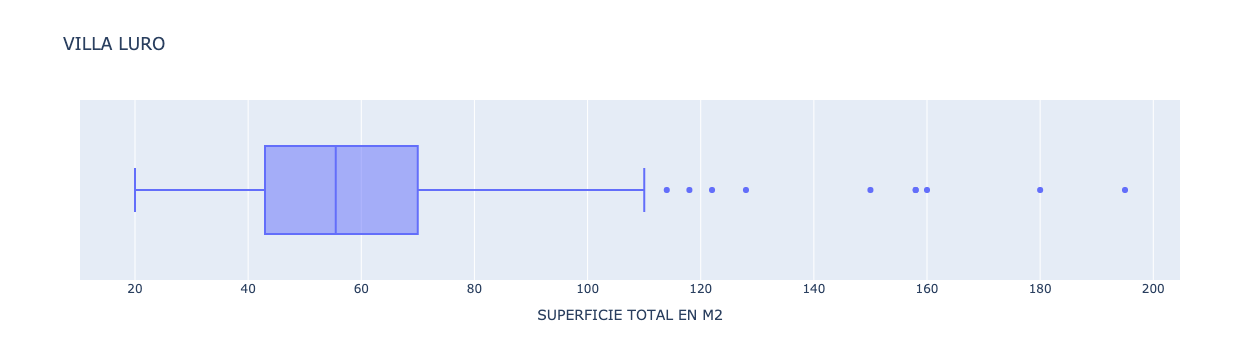

In [897]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'], x = "SUPERFICIE TOTAL EN M2", title='VILLA LURO')
fig.show()

In [898]:
villaluro_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villaluro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:9]


SUPERFICIE TOTAL EN M2  \
71545                 195.000   
71539                 180.000   
71296                 160.000   
55381                 158.000   
55375                 158.000   
9174                  150.000   
60268                 128.000   
60221                 122.000   
82655                 118.000   

                                                                      title  \
71545                                                departamento-villaluro   
71539                                                departamento-villaluro   
71296                                                departamento-villaluro   
55381  4ambientes,2baños,cocinaindependiente,balcónaterrazadoyterrazapropia   
55375                 4ambientes,dosbaños,cocinaindependiente,terrazapropia   
9174                                                    departamentoenventa   
60268                                                departamento-villaluro   
60221                                                departamento-villaluro   
82655                                            casalotepropiode3ambientes   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
71545  ventadedepartamento3ambientesconterrazaubicadoenelbarriodevillaluro,acassuso5570/75,ametrosdelaavrivadaviaydelboulevardramonlfalcon,delaautopista25demayo,delaccesooesteydelaautopistarichiericoncocheraopcionalu$s25000elpisodelhallprincipalserealizaradeporcelanatolosmurosexterioresdeledificioserealizaranenpinturareveardeprimeracalidad,endosotrestonosdiferenciandolasvolumentriasexistenteslostanquesdeaguaseencontraransobrelasalademaquinasyloscisternaenlaplantabajaconestructuradehormigonarmadoymamposteriadeladrillohuecoloscielorrasos,losmurosinterioresdelasmismas,lospalieresyelhalldeentradaserealizarandeyesotradicionalbalconconpasamanosdehierrooacerosegunelcriteriodelaconstructora,dichosbalcontendrapisodeporcelanatococinaconpisodeporcelanato,concocina,mesadasdegranitogrismarauotrasegundecisiondelaempresaconstructora,mueblesdecocinaenmelaminaadesignar,herrajesdeaceroyguardacantosdealuminioelaguacalienteseraprovistaporcalderacentralocalefonesindividualessegunseproyectebanoconpisosceramicosoporcelanatoentonosclarosconbanera,inodoro,bidet,vanitoryygriferiaslasventanasserandealuminiotipomodena2orotonda640,sinpersianaslospisosdelosdepartamentosserandeporcelanatoenelsecordelacocinayelrestodepisoflotantealigualqueeneldormitorioconzocaloscolorblancopintadoslaspuertasdeaccesop

In [899]:
df.loc[villaluro_index[-1],'TIPO DE PROPIEDAD']='house'

### Villa Devoto - Apartment

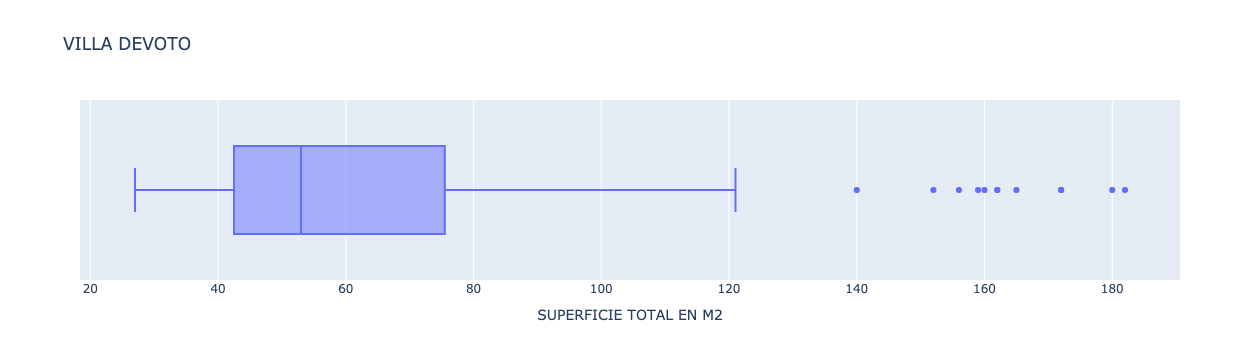

In [900]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'], x = "SUPERFICIE TOTAL EN M2", title='VILLA DEVOTO')
fig.show()

In [901]:
devoto_index =df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:10].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villadevoto'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:10]


SUPERFICIE TOTAL EN M2  \
61074                 182.000   
80849                 180.000   
70675                 172.000   
70286                 172.000   
60397                 165.000   
70236                 162.000   
70655                 162.000   
36846                 160.000   
53022                 159.000   
15334                 156.000   

                                                                                                    title  \
61074                                                                                piso4ambcocheradoble   
80849                                                                     semipiso4ambientes,cochera180m2   
70675                                                                            departamento-villadevoto   
70286                                                                           departamentoenvilladevoto   
60397                                                                                   piso5ambc/depserv   
70236                                                                           departamentoenvilladevoto   
70655                                                                            departamento-villadevoto   
36846                                                                                 departamentoenventa   
53022                                          hermosopiso5ambc/dep,dormsuiteyespguardacoche-159m2totales   
15334  departamento156m²concocheraencarril,salvadormariadelav3500,capitalfederal,villadevoto,poru$s385000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
61074                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [902]:
df.loc[devoto_index[0],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[1],'TIPO DE PROPIEDAD']='piso/penthouse'
df = df.drop(devoto_index[2])
df.loc[devoto_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[5],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-4],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[devoto_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'

### Palermo Chico - Apartment

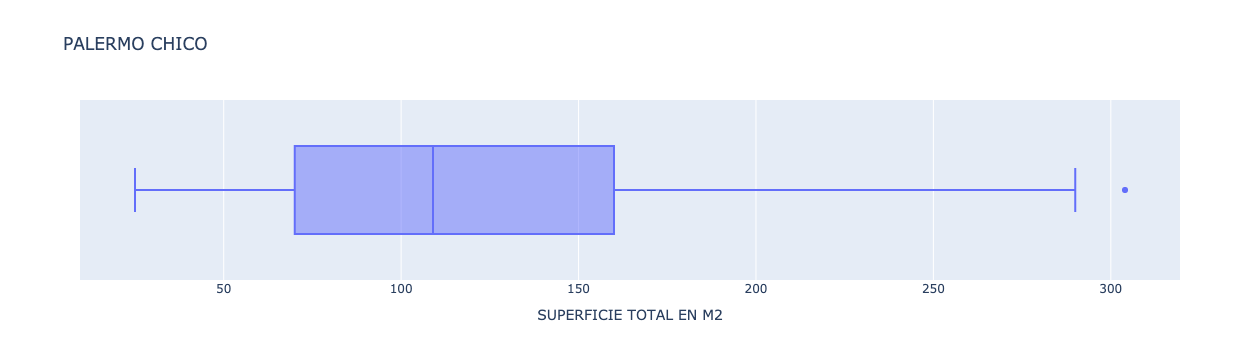

In [903]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='palermochico'], x = "SUPERFICIE TOTAL EN M2", title='PALERMO CHICO')
fig.show()

In [904]:
df_apartamentos[df_apartamentos['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]


SUPERFICIE TOTAL EN M2  \
13993                 304.000   

                                                                                                                                                                                         title  \
13993  departamentoedificioedificiolanusselivingcomedor4dormitorio(s)3suiteconvest3baño(s)habitacióndeservicio2cochera(s)alfrentedegrancategoriaenmuybuenestadoorientaciónesteantigüedad50años   

                                                                                                                                                                                   description  
13993  departamentoedificioedificiolanusselivingcomedor4dormitorio(s)3suiteconvest3baño(s)habitacióndeservicio2cochera(s)alfrentedegrancategoriaenmuybuenestadoorientaciónesteantigüedad50años

### Villa del Parque - Apartment

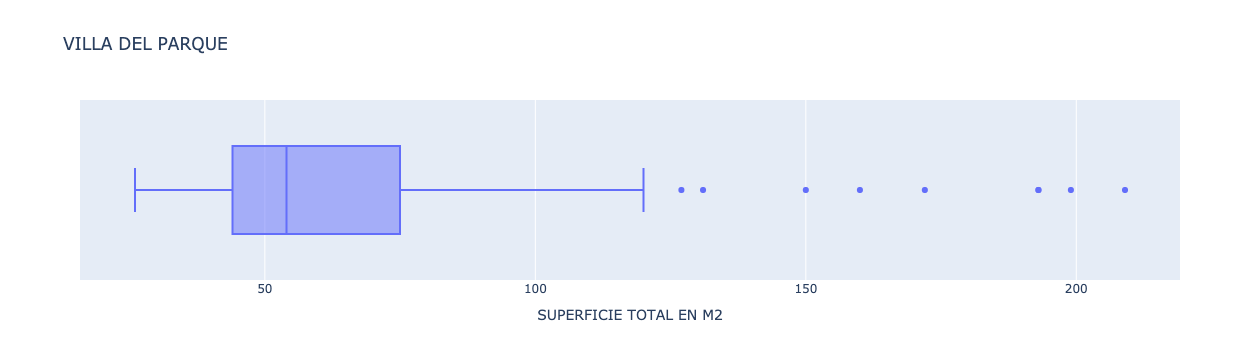

In [905]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque'], x = "SUPERFICIE TOTAL EN M2", title='VILLA DEL PARQUE')
fig.show()

In [906]:
villadelparque_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:8].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villadelparque']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:8]


SUPERFICIE TOTAL EN M2  \
4598                  209.000   
79976                 199.000   
49161                 193.000   
49150                 193.000   
36613                 172.000   
17244                 160.000   
77123                 150.000   
55483                 131.000   

                                                                   title  \
4598                                                 departamentoenventa   
79976                                     departamentos3dormitoriosc/dep   
49161                                         pisode193m2cocheraybaulera   
49150                                    6ambientes193m2/cocheraybaulera   
36613                                                departamentoenventa   
17244                              departamentode4ambientesentresplantas   
77123  departamento-villadelparque,semipiso,4ambientes3balcones2cocheras   
55483                                        departamento-villadelparque   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
4598                                                                                                               ventadetreiplexhermoso,alfrenteconentradaindependiente,entradaparadosautospb:escritorio(conentradaindependiente)living,bañoconducha,comedor,cocinaconbarradesayunadora,mueblesaltosybajos,lavadero,patioconparrillasegundaplanta:4dormitorios,conplacards,dosalfrenteconsalidaabalcon,2bañoscompletostercerlanta:playroomtodoanuevo,unchiche,cañosdegua,gas,electricidad,deprimeracalidadconconfortsinexpensasamplio,funcional,luminoso,muyventilado,superficiecubierta151,78,desucbierta4739,semicubierta484,balcon450,superficietotal208,51sedejaconstanciaquelasmedidas,superficiesym2consignadossonaproximados,sujetosaverificacióny/oajusteelpreciodelinmueblepuedesermodificadosinprevioavisofotosdecarácternocontractuallasunidadespublicadasestansujetasadisponibilidadgoldsteinpropiedadessrlactuasolamenteencarácterdecomercializadoradelosinmueblesofrecidosgoldsteinpropiedadessrlavdacorrientes4666buenosaires,--goldsteinpropiedadessrl  
79976                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 ###edifdoblefrente,seg24hscochimpecable!!!!###granrecepcionde72m2,escritorio,comedorsuiteconvestidor,2dormensemisuiteconjacuzzi,todoslosbañosenmármostravertino,esplendidacocinatodobarujell,anuevo,impecable,doblehorno,comdiario,garnlavadero(exdepend)playroombalcóncorrido(verfotodeledificio),pisosdetarugado,tododeexcelenteca

In [907]:
df.loc[villadelparque_index[0],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[villadelparque_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villadelparque_index[3],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[villadelparque_index[4],'TIPO DE PROPIEDAD']='duplex/triplex'
df.loc[villadelparque_index[-2],'TIPO DE PROPIEDAD']='piso/penthouse'

### Centro/Microcentro - Apartment

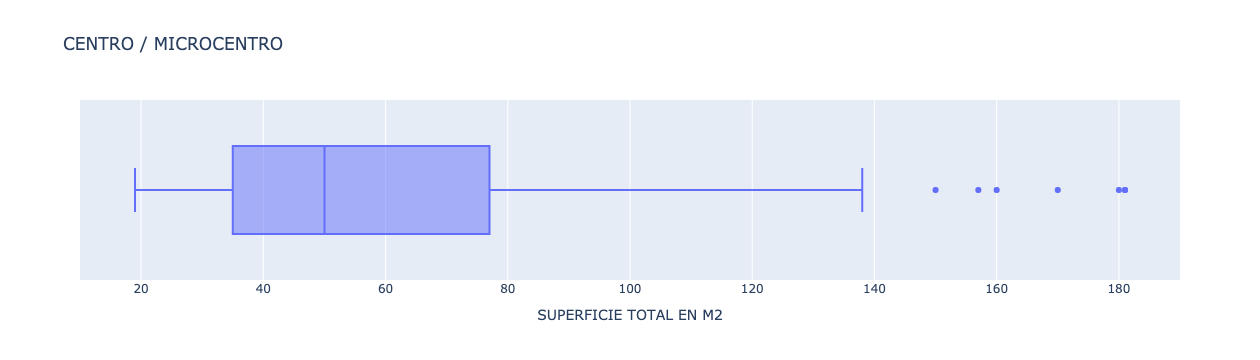

In [908]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='centro/microcentro'], x = "SUPERFICIE TOTAL EN M2", title='CENTRO / MICROCENTRO')
fig.show()

In [909]:
df_apartamentos[df_apartamentos['PLACE NAME']=='centro/microcentro'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


SUPERFICIE TOTAL EN M2                     title  \
77179                 181.000  departamento-microcentro   
49627                 181.000  departamento-microcentro   

                                                                                                                                                                                                                                                                                                              description  
77179  sup7ºa:32,6m2sup7ºb:32,4m2sup7ºc:32,4m2sup7ºd:39m2sup2ºg:45m2suptotal:181,4m2expensas$1500cadadeptoexcelenteoporunidadparainversoresy/oblanqueoenedificio“aestrenar”,unodelos“gremios”vende5unidadesdedeptosaunvalorcosto,…irrepetible!!!noselopierda!!!lossábadossepuedeverentrelas11y18hscontactaral156-445-6020  
49627  sup7ºa:32,6m2sup7ºb:32,4m2sup7ºc:32,4m2sup7ºd:39m2sup2ºg:45m2suptotal:181,4m2expensas$1500cadadeptoexcelenteoporunidadparainversoresy/oblanqueoenedificio“aestrenar”,unodelos“gremios”vende5unidadesdedeptosaunvalorcosto,…irrepetible!!!noselopierda!!!lossábadossepuedeverentrelas11y18hscontactaral156-445-6020

### Villa Lugano - Apartment

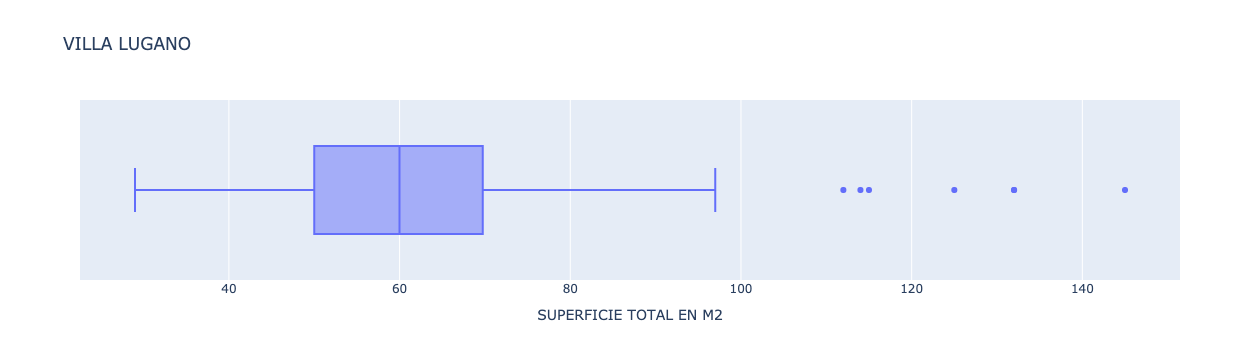

In [910]:
fig = px.box(df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano'], x = "SUPERFICIE TOTAL EN M2", title='VILLA LUGANO')
fig.show()

In [911]:
lugano_index = df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6].index
df_apartamentos[df_apartamentos['PLACE NAME']=='villalugano']\
.sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:6]


SUPERFICIE TOTAL EN M2                                           title  \
45273                 145.000                          excelentepsosavriestra   
55814                 132.000                        semipisoespectacular3amb   
56427                 132.000                        departamento-villalugano   
78923                 125.000                        departamento-villalugano   
19432                 115.000  dpto4ambsinexpensasvriachueloaccininmobiliaria   
55449                 114.000        3ambientescondosbaños,dosbalconesde114m2   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
45273                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          excelentepisosobreavriestraycafayatelivingcomedor6x4conpisosdemarmolbotichinicocina3,50x3,50conpisosporcelanato3dormitorios(3x3,50)(3x3,50)(3,50x3,50)pisosflotantes3baosdormitorioppalconvestidorde5,50x2,50hidromasajelavadero2x2balconcorridopuertablindadaen1erpisodeledificioquinchocomunpublicadoporcarlosvazquezehijoinmobatravesinmomap  
55814                                    semipisode4ambenelcomplejofranova!!!comosiestaríasenuncountryencabacercaatodoslospuntosdeaccesoyavenidaspasan2premetrosenfrenteestánhaciendolaobradelavillaolímpicaylovaahacercrecermuchomásaun!!!eldepartamentoestaimpecable,cuentaconunampliolivingcomedorycocinasemi-integrada,dosdormitorioscondosbañossoncompletosy1bañodeserviciodespensaapartetienedosbalconessemiterrazaconvistaespectacularabiertatodoslosambientesventilanalexteriorconlocualessuperluminoso!!lacocheraseencuentraensubsueloyeslamejor!!!expensas:$1300-abl:verplano:https://googl/ss2o0ivervídeo:https://googl/eqaiuavernuestrapublicación:http://googl/46njpyteperdisteeldelatorre4?notelopierdaseste!!!cifarelli|constructora-inmobiliariamn6199lunesaviernesde10a13y15a19|sábados10a13códigodelapropiedad:cap243458lasmedidassonaproximadasqueressabermassobrenosotros?miraestevideosobrenuestrafilosofíadetrabajo!https://googl/d6kvn8  
56427  ventasemipisode4ambientesenluganocapitalfederalsituadoenelcomplejofranova!!!comosiestaríasenuncountryencabacercaatodoslospuntosdeaccesoyavenidaspasan2premetrosenfrenteestánhaciendolaobradelavillaolímpicaylovaahacercrecermuchomásaun!!!eldepartamentoestaimpecable,cuentaconunampliolivingcomedorycocinasemi-integrada,dosdormitoriosunidos(sepuedenseparardenuevo,condosbañosquesoncompletosyunahabitaciónmásdeservicioconelbañocompletoapartetienedosbalconessemiterrazaconvistaespectacularabiertatodoslosambientesventilanalexteriorconlocualessuperluminoso!!lacocheraseencuentraensubsueloexpensas:$1700-verplano:https://googl/rgjnsxvervídeo:https://googl

In [912]:
df.loc[lugano_index[0],'TIPO DE PROPIEDAD']='piso/penthouse'
df=df.drop(lugano_index[1])
df.loc[lugano_index[2],'TIPO DE PROPIEDAD']='piso/penthouse'
df.loc[lugano_index[-1],'TIPO DE PROPIEDAD']='piso/penthouse'

Ahora, vamos a revisar con un describe los valores que nos quedaron 

In [913]:
df_departamentos_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]
df_departamentos_caba.describe().iloc[:,10:]

floor    rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 1914.000 8317.000  4728.000                  14341.000   
mean     8.900    2.664  3011.643                     69.347   
std     60.728    1.245  3043.165                    135.037   
min      1.000    1.000     1.000                      1.000   
25%      2.000    2.000  1300.000                     38.000   
50%      4.000    3.000  2000.000                     54.000   
75%      7.000    4.000  3600.000                     82.000   
max   2103.000   12.000 54240.000                   9152.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count               12468.000          11501.000    14425.000   14382.000  
mean                   74.160           2718.058   264325.016  202911.910  
std                    45.260           1199.545   498629.742  191428.779  
min                    18.000             69.239    24300.000    5103.610  
25%                    42.000           2069.767   100100.000   99000.000  
50%                    60.000           2500.000   148000.000  143000.000  
75%                    91.000           3054.545   250000.000  235000.000  
max                   535.000          40720.406 14756597.000 3100000.000

In [914]:
#Lo minimo de un departamento son 27m2.
sup_min_mal_cargada=df_departamentos_caba[np.logical_or(df_departamentos_caba['SUPERFICIE CUBIERTA EN M2']<27,df_departamentos_caba['SUPERFICIE TOTAL EN M2']<27)].index
df_departamentos_caba[np.logical_or(df_departamentos_caba['SUPERFICIE CUBIERTA EN M2']<27,df_departamentos_caba['SUPERFICIE TOTAL EN M2']<27)]

operation property_type      place_name  \
879        sell     apartment        recoleta   
1273       sell     apartment         almagro   
1615       sell     apartment        belgrano   
1952       sell     apartment      sannicolás   
1953       sell     apartment  capitalfederal   
...         ...           ...             ...   
84440      sell     apartment        recoleta   
84796      sell     apartment        santelmo   
84798      sell     apartment        santelmo   
84805      sell     apartment        santelmo   
85146      sell     apartment     barrionorte   

                      place_with_parent_names country_name      state_name  \
879       |argentina|capitalfederal|recoleta|    argentina  capitalfederal   
1273       |argentina|capitalfederal|almagro|    argentina  capitalfederal   
1615      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
1952    |argentina|capitalfederal|sannicolás|    argentina  capitalfederal   
1953               |argentina|capitalfederal|    argentina  capitalfederal   
...                                       ...          ...             ...   
84440     |argentina|capitalfederal|recoleta|    argentina  capitalfederal   
84796     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
84798     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
84805     |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
85146  |argentina|capitalfederal|barrionorte|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
879    3429595.000        -345940974,-583911079 -34.594 -58.391   95000.000   
1273   3436397.000      -3460596848,-5842522812 -34.606 -58.425         NaN   
1615   3436077.000      -3454615402,-5846242142 -34.546 -58.462         NaN   
1952   6693229.000      -3460410309,-5838792801 -34.604 -58.388         NaN   
1953   3433955.000  -346027692653,-583683154331 -34.603 -58.368         NaN   
...            ...                          ...     ...     ...         ...   
84440  3429595.000         -345950543,-58392032 -34.595 -58.392   83000.000   
84796  3428113.000                          NaN     NaN     NaN 1252600.000   
84798  3428113.000                          NaN     NaN     NaN 1278000.000   
84805  3428113.000                          NaN     NaN     NaN 1377700.000   
85146  3436109.000  -345971319254,-583989427232 -34.597 -58.399   59000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
879        usd                 1676227.500        95000.000   
1273       NaN                         NaN              NaN   
1615       NaN                         NaN              NaN   
1952       NaN                         NaN              NaN   
1953       NaN                         NaN              NaN   
...        ...                         ...              ...   
84440      usd                 1464493.500        83000.000   
84796      ars                 1239533.350        70250.410   
84798      ars                 1264668.300        71674.930   
84805      ars                 1363328.400        77266.480   
85146      usd                 1041025.500        59000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
879                 40.000                 25.000          2375.000   
1273                22.000                    NaN               NaN   
1615                26.000                 26.000               NaN   
1952                23.000                 23.000               NaN   
1953                30.000                 25.000               NaN   
...                    ...                    ...               ...   
84440               34.000                 22.000          2441.176   
84796               30.000                 26.000          2341.680   
84798               30.000                 26.000          2389.164   
84805               30.000                 26.000          2575.

In [915]:
df = df.drop(sup_min_mal_cargada)

In [916]:
df_departamentos_caba.sort_values('SUPERFICIE CUBIERTA EN M2',ascending=False)[:10]

operation property_type   place_name  \
42072      sell     apartment  montecastro   
48014      sell     apartment      palermo   
77363      sell     apartment     floresta   
80540      sell     apartment       flores   
82782      sell     apartment     congreso   
20868      sell     apartment    balvanera   
29792      sell     apartment       retiro   
36023      sell     apartment     belgrano   
82584      sell     apartment      palermo   
60306      sell     apartment      palermo   

                      place_with_parent_names country_name      state_name  \
42072  |argentina|capitalfederal|montecastro|    argentina  capitalfederal   
48014      |argentina|capitalfederal|palermo|    argentina  capitalfederal   
77363     |argentina|capitalfederal|floresta|    argentina  capitalfederal   
80540       |argentina|capitalfederal|flores|    argentina  capitalfederal   
82782     |argentina|capitalfederal|congreso|    argentina  capitalfederal   
20868    |argentina|capitalfederal|balvanera|    argentina  capitalfederal   
29792       |argentina|capitalfederal|retiro|    argentina  capitalfederal   
36023     |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
82584      |argentina|capitalfederal|palermo|    argentina  capitalfederal   
60306      |argentina|capitalfederal|palermo|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon       price  \
42072  3430596.000          -34618411,-58497949 -34.618 -58.498  138000.000   
48014  3430234.000          -34588259,-58409503 -34.588 -58.410  220000.000   
77363  3433910.000  -346317378902,-584794281617 -34.632 -58.479  108000.000   
80540  3433918.000          -34630699,-58472579 -34.631 -58.473  129000.000   
82782  3435259.000          -34609821,-58392606 -34.610 -58.393   72000.000   
20868  6693228.000          -34616907,-58405224 -34.617 -58.405   89000.000   
29792  3429576.000        -345951586,-583785295 -34.595 -58.379 1500000.000   
36023  3436077.000          -34563793,-58440549 -34.564 -58.441  490000.000   
82584  3430234.000        -345787261,-584249061 -34.579 -58.425         NaN   
60306  3430234.000                          NaN     NaN     NaN 3000000.000   

      currency  price_aprox_local_currency  price_aprox_usd  \
42072      usd                 2434941.000       138000.000   
48014      usd                 3881790.000       220000.000   
77363      usd                 1905606.000       108000.000   
80540      usd                 2276140.500       129000.000   
82782      usd                 1270404.000        72000.000   
20868      usd                 1570360.500        89000.000   
29792      usd                26466750.000      1500000.000   
36023      usd                 8645805.000       490000.000   
82584      NaN                         NaN              NaN   
60306      usd                52933500.000      3000000.000   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
42072                  NaN               9152.000               NaN   
48014                  NaN               7029.000               NaN   
77363                  NaN               6534.000               NaN   
80540                  NaN               6062.000               NaN   
82782                  NaN               3896.000               NaN   
20868                  NaN               3834.000               NaN   
29792              500.000                500.000          3000.000   
36023                  NaN                419.000               NaN   
82584              406.000                406.000               NaN   
60306              421.000                404.000          7125.891   

       price_per_m2  floor  rooms  expenses  \
42072        15.079  3.000  4.000       NaN   
48014        31.299  6.000  4.000       NaN   
77363        16.529  5.000  4.000       NaN   
80540        21.280  8.000  2.000       NaN   
82782        18.480  2.000  2.000       NaN   
20868       

In [917]:
#Segun zonaprop, la maxima dimension de un departamento es de 750m2
sup_max_mal_cargada=df_departamentos_caba[df_departamentos_caba['SUPERFICIE CUBIERTA EN M2'] > 750].index 

In [918]:
df = df.drop(sup_max_mal_cargada)

In [919]:
#Vamos a dropear todo piso superior al 56, medida de Alvear Tower, la torre mas alta de caba.
piso_mal_cargado=df[df['floor'] > 56].index
df.sort_values('floor',ascending=False)[:20]

operation property_type       place_name  \
29036      sell         house           nogoyá   
45215      sell         house        villarosa   
47353      sell     apartment         belgrano   
20847      sell     apartment            tigre   
4267       sell     apartment            tigre   
23279      sell     apartment            tigre   
4264       sell     apartment            tigre   
20840      sell     apartment            tigre   
20844      sell     apartment            tigre   
4236       sell     apartment            tigre   
4254       sell     apartment            tigre   
4259       sell     apartment            tigre   
21945      sell         house  harassantamaria   
20846      sell     apartment            tigre   
4262       sell     apartment            tigre   
4260       sell     apartment            tigre   
24503      sell         house  harassantamaria   
4275       sell     apartment            tigre   
4256       sell     apartment            tigre   
4238       sell     apartment            tigre   

                                    place_with_parent_names country_name  \
29036                          |argentina|entreríos|nogoyá|    argentina   
45215          |argentina|bsasgbazonanorte|pilar|villarosa|    argentina   
47353                   |argentina|capitalfederal|belgrano|    argentina   
20847              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4267                     |argentina|bsasgbazonanorte|tigre|    argentina   
23279              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4264               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
20840              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
20844              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4236               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4254               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4259               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
21945  |argentina|bsasgbazonanorte|escobar|harassantamaria|    argentina   
20846              |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4262               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4260               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
24503  |argentina|bsasgbazonanorte|escobar|harassantamaria|    argentina   
4275               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4256               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   
4238               |argentina|bsasgbazonanorte|tigre|tigre|    argentina   

             state_name  geonames_id                lat-lon     lat     lon  \
29036         entreríos  3430412.000  -323977301,-597901354 -32.398 -59.790   
45215  bsasgbazonanorte  3427377.000    -34411636,-58843031 -34.412 -58.843   
47353    capitalfederal  3436077.000    -34574659,-58473337 -34.575 -58.473   
20847  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4267   bsasgbazonanorte  3427753.000    -34433301,-58586118 -34.433 -58.586   
23279  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4264   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
20840  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
20844  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4236   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4254   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4259   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
21945  bsasgbazonanorte          NaN    -34340601,-58850498 -34.341 -58.850   
20846  bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4262   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
4260   bsasgbazonanorte          NaN    -34433301,-58586118 -34.433 -58.586   
24503  bsasgbaz

In [920]:
df = df.drop(piso_mal_cargado)

In [921]:
precio_usd_m2_mal_cargado=df_departamentos_caba.sort_values('PRECIO USD POR M2',ascending=False)[:20]\
                        [['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','PLACE NAME','title','description']].index

df_departamentos_caba.sort_values('PRECIO USD POR M2',ascending=False)[:20]\
                                [['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','PLACE NAME','rooms','title','description']]

PRECIO USD POR M2  PRECIO USD  SUPERFICIE TOTAL EN M2  \
41839          40720.406 2809708.000                  69.000   
41840          39899.595 1476285.000                  37.000   
18943          31250.000 1250000.000                  40.000   
18953          17021.277  800000.000                  47.000   
19267          16666.667  800000.000                  48.000   
18839          13881.818  610800.000                  44.000   
77524          13066.667  980000.000                  75.000   
18952          12842.105  732000.000                  57.000   
74500          12083.333 2900000.000                 240.000   
18859          11812.500  472500.000                  40.000   
83443          10582.541  529127.050                  50.000   
60227          10144.928 2800000.000                 276.000   
67581          10105.263 1920000.000                 190.000   
8146           10000.000 1500000.000                 150.000   
75743           9620.351  355953.000                  37.000   
60167           9597.523 3100000.000                 323.000   
23933           9523.810 1400000.000                 147.000   
75718           9431.946  348982.000                  37.000   
75715           9395.341  385209.000                  41.000   
75711           9334.122  382699.000                  41.000   

               PLACE NAME  rooms  \
41839              flores    NaN   
41840              flores    NaN   
18943  centro/microcentro  2.000   
18953         villadevoto  1.000   
19267           mataderos  3.000   
18839               nuñez  1.000   
77524           balvanera  2.000   
18952           caballito  2.000   
74500            belgrano    NaN   
18859        villaurquiza  1.000   
83443            recoleta    NaN   
60227             palermo    NaN   
67581        puertomadero    NaN   
8146             recoleta  4.000   
75743        puertomadero    NaN   
60167             palermo    NaN   
23933        palermochico  4.000   
75718        puertomadero    NaN   
75715        puertomadero    NaN   
75711        puertomadero    NaN   

                                                          title  \
41839                                       departamentoenventa   
41840                                       departamentoenventa   
18943                     excelente2ambftec/cocherafijaaptoprof   
18953                                             monoambientes   
19267                                 dueovendedto3ambencapital   
18839             espectacularvistaalriopiso12-posesininmediata   
77524                                         departamentoventa   
18952                                     departamentoaestrenar   
74500                                     departamento-belgrano   
18859                     monoambienteaestrenar!!!fteconbalcon!   
83443                                     departamento-recoleta   
60227                                     departamentoenpalermo   
67581                                 departamento-puertomadero   
8146   importanteedificiofrancés,ubicadoenlamejorzonaderecoleta   
75743                                 departamento-puertomadero   
60167                                     departamentoenpalermo   
23933                                 ventatorrebellinialtisimo   
75718                                 departamento-puertomadero   
75715                                 departamento-puertomadero   
75711                                 departamento-puertomadero   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

Es un poco ilogico los primeros 3 valores donde departamentos de 2/3 ambientes en flores o microcentro, tengan esos precios usd por m2

De zonaprop, vemos que un monoambiente en VillaDevoto, lo mas caro que esta es de usd 330.000, y para mataderos 150.000usd, un monoambiente en nunez cuesta 7800 usd/m2, lo mismo para balvanera y caballito, los precios son inferiores de mercado, estan mal cargados.

De zonaprop, un departamento de las mismas dimensiones en belgrano, maximo cuesta us 1.500.000, lo mismo para villaurquiza, el precio es demasiado elevado.

El valor de la propiedad en Recoleta, segun zonaprop, esta en 430.000 usd

In [922]:
df = df.drop(precio_usd_m2_mal_cargado[:11])

## House

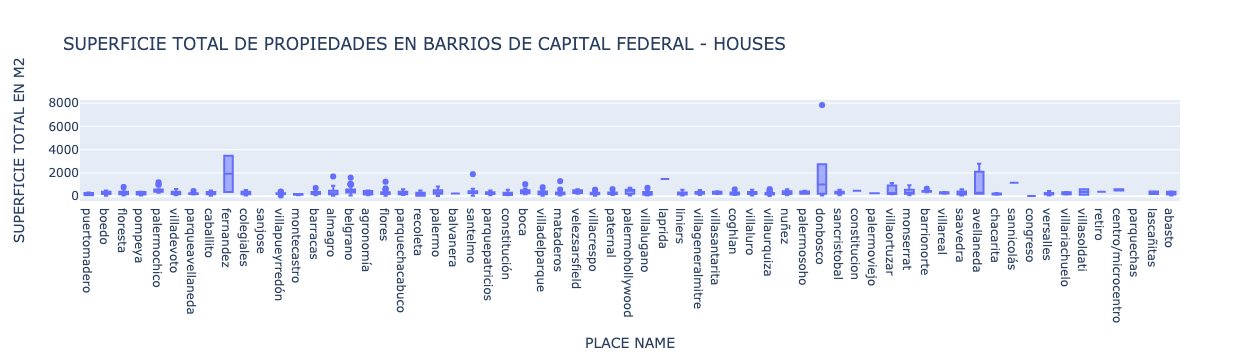

In [923]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - HOUSES')
fig.show()

In [924]:
df_house = df[df['TIPO DE PROPIEDAD']=='house']


### Floresta - house

In [925]:
floresta_index = df_house[df_house['PLACE NAME']=='floresta'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='floresta'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2                   title  \
28613                 800.000  ventacasaenrumenco4amb   

                                                                                                                                                                                                                                                                                                                                        description  
28613  hermosacasaenventaenelexclusivobarrioderumencobarriolaslomascuentaconunterrenode800m2ubicacióneste-oeste,240m2cubiertos,3dormitorios1ensuiteconvestidor,losaradiante,doblevidriodecarpinteríadepvc,equipodeaireacondicionadofrio/calorenliving2bañoscompletos,2toilette,unoadentroyotroengalería,ampliofondocomún,soldetardeenjardínygaleria

In [926]:
df.loc[floresta_index,'SUPERFICIE TOTAL EN M2']=240

### Palermochico - house

In [927]:
palermochico_index = df_house[df_house['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3].index
df_house[df_house['PLACE NAME']=='palermochico'].\
sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]


SUPERFICIE TOTAL EN M2                           title  \
53337                1200.000               casa-palermochico   
10331                1000.000               casaestilofrances   
34235                1000.000  imponentecasaenbarrioparque!!!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
53337  excepcionalcasaenventaenbarrioparqueexcepcionalresidenciaenunaubicacióndeexcelenciaenbarrioparque(ombúal3000,frentealaembajadasuiza)construccióndegrancalidad(mármolesitalianosencargadosespecialmenteparalapropiedad)lote261m2(10x26,10m)superficiecubierta:1100m2lacasaestádesarrolladaen:-subsuelodecocheras(para3autosconplatogiratorio),salademáquinas,taller,2cuartosdeservicioensuitequeventilanaunpatiointerno,lavadero,áreadeplanchadoypuertasblindadadeaccesoalaplantabaja;-plantabaja:importantehalldeentradacon2puertasdoblesrealizadasporebanistaselpisodelhalldeentradaesdemármolconunbellísimodibujodeunarosadelosvientos,quefuerealizadoconpequeñostrozosdemármoldediferentestonosycolores,traídosespecialmentedemilángranrecepción,conampliosventanaleshaciaelfrenteyhaciaelcontrafrentepisosdemármolescultóricoimportantechimeneaenmarcadaenparedesrecubiertasdemármollascolumnasdemármolfuerontraídastambiénespecialmentedemilán(soncilindroscortadosenmitadesyencastradosenuntrabajoúnico)sobreelcomedorunaimpactantepirámidevidriada,réplicadelmuseopompidoudepariscomedoríntimo,toilettederecepciónrevestidoíntegramenteenmármol(pisoypare

Se tratan de casos particulares de casas de muy alto nivel, vamos a dropearlas, ya que no son comunes.

In [928]:
df = df.drop(palermochico_index)

### Parque Avellaneda - house

In [929]:
df[df['PLACE NAME']=='parqueavellaneda'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2        title  \
36909                 447.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
36909  ventadecasa7ambientesomasenparqueavellaneda,capitalfederalmuybuenaubicacióna2cuadrasdeavjuanbalberdi,3deavdirectorio,1deavbruixhermosacasaconunparquehermosoypiscina,quincho,unacuchaexcelenteparasumascotaconuncanilexcelentedistribuciónenpb:constadehalldeentradaconplacardderecepción,ampliolivingcomedorluminoso,cocinacondoblecirculaciónyseparadaconcomedordiario,bañocompleto,cocheraparadosautosconlaescalerahaciaelsótano,lavaderoindependiente,dependenciadeservicioconbañocompletoyunhermosojardínconmuchoverdeconpiletaen1°pisoestánlas5habitacionesampliasconplacarescompletosyairesacondicionadosyescritorioconlos2bañosrestantescalefacción:porcalderavivaenunlugardiferenteenlacapitalfederalesunacasaexcelenteparaunafamilianumerosaalbariño102caba011/011--nirobrokers

### Villa Pueyrredon - house

In [930]:
pueyrredon_index_max=df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index

pueyrredon_index_min = pueyrredon_index_max=df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:40].index


# df[df['PLACE NAME']=='villapueyrredón'].\
#                 sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]

df_house[df_house['PLACE NAME']=='villapueyrredón'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:1]


SUPERFICIE TOTAL EN M2        title  \
15617                  70.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
15617  ventadecasatipotriplex3ambientesenvillapueyrredón,capitalfederalnoaptocreditocasatipotriplexde3ambientesenvillapueyrredonseaccedeporunaescaleraaltriplex,dondeseencuentralacocinaintegradaalliving/comedorytieneunbañocompartimentadoporescalerasevaalprimerpiso,queesunambientede250x2m,tipoescritorio,conunbañoconduchaysalidaaunaterrazade15m2enelsegundopiso,tienedosdormitoriosqueestánseparadosmedianteunaarcada--efegepropiedades

In [931]:
#No queda claro si es un departamento, o una casa, o ambos.
df = df.drop(pueyrredon_index_max[0])
df.loc[pueyrredon_index_min[0],'TIPO DE PROPIEDAD']='duplex/triplex'

### Barracas - house

In [932]:
barracas_index = df_house[df_house['PLACE NAME']=='barracas'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:2].index
df_house[df_house['PLACE NAME']=='barracas'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description','TIPO DE PROPIEDAD']][:2]

SUPERFICIE TOTAL EN M2  \
5328                 710.000   
7284                 580.000   

                                                         title  \
5328    excelenteedificioenblock::idealinversiónparasubdividir   
7284  avregimientosdepatriicios::casade5ambconlocalde170m2enpb   

                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  \
5328  excelenteedificioenblockconstituidopor4deptos,todosconentradaindependiente,yunampliolocalenesquinacondosdormitoriosidealinversiónparasubdividiryreciclarendeptosdeunoodosambientes,tipophsinexpensasubicadaeneldistritodeldiseñodelazonasur,esidealparavenderconcréditoshipotecarios,yaqueposeenunatasadeinterésprivilegiadaeledificioseencuentraa7cuadrasdelaautopistaquecomunicaconelmetrobusdela9dejulioya5cuadrasdelaavvelezsarfieldrvbrokercontacto://15-   
7284                         casaenventayalquilerde580m2enlaplantabajaposeeunlocalde170m2cubiertos,condosbaños,entradadeautoypatioenelprimerpiso,unaviviendaconliving-comedor,cocinaconcomedordiario,4dormitorios,2bañosytoilettederecepciónporúltimo,enlaterrazaposeeunamplioquinchoconparrillalapropiedadseencentraareciclarsepuedenhacervariasreformas,entreellascrear3pisosdeplantaslibresyunapbdecocheras,obienmantenerlaestructuraactualrvbrokercontacto://15-   

     TIPO DE PROPIEDAD  
5328             house  
7284             house

Ambos son casos especiales, uno es un edificio, y el otro es una casa que tambien tiene un local

In [933]:
df = df.drop(barracas_index)

### Almagro - house

In [934]:
almagro_index=df_house[df_house['PLACE NAME']=='almagro'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='almagro'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]

SUPERFICIE TOTAL EN M2        title  \
13485                1700.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
13485  ventadecasa8ambientesenalmagro,capitalfederalloteparaconstruir12pisosconstruir3176metroscuadrados,losdosprimerospisostodalasuperficiedellotefrente16mfondo50,34m-paraconstruirenalturaoalguninstitutoocolegiofos4lasmedidasydatossonatítuloinformativo,lasrealessurgirándelostítuloscorrespondienteselpresenteanuncioessoloatítuloinformativo,pueslaventadedichoinmuebleestásupeditadaaqueelpropietariotrámiteantelaafipelcoti--bettatispropiedades

tiene problemas de papeles esta propiedad

In [935]:
df = df.drop(almagro_index[0])

### Belgrano - house


In [936]:
belgrano_index = df_house[df_house['PLACE NAME']=='belgrano'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3].index
df_house[df_house['PLACE NAME']=='belgrano'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]

SUPERFICIE TOTAL EN M2                       title  \
22017                1600.000          11deseptiembre1500   
33728                1070.000           virreydelpino3500   
10343                1050.000  impactantecasaestiloinglés   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
22017                                                                                                                                                                                 excelentecasadeestilo,absolutamenterefaccionadaconlosmejoresmaterialessobreunterrenode833ycon1600metroscubiertosconstruidosencuatroplantascondosentrepisos,cocheracubiertaensubsuelopara8vehículospb:halldeentrada,living,comedor,escritorio,play-room,toiletteycocina1ºpiso:livingintimo,4habitacionesensuitec/vestentrepiso:1habitaciónensuiteconvestidor2ºpiso:play-room,parrillainterna,bañoyterrazaconpiletade4x2segundoentrepiso:gym3ºpiso:2habitacionesconunbañosubsuelogarajepara8autos,cavadevinosybauleralacasacuentacon3habdeserviciocondosbañosylavadero,salademaquinasyespacioenelsubsueloparaelcuartodeseguridadjardínconparrillaascensoratodoslospisosclimatizadorfrío/calorentodalacasaimportantesistemadeseguridad  
33728                                                                                                                                                                                                                                                                                                                                                    casainglesaestilotudor,deprincipiosde1900completamenterestauradaporestudiocampsytiscorniaaproximadamente870m2cubiertosenterrenopropiode770m2doscocherasfijas(o4espaciosguardacoches)actualmentedeusoresidencialcompletamenterecicladaensuinteriorporsuimportantepresenciaesidealparausocomercialoinstitucional:centrodesalud,escueladenegocios,edificiosinstitucionales,embajadas,etclaventadeesteinmuebleestásujetaalatramitacióndelcódigodetransferenciadeinmuebles(coti),deconformidadconlanormativavigente(resafip2371/08,2439/08yccs)porpartedelpropietario  
10343  impactantecasaestiloingléseninmejorableubicación!(zonadeembajadas!!)-frentede20mtsrecicladaafullporimportanteestudiodearquitecturamanteniendolacalidadymaterialesdelaépoca!!-superluminosaysoleadaentodossusambientes-absolutamenteimpecablecomoaestrenar:idealresidenciadeembajador-casaen3plantasysubsuelo:-pb:-livingycomedor,toilette,cocina,comedordiarioyestar,bañoparapileta,2dependenciasconbaño,lavadero,patioconparrilla,jardínconpileta,entradadeservicio-1erpiso:-escritorio,3suites(mastersuite),2semisuites,2balconesterraza-2dopiso:-gym,granplayroom,baño,ampliaterraza,parrilla-subsuelo:-gransectordebauleraysalademáquinas,cochera4autos-cocinaequipadaconcocinaaristongrandecon6hornallasagasyhornoagas;campanadeaceroinoxidableelescritoriopuedeconvertirseen6todormitorioyelbañodeunadelassuitespuedesacarsehaciahalldeescalerappalcasaequipadaconrejasdeseguridadentodaslaspuertasyventanas

In [937]:
df.loc[belgrano_index[1],'SUPERFICIE TOTAL EN M2']=870

### Flores - house


In [938]:
flores_index = df_house[df_house['PLACE NAME']=='flores'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4].index
df_house[df_house['PLACE NAME']=='flores'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:4]

SUPERFICIE TOTAL EN M2  \
57888                1251.000   
9203                  676.000   
41856                 610.000   
7648                  580.000   

                                                                        title  \
57888                                                             casa-flores   
9203                                                              casaenventa   
41856                                                             casaenventa   
7648   sevendecasadecategoríade580m2cubiertoscondepartamentoenpbindependiente   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        description  
57888                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   ventaexcelentecasa7ambientespb:estarcomedor,cocinacomedordiario,dependenciadeservisioc/baño,patioconparque,pileta,garajeyquinchoen1°piso,5dormitorios(principalensuiteconhidro-masaje)yvestidormássegundobañocompleto,sauna,conkitchenettesubsuelo:playroomquincho:concocinapropiaparrillaybañocompleto(todorecicladoanuevo)lacasaseencuentraenexcelenteestado,aptocreditobancarioconsultar  
9203                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [939]:
#La casa tambien incluye un departamento dentro
df = df.drop(flores_index[3])

### Don Bosco - house

In [940]:
donbosco_index = df_house[df_house['PLACE NAME']=='donbosco'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1].index

df_house[df_house['PLACE NAME']=='donbosco'].\
                sort_values(by = 'SUPERFICIE TOTAL EN M2',ascending=False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]


SUPERFICIE TOTAL EN M2  \
8379                7832.000   

                                                                               title  \
8379  casa7832m²condependenciasendonbosco3400,argentina,capitalfederal,poru$s8500000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
8379  sobre7832m2deloteexisten4111m2cubiertasdesarrolladosendistintosedificiossiendolacasaprincipalsolamentede1246m2cubiertosdesarrolladoendosplantasconlomasaltoencalidadconstructivadeinstalacionesymaterialestambiã©nhaydosedificacionesconstruidasenel2012unadeellasesunspaconpiletacubiertaclimatizadaconunsubsuelodesaladejuegosyentretenimientolaotraedificaciã³nesunedificiodebibliotecadesarrolladaen4pisossiendodosdeellosdossubsuelosyunaplantabajayunprimerpisotodosconlamismasuperficielasuperficiecubiertadelspaylabibliotecaesde2446m2elrestodelosmetroscubiertosesquinchovestuariossalademaquinas(varias)porlascaracterã­sticasdeesteinmueblesepuedesubdividirenmã­nimo4sectoresyesposiblelograraunmasdependiendodelapropuestadeviviendaquesepropongaalamunicipalidaddesanisidro

In [941]:
df.loc[donbosco_index,'SUPERFICIE TOTAL EN M2']=1246

### San Telmo - house

In [942]:
otl_santelmo=df_house[df_house['PLACE NAME']=='santelmo'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]


otl_santelmo_min=df_house[df_house['PLACE NAME']=='santelmo'].\
sort_values('SUPERFICIE TOTAL EN M2')[['SUPERFICIE TOTAL EN M2','title','description']][:2]
otl_santelmo_min

SUPERFICIE TOTAL EN M2                                        title  \
2693                   45.000          u$d78000-tipocasaphenventa-peru1200   
41010                 167.000  casaenterrenopropioconlocalcomercialygarage   

                                                                                           description  
2693                còmodoph,2ambientes-bajasexpensas-cercanoahistòricaferiadesantelmo-impecableestado  
41010  casaconlocal,garage,terrazaaccesiblebañocompleto,patiodependencia,enterrenopropiolotede831x1836

Es un caso muy particular de propiedad, vamos a dropearlo

In [943]:
df = df.drop(otl_santelmo.index[0])

In [944]:
df.loc[otl_santelmo_min.index[0],'TIPO DE PROPIEDAD']='ph'

### Boca - house

In [945]:
otl_boca=df_house[df_house['PLACE NAME']=='boca'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_boca

SUPERFICIE TOTAL EN M2                       title  \
41292                1038.000  casaantiguasobrelotepropio   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
41292  amtsdelaavalmirantebrownydepedrodemendoza,seencuentraesteinmuebledeedificaciónantiguade3plantas,sobrelotepropiodeampliasdimensiones14,20defrentex54,83porsucostadoizqx52,12sobresucostadoder,yfondode14,24conunmartillode1,96x379,superficietotal751m2,edificadaen2plantas,compuestode4unidadesfuncionalesactualmente:doslocales,unode116,40m2totales,yelsegundode175,91m2,masdosufenlaplantaprimeraconentradacomún,losmismossondosdepartamentoantiguosarefaccionar,unode3habitaciones,hall,cocina,bañoyterrazaenlamismaplantamasotraenunaterceraplantayelotroposee4habitaciones,hall,cocina,bañoyterrazaenlamismaplanta,masotraenunaterceraplantaelinmuebleseencuentrasubdivididoen5unidadesfuncionales-

In [946]:
#Tiene varios locales esta propiedad

df= df.drop(otl_boca.index)

### Villa del Parque - house

In [947]:
otl_villadelparque=df_house[df_house['PLACE NAME']=='villadelparque'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_villadelparque

SUPERFICIE TOTAL EN M2  \
52693                 775.000   

                                                          title  \
52693  espectacularcasaenventa,enbarriosantarita,villadelparque   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
52693  casaenventaenbarriosantarita,villadelparqueespectacularcasaterrenoúnico!!desarrolladaen3plantas,condepartamentoindependiente:2cocinas,6dormitorios,4bañoscompletosjardínconpileta,quinchoyparrillagaragepara3autosdobleentradaplantabaja:(departamentointerno,actualmenteutilizadocomooficina)-living-cocinaconcomedordiario-2dormitorios-bañoactualmenteutilizadocomooficina-hallyescalerainternaalprimerpiso(deusocomún)-patioconpérgola,quinchoyparrilla-jardínconpiletade650mx4m,profunda,conmotorparallenadoydesagote-bañocompletoparausodevestuario-garagepara3autos(2espacioscubiertosy1espaciodescubierto)primerpiso(entradaprincipal)-livingcomedor,-saladevideos/música(estaríntimo)-cocinaenormeconcomedordiario,-toilettederecepciónsegundopiso:-4dormitorios,todosconbalcónterrazay2conbañoensuitey3erbañocompleto,todosconhidromasaje+calefacciónxlosaradiantey3hogaresagas+materialesdeconstruccióndeprimerísimacalidad+puertasyportónpentágono+portónlevadizoyrejas,ambosacontrolremoto+rejasentodaslasaberturas+airesacondicionados+alarmaestamosesperandotuconsulta!contactanos!elequipodeyespropiedades

### Mataderos - house

In [948]:
otl_mataderos=df_house[df_house['PLACE NAME']=='mataderos'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:2]
otl_mataderos

SUPERFICIE TOTAL EN M2           title  \
83370                1300.000  casa-mataderos   
73599                 575.000  casa-mataderos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
83370                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              importanteresidenciade1300m2totalessobrelotede20x40mtrsgarage3ó4autoscocina-comedorgranliving-comedoren"l"4dormitoriosampliossuite+mastersuitecondoblevestidor+sauna+hidro+kitchinetyescritoriofondolibre+pileta+doblequinchovidriadosalóndefiestade100m2totalmenteequipadoconbarra,bañoysaladedja11/2cuadradelcentrocomercialavjuanbautistaalberdi!!excelentezonaycomodidades!!-seescuchanpropuestasporpermutaomenorvalor-  
73599  ventacasaenmataderos3ambientescongarajecasasobrelotepropiode:8,66x42,72mfrenteconaccesoacocheracubiertaconrejaslivingcomedor:8x4,20mconpisosdemármolyventanalalfrente,muyluminosoaccesoacocinaporarcadadecorativacocinacomedor:4,50x4mconmesadaenu,conmueblesdebajomesadayalacena,anafeyhornoempotrado,lugarparaheladerayparaunamesagrande,ventanasqueorientanalpatioyparquebrindandomuybuenailuminaciónnaturallapropiedadtienedoblecirculaciónentrelacocinaylosdormitoriosyellivinghalldedistribución1°baño:2x2,20completoconvanitory,hidromasaje,mamparayrevestimientoenpisosyparedesdecerámica1°dormitorio:3,50x4malfombrado,ventanalalfrente,placardenmaderadecedro,airesplit2°dormitorio:4x3mconplacardigualalanterior,ventanaalparquegalería:4x8,66cubiertaconpisosdemosaico,accesodesdelacocinajardín:8,66x18conquincho,piletaydependenciapileta:5x3,30mdefibra,completaconfiltro,bombaquincho:8,66x4mconlahabitacióndeservicioybañoterraza:detodalasuperficiedelapropiedadlavadero:4x3menlaterraza,completoparacomunicarseyvisitar,fjlujánpropiedades40añosdeexperienciaytrayectoriaavisolegal:importante:lasmedidas,imágenes,videos,superficies,preciosydemáscaracterísticasexpuestosenéstesitiosonaproximados,decarácterilustrativoypuedenmodificarsesinprevioavisopartedelasinmobiliariasfjlujánpropiedades/

In [949]:
#El primer caso es muy raro, vamos a dropearlo.
df = df.drop(otl_mataderos.index[0])

### Villa Crespo - house

In [950]:
otl_crespo=df_house[df_house['PLACE NAME']=='villacrespo'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_crespo

SUPERFICIE TOTAL EN M2                                title  \
55633                 565.000  excelentecasaeninmejorableubicación   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
55633  excelentecasaeninmejorableubicaciónmedidasdelterreno:8,50mtsx25mtssuperficiedelterreno:212m²superficiecubierta:495m2superficietotal:565m2plantabaja:escritorio,toilettederecepción,cocinaconmueblesbajomesadayalacena,ampliocomedordiarioalfrentegranlivingcondoblealturaycomedorconpisosdemaderalamismaposeesalidaalpatioconparrillaplantaalta1:dormitorioprincipalalcontrafrenteconsalidaabalcón,poseevestidorybañoensuitesegundodormitorioytercerdormitorioconampliosplacardsylosdosconbañoensuiteplantaalta2:playroom,bañocompleto,saladelectura,altilloysalidaaunaampliaterrazadetallesdecategoría:aberturasdemaderavidriorepartido,calefacciónyaireacondicionadocentral,ascensor,alarmamonitoreadasubsuelo:cocheracubiertaparacuatroautos,ampliabaulera,gimnasio,bañocompletodependenciadeservicio,bañodeservicio,bodegaysalademaquinasexcelentezonaycuadra,cercaníaalparquecentenario,atrescuadrasdeavscalabriniortizyacincocuadrasdelsubtelineab,pologastronómicoycomercialimportante**lasmedidasysuperficiesexpuestassurgendelainformaciónsuministradaporelpropietario****cotientramite**

In [951]:
df.loc[otl_crespo.index,'SUPERFICIE TOTAL EN M2']=495

### Paternal - house

In [952]:
otl_paternal=df_house[df_house['PLACE NAME']=='paternal'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_paternal

SUPERFICIE TOTAL EN M2                              title  \
10923                 612.000  casade4ambientesenventaenpaternal   

                                                                  description  
10923  excelenteloteparaedificar,salen1636metrosvendibles,ametrosdejuanbjusto

In [953]:
df = df.drop(otl_paternal.index[0])

### Villa lugano - house

In [954]:
otl_lugano=df_house[df_house['PLACE NAME']=='villalugano'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_lugano

SUPERFICIE TOTAL EN M2        title  \
15609                 723.000  casaenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
15609  ventadecasa3ambientesenvillalugano,capitalfederalexcelentecasacondetallesdecategoríaenlotede10mx7255mconunaestéticamodernayunaconstrucciónsolida,estahermosacasacuentaconungranlivingcomedor,cocinaseparadaconcomedordiario,quincho,patioconparrillayfondode51mconarboladoyparquizadoenlaplantaalta,poseedosdormitoriosampliosconbañoyvestidorensuitampliohallintimotodoenperfectoestado!!!!cuentaademasconunaexcelenteoportunidaddeampliación,yaquetieneplanosaprobadospara2dormitoriosyunbañomas,enlaplantaalta,sobreelgaragepasantehoyendiadescubierto!noaptocreditodebanco!!!!nodudeenconsultar!!!medidasysuperficiesexpuestassonaproximadas,losdatosdefinitivossurgirándeltítulodepropiedadelvalorconsignadodeexpensasmensualesestásujetoaverificacióny/oajustes---mpinmuebles

Es un caso particular, vamos a dropearlo.

In [955]:
df = df.drop(otl_lugano.index)

### Coglhan - house

In [956]:
otl_coghlan=df_house[df_house['PLACE NAME']=='coghlan'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_coghlan

SUPERFICIE TOTAL EN M2                  title  \
83489                 588.000  casasobrelotede866x40   

                                                                                                                                                                                                                                                                                                                                                                                    description  
83489  casadecategoriasobrelotepropiode866x40,importantejardín(8,66x17)cocheracubiertaconportónautomático,dosdependenciasconbañocompleto,granlivingcomedor,toilete,ampliosdormitoriosconplacares,posibilidadesdeampliar,excelenteestructuralosdatos,medidasydemáscircunstanciassonmeramenteorientativosyestánsujetosarevisióny/overificaciónelpreciodelinmueblepuedesermodificadosinprevioaviso

In [957]:
#Se trata de una casa muy grande, es un caso especial

df = df.drop(otl_coghlan.index)

### Villa Urquiza - house

In [958]:
otl_urquiza=df_house[df_house['PLACE NAME']=='villaurquiza'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:3]
otl_urquiza

SUPERFICIE TOTAL EN M2                                      title  \
84829                 613.000                          casa-villaurquiza   
9782                  500.000  reservado-casasobrelotepropiode8,66x37,53   
85027                 500.000                          casa-villaurquiza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
84829  unacasaexcepcionalenelcorazóndevillaurquizasobrelotedobledetallesdecalidadylujoentodalapropiedadpisosymesadasdemármolitalianosimportadosespecialmenteaireacondicionadocentralfriocalorentodalasuperficiecalefaccionporairecentralsistemaautomatizadodeiluminaciónprogramadodediferentesambientacionessistemadeaudioempotradoenlivingyrecepcionchimeneapiscinaclimatizadade3,75por10conampliovestuarioybañocompletoquinchocerradoconcapacidadpara30personasde9,50mx5melquinchotienesuparrillaycocina,hogaryairesacondicionadospropiosbañosprincipalesconhidromasajesaguacalienteportermotanque,dostermosdealtarecuperacióndegrancapacidadautomatizacióndepersianasaltillodeimpresionantedimensionesconexcelentesplacaresdeguardadoseguridadmonitoreada24horasconalarmasysensoresycámarasdealtacalidadabl$8500-observaciones:lassuperficiesymedidasexpresadassonaproximadasyseexponenalsóloefectoorientativoynosonvinculantes,lasdefinitivassurgirándelaescrituray/oplanosaprobadosdelapropiedadelmontodeexpensasreal,delreciboemitidoporlaadministracióndelconsorciodecopropietariosquerigeelinmueblelapresenteofertadeventaestácondicionadaalaobtencióndelcotiporpartedelpropietario(resolafip2371)  
9782                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          casade4ambientesconjardín,quinchoconparrillayterraza-lotepropiode8,66x37,53-posibilidaddeconstruirdtosenterrazayderealizarviviendamultifamiliar-muybuenaconstrucción-granlivingcomedor-escritorio-3baños-cocinacomedor-lavaderoindependiente-superluminosa-reservado!delapaz1970consúltenos:  
85027                                                                                                                                                                                                          

In [959]:
#El primer valor, es un caso particular, y dsp el otro, esta duplicado

df = df.drop(otl_urquiza.index[:2])

### Barrio Norte - house

In [960]:
otl_norte=df_house[df_house['PLACE NAME']=='barrionorte'].\
sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[['SUPERFICIE TOTAL EN M2','title','description']][:1]
otl_norte

SUPERFICIE TOTAL EN M2                      title  \
53693                 650.000  edificoenventabarrionorte   

                                         description  
53693  edificioenventabarrionorteplanchetadisponible

In [961]:
#Se trata de un edificio entero
df=df.drop(otl_norte.index)

In [962]:
df_casas_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
df_casas_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 498.000     4.000                   1222.000   
mean   2.000   4.799  4525.250                    236.901   
std      NaN   1.715  4445.914                    295.863   
min    2.000   1.000     1.000                      1.000   
25%    2.000   4.000  1500.250                    130.000   
50%    2.000   5.000  4050.000                    200.000   
75%    2.000   6.000  7075.000                    298.750   
max    2.000  12.000 10000.000                   8175.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 952.000            817.000    1251.000    1249.000  
mean                  315.019           1607.954  473839.648  473371.017  
std                   242.203            930.570  509389.741  509215.213  
min                    28.000            190.000   63000.000   63000.000  
25%                   182.000           1065.217  240000.000  240000.000  
50%                   266.000           1423.358  350000.000  350000.000  
75%                   392.500           1937.500  500000.000  500000.000  
max                  3484.000          12121.212 8500000.000 8500000.000

In [963]:
muchos_m2_cubiertos=df_casas_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending=False)[:7].index
df_casas_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending=False)[:7]

operation property_type      place_name  \
42326      sell         house         liniers   
8379       sell         house  capitalfederal   
22017      sell         house        belgrano   
17764      sell         house        santelmo   
10145      sell         house    villaortuzar   
9857       sell         house        belgrano   
49653      sell         house        belgrano   

                       place_with_parent_names country_name      state_name  \
42326       |argentina|capitalfederal|liniers|    argentina  capitalfederal   
8379                |argentina|capitalfederal|    argentina  capitalfederal   
22017      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
17764      |argentina|capitalfederal|santelmo|    argentina  capitalfederal   
10145  |argentina|capitalfederal|villaortuzar|    argentina  capitalfederal   
9857       |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
49653      |argentina|capitalfederal|belgrano|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon       price  \
42326  3431333.000    -34642482,-58528451 -34.642 -58.528  165000.000   
8379   3433955.000                    NaN     NaN     NaN 8500000.000   
22017  3436077.000  -345639863,-584466546 -34.564 -58.447         NaN   
17764  3428113.000    -34623938,-58371177 -34.624 -58.371 1380000.000   
10145  3427387.000  -345686572,-584643072 -34.569 -58.464 2500000.000   
9857   3436077.000    -34570631,-58462415 -34.571 -58.462 2500000.000   
49653  3436077.000                    NaN     NaN     NaN         NaN   

      currency  price_aprox_local_currency  price_aprox_usd  \
42326      usd                 2911342.500       165000.000   
8379       usd               149978250.000      8500000.000   
22017      NaN                         NaN              NaN   
17764      usd                24349410.000      1380000.000   
10145      usd                44111250.000      2500000.000   
9857       usd                44111250.000      2500000.000   
49653      NaN                         NaN              NaN   

       surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  \
42326                  NaN               8175.000               NaN   
8379              7832.000               4111.000          1085.291   
22017             1600.000               1600.000               NaN   
17764                  NaN               1030.000               NaN   
10145             1150.000               1015.000          2173.913   
9857                   NaN               1015.000               NaN   
49653                  NaN               1000.000               NaN   

       price_per_m2  floor  rooms  expenses  \
42326        20.183    NaN  4.000       NaN   
8379       2067.623    NaN    NaN       NaN   
22017           NaN    NaN    NaN       NaN   
17764      1339.806    NaN  9.000       NaN   
10145      2463.054    NaN    NaN       NaN   
9857       2463.054    NaN 12.000       NaN   
49653           NaN    NaN    NaN       NaN   

                                                                                                                                                                                          properati_url  \
42326                                                                                           http://wwwproperaticomar/19rpq_venta_casa_liniers_lavadero_patio_toilette_garage_placard_re-max-total-v   
8379                                                             http://wwwproperaticomar/16bc5_venta_casa_bs-as-g-b-a-zona-norte_don-bosco_3400_piscina_quincho_luminoso_ramos-l-j-lomas-de-san-isidro   
22017                     http://wwwproperaticomar/180qv_venta_casa_belgrano_baulera_suite_gimnasio_jardin_lavadero_parrilla_piscina_terraza_toilette_vestidor_garage_subte-linea-d_achaval-cornejo_edw   
17764                                                                                                                               

Una superficie cubierta de 8000m2 para una casa, es muy extraño,asi como tambien un valor de superficie total inferior a superficie cubierta

In [964]:
df = df.drop(muchos_m2_cubiertos[:4])


In [965]:
# Vamos a poner un minimo de 20m2 cubiertos para casas.
pocos_m2_cubiertos=df_casas_caba[df_casas_caba['SUPERFICIE CUBIERTA EN M2'] < 20].index
df_casas_caba[df_casas_caba['SUPERFICIE CUBIERTA EN M2'] < 20]

operation property_type      place_name  \
6029       sell         house     villadevoto   
6035       sell         house  villasantarita   
17155      sell         house  villadelparque   
24568      sell         house     villalugano   
24569      sell         house     villalugano   
31461      sell         house     montecastro   
35805      sell         house       versalles   
40482      sell         house  villadelparque   
40938      sell         house  villasantarita   
41708      sell         house          abasto   
42621      sell         house       versalles   
47961      sell         house        paternal   
78213      sell         house     villadevoto   
84099      sell         house       chacarita   

                         place_with_parent_names country_name      state_name  \
6029      |argentina|capitalfederal|villadevoto|    argentina  capitalfederal   
6035   |argentina|capitalfederal|villasantarita|    argentina  capitalfederal   
17155  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
24568     |argentina|capitalfederal|villalugano|    argentina  capitalfederal   
24569     |argentina|capitalfederal|villalugano|    argentina  capitalfederal   
31461     |argentina|capitalfederal|montecastro|    argentina  capitalfederal   
35805       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
40482  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
40938  |argentina|capitalfederal|villasantarita|    argentina  capitalfederal   
41708          |argentina|capitalfederal|abasto|    argentina  capitalfederal   
42621       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
47961        |argentina|capitalfederal|paternal|    argentina  capitalfederal   
78213     |argentina|capitalfederal|villadevoto|    argentina  capitalfederal   
84099       |argentina|capitalfederal|chacarita|    argentina  capitalfederal   

       geonames_id                      lat-lon     lat     lon      price  \
6029   3427451.000        -346113787,-585014969 -34.611 -58.501 220000.000   
6035   6693230.000         -34613523,-584908717 -34.614 -58.491 240000.000   
17155  3427455.000        -346075704,-584953795 -34.608 -58.495 380000.000   
24568  3427408.000         -34679962,-584685505 -34.680 -58.469 225000.000   
24569  3427408.000        -346776466,-584705797 -34.678 -58.471 200000.000   
31461  3430596.000         -34620674,-585058262 -34.621 -58.506 410000.000   
35805  3427510.000        -346260871,-585202126 -34.626 -58.520 510000.000   
40482  3427455.000         -34616343,-585098021 -34.616 -58.510 350000.000   
40938  6693230.000  -346128135378,-584871935143 -34.613 -58.487 650000.000   
41708          NaN                          NaN     NaN     NaN        NaN   
42621  3427510.000        -346327991,-585234444 -34.633 -58.523 210000.000   
47961  3430087.000        -345958969,-584715637 -34.596 -58.472 350000.000   
78213  3427451.000         -346102475,-58524242 -34.610 -58.524 480000.000   
84099  3435506.000        -345881388,-584451121 -34.588 -58.445        NaN   

      currency  price_aprox_local_currency  price_aprox_usd  \
6029       usd                 3881790.000       220000.000   
6035       usd                 4234680.000       240000.000   
17155      usd                 6704910.000       380000.000   
24568      usd                 3970012.500       225000.000   
24569      usd                 3528900.000       200000.000   
31461      usd                 7234245.000       410000.000   
35805      usd                 8998695.000       510000.000   
40482      usd                 6175575.000       350000.000   
40938      usd                11468925.000       650000.000   
41708      NaN                         NaN              NaN   
42621      usd                 3705345.000       210000.000   
47961      usd                 6175575.000       350000.000   
78213      usd                 8469360.000       480000.000   
8

In [966]:
df = df.drop(pocos_m2_cubiertos)

In [967]:
muy_barata=df_casas_caba.sort_values('PRECIO USD POR M2')[:7].index
df_casas_caba.sort_values('PRECIO USD POR M2')[:7]

operation property_type      place_name  \
37222      sell         house  capitalfederal   
7685       sell         house            boca   
10067      sell         house       caballito   
16368      sell         house      sannicolás   
41310      sell         house            boca   
3421       sell         house            boca   
114        sell         house        floresta   

                     place_with_parent_names country_name      state_name  \
37222             |argentina|capitalfederal|    argentina  capitalfederal   
7685         |argentina|capitalfederal|boca|    argentina  capitalfederal   
10067   |argentina|capitalfederal|caballito|    argentina  capitalfederal   
16368  |argentina|capitalfederal|sannicolás|    argentina  capitalfederal   
41310        |argentina|capitalfederal|boca|    argentina  capitalfederal   
3421         |argentina|capitalfederal|boca|    argentina  capitalfederal   
114      |argentina|capitalfederal|floresta|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon      price currency  \
37222  3433955.000                    NaN     NaN     NaN  95000.000      usd   
7685   3436004.000  -346344961,-583631337 -34.634 -58.363 135000.000      usd   
10067  3435874.000   -34624673,-584302634 -34.625 -58.430 130000.000      usd   
16368  6693229.000  -346042126,-583894037 -34.604 -58.389 350000.000      usd   
41310  3436004.000   -34633823,-583598175 -34.634 -58.360 125000.000      usd   
3421   3436004.000  -346370988,-583582907 -34.637 -58.358 180000.000      usd   
114    3433910.000  -346280255,-584662479 -34.628 -58.466 219500.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
37222                 1676227.500        95000.000              500.000   
7685                  2382007.500       135000.000              525.000   
10067                 2293785.000       130000.000              450.000   
16368                 6175575.000       350000.000             1159.000   
41310                 2205562.500       125000.000              400.000   
3421                  3176010.000       180000.000              524.000   
114                   3872967.750       219500.000              600.000   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
37222                    NaN           190.000           NaN    NaN    NaN   
7685                 525.000           257.143       257.143    NaN    NaN   
10067                100.000           288.889      1300.000    NaN  4.000   
16368                440.000           301.984       795.455    NaN    NaN   
41310                100.000           312.500      1250.000    NaN    NaN   
3421                 524.000           343.511       343.511    NaN    NaN   
114                  170.000           365.833      1291.176    NaN  3.000   

       expenses  \
37222       NaN   
7685        NaN   
10067       NaN   
16368       NaN   
41310       NaN   
3421        NaN   
114         NaN   

                                                                                                                                                             properati_url  \
37222                                                     http://wwwproperaticomar/19e8c_venta_casa_capital-federal_lavadero_quincho_garage_www-inmobiliariadelgado-com-ar   
7685                                                                           http://wwwproperaticomar/1686m_venta_casa_boca_grupo-lamadrid-constructora-inmobiliaria_euz   
10067                                                                                  http://wwwproperaticomar/16p65_venta_casa_caballito_subte-linea-e_inmobiliaria-diez   
16368  http://wwwproperaticomar/17ftc_venta_casa_san-nicolas_balcon_lavadero_piscina_toilette_vestidor_subte-linea-d_subte-linea-b_subte-linea-a_daniel-zunino-propiedades   
41310                                                                      http://wwwproperaticoma

In [968]:
df = df.drop(muy_barata[:1])
#Demasiado bajo el valor de la propiedad mas barata

In [969]:
demasiado_cara = df_casas_caba.sort_values('PRECIO USD', ascending = False)[:7].index
df_casas_caba.sort_values('PRECIO USD', ascending = False)[:7]

operation property_type      place_name  \
8379       sell         house  capitalfederal   
42945      sell         house    palermochico   
4180       sell         house    palermochico   
52643      sell         house    palermochico   
15392      sell         house    palermochico   
20143      sell         house    palermochico   
24744      sell         house         palermo   

                               place_with_parent_names country_name  \
8379                        |argentina|capitalfederal|    argentina   
42945  |argentina|capitalfederal|palermo|palermochico|    argentina   
4180   |argentina|capitalfederal|palermo|palermochico|    argentina   
52643  |argentina|capitalfederal|palermo|palermochico|    argentina   
15392  |argentina|capitalfederal|palermo|palermochico|    argentina   
20143  |argentina|capitalfederal|palermo|palermochico|    argentina   
24744               |argentina|capitalfederal|palermo|    argentina   

           state_name  geonames_id                      lat-lon     lat  \
8379   capitalfederal  3433955.000                          NaN     NaN   
42945  capitalfederal          NaN          -3457933,-583995855 -34.579   
4180   capitalfederal          NaN        -345804578,-584010945 -34.580   
52643  capitalfederal          NaN                          NaN     NaN   
15392  capitalfederal          NaN  -345775100971,-584013239437 -34.578   
20143  capitalfederal          NaN        -345774344,-584014371 -34.577   
24744  capitalfederal  3430234.000          -34569765,-58439283 -34.570   

          lon       price currency  price_aprox_local_currency  \
8379      NaN 8500000.000      usd               149978250.000   
42945 -58.400 6200000.000      usd               109395900.000   
4180  -58.401 4000000.000      usd                70578000.000   
52643     NaN 3200000.000      usd                56462400.000   
15392 -58.401 3200000.000      usd                56462400.000   
20143 -58.401 3200000.000      usd                56462400.000   
24744 -58.439 3000000.000      usd                52933500.000   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
8379       8500000.000             7832.000               4111.000   
42945      6200000.000                  NaN                970.000   
4180       4000000.000              330.000                330.000   
52643      3200000.000              530.000                530.000   
15392      3200000.000              600.000                500.000   
20143      3200000.000              527.000                527.000   
24744      3000000.000                  NaN                 20.000   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
8379           1085.291      2067.623    NaN    NaN       NaN   
42945               NaN      6391.753    NaN    NaN       NaN   
4180          12121.212     12121.212    NaN    NaN       NaN   
52643          6037.736      6037.736    NaN    NaN       NaN   
15392          5333.333      6400.000    NaN    NaN       NaN   
20143          6072.106      6072.106    NaN    NaN       NaN   
24744               NaN    150000.000    NaN  6.000       NaN   

                                                                                                                                                                                                               properati_url  \
8379                                                                                  http://wwwproperaticomar/16bc5_venta_casa_bs-as-g-b-a-zona-norte_don-bosco_3400_piscina_quincho_luminoso_ramos-l-j-lomas-de-san-isidro   
42945                            http://wwwproperaticomar/19tna_venta_casa_palermo-chico_balcon_suite_jardin_lavadero_parrilla_piscina_toilette_vista_dependencias_garage_impecable_placard_aire-acondicionado_l-j-ramos_g89   
4180                                                                 http://wwwproperaticomar/15s4h_venta_casa_palermo-chico_suite_jardin_parrilla_patio_piscina

In [970]:
# El valor mas caro, es un edificio, no una casa
df = df.drop(demasiado_cara[1])


## PH

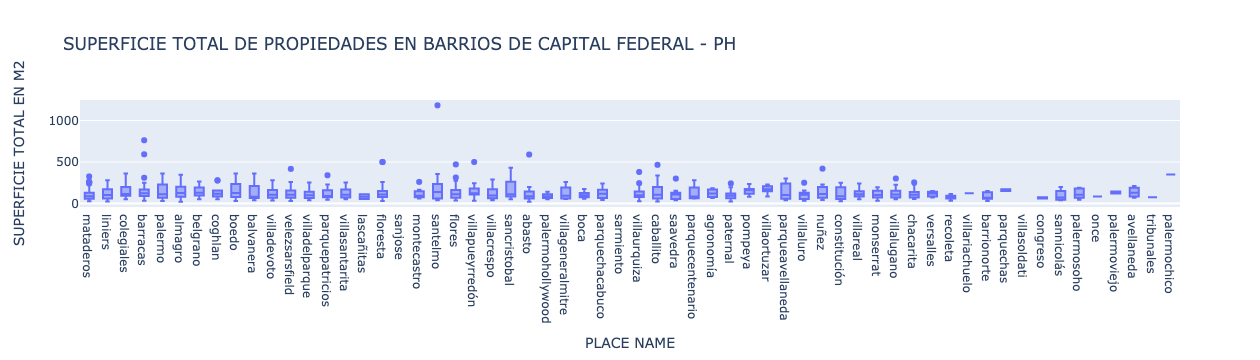

In [971]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PH')
fig.show()

In [972]:
df_ph = df[df['TIPO DE PROPIEDAD']=='ph']

### Mataderos - PH

In [973]:
otl_mataderos=df_ph[df_ph['PLACE NAME']=='mataderos'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:5]
otl_mataderos[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
419                   326.000  245000.000   
57168                 260.000  290000.000   
21579                 260.000  130000.000   
19407                 260.000  180000.000   
13963                 250.000  200000.000   

                                                                       title  \
419                                            hermosacasaenventaenmataderos   
57168                           phmataderosexcelenteoportunidadpara2familias   
21579                              phalfondo7ambientes-mataderos-guamini2400   
19407                                                         ph7ambconfondo   
13963  excelente5ambientescongge,3baños,patio,terraza,quincho,200m2cubiertos   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 description  
419                                                                                                                                                                   espectacularphalfrenteenplantabaja,ubicadoenlazonademataderossobrelotede10mx35mtipocasaconentradaindependientesinexpensas!jardinalfondoconmicro-climaypiscinariñon100%luminosoequipamiento:3habitacionesexcelentelivingdiariogarajeconportonde2,40mx3m(capacidadparadosautos)quinchoconparrillalavaderojardindeinviernoexcelentesdetallesdecategoría:*revestimientoenmadera*frentedeladrillosalavista*ambientesamplios*todaslasventanasequipadasconrejasespectacular,paranodejardever!  
57168  oportunidadpara2familiaspropiedadconjuntayalaveztotalmenteseparadaseindependientes,sevendenjuntasoenformaseparadaenpbundepartamentode3ambientes,dosdormitorios,livingcomedor,cocinaindependiente,patioconlavaderoyfondolibrepropioenpadepartamentomuycómodo1erpiso,balcónalfrentedetodoelancholote,con2dormenprimerpiso,baño,cocinacomedordiario,salidaabalcónterrazadelfondo,conlavadero,yescaleraqueconectacondptoenplantasuperioren2daplantaundormitorioconbañoyluegounespaciotipoplayroom-quinchooelusoquesequieradestinar,conparrillacerrada,barraventanaconpuertabalcónhaciagranbalcón,hayunhornodebarroallítodoenbuenestadogeneralyfuncionando  
21579                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                6habitacionescocina2bañosterrazac/preparadoparaconstruirrecicladoanuevo  
19407                                                                                                                                                                                                                                                                                                                                                                                                                                     phen2plantasconfondoyparrilla,7ambientes,3baos,comedor,lavaderoyampliacocinacomedorde40m2,fondode110m2y2baulerasy/otaller,excelenteubicaciona3cuadrasdeavevaperony5deavdirectoriopublicadoporsoaynosatravesinmomap  
13963                                                       

In [974]:
# Con el primer valor, no queda claro si es un ph o una casa, vamos a dropearlo
df = df.drop(otl_mataderos.index[:1])


### Barracas - PH

In [975]:
otl_barracas=df_ph[df_ph['PLACE NAME']=='barracas'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_barracas[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
45586                 762.000 1250000.000   
17095                 593.000  350000.000   
3432                  310.000  250000.000   

                                               title  \
45586                                      phenventa   
17095  phde6ambientesconterrazayentradaindependiente   
3432       ph4ambientescondependencia2patiosyterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                          description  
45586  son11departamentos/estudiosenblock¡¡todosalquiladosconexcelentesgarantiayrentas!!!tienenelplanodesubdivisionaprobadoporlamunicipalidadperonoloinscribieronenelregistrodelapropiedaddeinmuebleparapagarmenosabl)solofaltariahacerelreglamentodecopropiedadeinscribirloson6dptosde2ambconterrazayparrilla,1dptode3amb,4dptosde2ambsinterraza,(unodeellosenprimerpisoporescalera)son530m2cubiertos+72m2depatios+160m2deterrazalotede815x5055--mosquerapropiedades  
17095                                                                                                                                                        phde6ambientesconterrazayentradaindependienteenplantaalta,alfrentecon261m2cubiertosy332m2descubiertosorientaciónesteynorte,solyluzhall,estar-comedor,5dormitorios(2conbañoconbañeraensuite),toilette,2cocinas,lavadero,galeríasysótanotechosdedoblealtura,pisosdepinoteaydetallesconstructivosoriginales  
3432                                                                                                                                                                                                                                                                                                                                                                   hermosophconentradaindependiente2patios2terrazasparrilla,cocinaysanitariosaterminarmuyluminoso

In [976]:
# Los 2 ph mas grandes, son casos muy particulares, vamos a dropearlos, ya que es poco usual un inmueble de esas caracteristicas.

df = df.drop(otl_barracas.index[:2])

### Coghlan - PH

In [977]:
otl_coghlan=df_ph[df_ph['PLACE NAME']=='coghlan'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_coghlan[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD       title  \
55568                 280.000  319000.000  ph-coghlan   
15589                 276.000  350000.000   phenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
55568  phalfrenteenpbsinexpensas,entradaindependiente,cocherapropiacubierta,granterraza+patioanivel,cocinaconampliocomedor,livingcomedorconpisosdeparquet,dosampliosdormitoriosconimpotantesplacares+dependenciaenelcircuitodellosdormitoriosquepuedeseruntercerdormitorio(2placres)gransotanoquepuedeserunplayroom,dobleentradalosdatos,medidasydemáscircunstanciassonmeramenteorientativosyestánsujetosarevisióny/overificaciónelpreciodelinmueblepuedesermodificadosinprevioaviso  
15589                                                                                                                                                                           importantephapulmóndemanzanaalnoroeste,conunacocheradobledosbaulerasyterrazas1ºplanta:halldeentrada,granlivingcomedoraterraza,toilette,cocina,comedordiario,lavadero,despensa2ºplanta:4dormitorios(1ensuite),2bañoscompletosterraza3ºplanta:azoteaydependenciadeservicio--feracancellieripropiedades

### Velez Sardfield - PH

In [978]:
otl_velezsardfield=df_ph[df_ph['PLACE NAME']=='velezsarsfield'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_velezsardfield[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
82575                 417.000  365000.000   
27953                 260.000  300000.000   

                                                 title  \
82575                               phenvelezsarsfield   
27953  redesanmartin4527vélezsphpb4ambu$300000aptoprof   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
82575  elinmuebleesunaphdetresunidadesfuncionaleslaufnº1seubicaenplantabajaytieneaccesoindividualporelnºdepuerta4855cedeservidumbredepasoafavordelasufnº2y3paralaatenciónymantenimientodeltanquedebombayelectrobombaporelnº4857,seaccedealasunidadesnº2(“a”)ynº3(“b”)deplantaaltalastresufhacenusodeunespacioguardacochesalfrentedelinmueble,concapacidadparatrescocheslapropiedadconstadecocina-livingde3,5mx8,5m,habitaciónde3,5mx3,5m,lavaderode1,5mx2,2m,ante-bañode1mx2m,bañoconbañerade2mx2m,habitaciónde5mx5m,livingde3mx3m,alfondounpatioconjardínyunahabitaciónalfinaldelmismode3mx3mtodoseencuentraenbuenestadodeusoyconservación,evidenciándosehumedadenelcentrodelacocina-livingyenelpasilloquedaalpatioposeeunasuperficietotal,segúntítulo,de417,05m2,porcentual42enteros59centésimos,quesecomponedesuperficiecubierta133,51m2,superficiesemicubierta26,15m2ysuperficiedescubierta257,39m2seguinosenfacebook:inmobiliariagustavodallenogareóhttps://(copiáypegáellink)rematejudicial  
27953                                                                                                                                                         ultimopreciou$300000oportunidad,con70m2deparqueaptoprofesionalhermosophmuyluminosode4ambientes,alcontrafrentesinexpensasorientaciónnortesuperficietotalde260m²,cubiertade170m²ydescubiertade90m²3dormitoriosy2baños,unocompletoyuntoilettepisosdeparquetantigüedad12añosbauleradetallesdecategoríasólo2unidadesenellote,entradaindependiente2plantaspb:salaconjardíndeinvierno,cocinaintegrada,living-comedor,toilette,salidaaljardínde70m²(opcióndehacerpiscina)pa:2dormitoriosconplacardconvistaaljardín,bañocompletoyotrodormitorioamplio(posibilidaddeagregarun4ºdormitoriooagregarunbañoensuite),conplacard,ysalidaabalcón-terrazade20m²colectivos:25,34,47,85,99,106,107,114,166,172,181ventasujetaalaobtencióndelcotiporpartedelpropietariolasreservassetomanexclusivamenteenlainmobiliariaconelmatriculado-matriculacpi6099

In [979]:
# Vamos a dropear este caso particular de ph enorme para lo que es la zona y los valores promedio de m2 de ph.
df = df.drop(otl_velezsardfield.index[:1])


### Parque Patricios - PH

In [980]:
otl_parquepatricios=df_ph[df_ph['PLACE NAME']=='parquepatricios'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_parquepatricios[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
26192                 340.000  176000.000   
35119                 230.000         NaN   

                                                                                   title  \
26192  ideal2familiasretasadaoportunidadnoselopierdaaptocreditoentradaindependiente1piso   
35119                                 venta-ph4amb,c/cochera,patioyterraza-pquepatricios   

                                                                                                                                                                                                                                                                                                                                                                         description  
26192  oportunidad,noselopierda,propiedadubicadaenbariiocomercialametrosdelsubtehymetrobusdepompeyaposee4d9rmitorios,todosalfrente,conbalcon,cocinainstalada,baulera,lavaderocubierto,livingcomedoryestarpatioyterrazaenesquinamuyluminosaexcelenteparaoficinaotallerescuchoofertasaptocreditonoselopierda,avisopublicadoporpixelinmobiliario(serviciodepáginaswebparainmobiliarias)  
35119                                                       codigo:1717-522ubicadoen:cátulocastillo2300-publicadopor:saenzgroupelprecioesdeusd1nullventa-phtipocasac/entradaindependiente,de4amblapropiedadcuentacon3dormitorios,cocina,living-comedor,bañocompletomástoilette,cocheracubierta,patioyterrazac/quinchoa1cuadradeavbrasilcercaníaconmetrobuspublicadoatravésdemapaprop

In [981]:
# Vamos a dropear este caso particular de ph enorme para lo que es la zona y los valores promedio de m2 de ph.

df=df.drop(otl_parquepatricios.index[:1])

### Floresta - PH

In [982]:
otl_floresta=df_ph[df_ph['PLACE NAME']=='floresta'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_floresta[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
30214                 500.000  280000.000   
31537                 500.000  280000.000   
37984                 260.000  280000.000   

                                                                                                                      title  \
30214                                                                    floresta-oportunidad-edificio-hotelen2plantascon12   
31537  floresta-oportunidad-edificio-hotelen2plantascon12departamentosconbañoycocinacadaunoopcionconrentasincontrato$25000,   
37984                                                                                                             phenventa   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                description  
30214  edificio-hotelen2plantascon12departamentosconbaoycocina,c/uopcionconrentasincontrato$25000enelradiodelapropiedad,haynumerososcentrosdeenseanzadediversosniveles,centrosdesalud,buenaacividadcomercialyvehicular,supermercados,comisariacercana,hospitales,altaconcentracinhumanayvehicular,pmes,cercanoavenidadirectorio,numerosareddemicrosycolectivoshaciadistintospuntosdelaciudadydelconurbano,serviciosaguacorrientedesagecloacalgasnaturalluzpavimentocaractersticasgeneralescantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientacin(n)cantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientacin(n)consultar:movil:11-5-938-1273mvil:11-5-1047563lneafija44323514,mail:publicadoporcarlosalbertonoucheatravesinmomap  
31537                                        codigo:07ubicadoen:josebonifacio3100,caba,-publicadopor:carlosalbertonouche,elprecioesdeusd280000nulledificio-hotelen2plantascon12departamentosconbañoycocina,c/uopcionconrentasincontrato$25000enelradiodelapropiedad,haynumerososcentrosdeenseñanzadediversosniveles,centrosdesalud,buenaacividadcomercialyvehicular,supermercados,comisariacercana,hospitales,altaconcentraciònhumanayvehicular,pmes,cercanoavenidadirectorio,numerosareddemicrosycolectivoshaciadistintospuntosdelaciudadydelconurbano,serviciosaguacorrientedesagüecloacalgasnaturalluzpavimentocaracterísticasgeneralescantidadplantas(2)estadodelinmueble(regular)frentedelterreno(mts)(766)largodelterreno(mts)(20)luminosidad(luminoso)orientación(n)consultar:movil:11-5-938-1273mòvil:11-5-1047563lìneafija44323514,mail:publicadoatravésdemapaprop  
37984                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              operacion:ventatipodepropiedad:phambient

In [983]:
# Vamos a dropear los 2 valores, que son duplicados y refieren a un hotel.

df=df.drop(otl_floresta.index[:2])

### Montecastro - PH

In [984]:
otl_montecastro=df_ph[df_ph['PLACE NAME']=='montecastro'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:2]
otl_montecastro[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                            title  \
16504                 260.000  230000.000                        phenventa   
23958                 165.000  214900.000  excelentephmontecastroc/terraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               description  
16504                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               ventadephpisounico4ambientesenmontecastro,capitalfederalplantabaja:accesoagarajeprimerpiso:living�comedorc/pisodecementoalisado;cocinaseparadaconbarradesayunadora;1bañoscompleto;dormitorioprincipalensuiteydossecundariosconpisosdeplacasdemaderas(pisosdeincienso)yplacard;patioconpisodedecksegundopisoterrazac/quinchoyparrillarecicladofaltareciclargaraje,comoasitambieneltercerdormitorioydetallesderevestimientosengeneral--difinipropiedades  
23958  excelentephtipocasamuybuenaubicacion,aunacuadradeaválvarezjonteylopedevegasinexpensasestadoimpecable,todoalfrente2dormitoriosensuite,escritorio,amplioplayroom,bañoconhidromasaje,livingcomedor,cocinacomedor,lavaderoindependiente,yampliaterrazaluminosapropiedad,realizadaconmaterialesdeprimeracalidaddesarrolladoen3plantas1erplanta:ampliolivingcondobleventanalalfrenteycontrafrente,aireacondicionadosplitfríocalorpisomaderaentarugadococinacomedorcompletaconmueblesbajoysobremesadaconbodegayspar,cocinaaceroinoxidablelongvieyventanaldevidriorepartidopisoscerámicosdormitorioensemisuiteconplacaresdoblesconbaulera,ventanalalfrente,bañocompletoconbañeraconhidromasajeypisodemaderaentarugado2daplanta:desdeellivingseaccedemedianteunapintorescaescalerarevestidaenmaderaviraroapasillodedistribuciónconventanalypuertaventanadevidriorepartido:dormitorioensuiteconbañocompletoconbañera,pisosmaderaentarugadoventanal,amplioplacardconbaulerayaireacondicionadosplitfríocalorampliaterrazaalfrentecuartodelavaderoindependienteconsectordeplanchadoporescaleraexteriorhaciala3planta:(posibilidaddeintegrarlaescaleraalinteriordelacasa)playroomcondobleventanaldevidrio

In [985]:
# Vamos a dropear este ph, ya que se trata de un caso particular

df=df.drop(otl_montecastro.index[:1])

### Flores - PH

In [986]:
otl_flores=df_ph[df_ph['PLACE NAME']=='flores'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_flores[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
52904                 471.000  280000.000   
38008                 313.000  315000.000   
53506                 275.000  395000.000   
22401                 272.000  285000.000   

                                                                 title  \
52904                                   ph6ambc/patio,terrazaycochera-   
38008                                                        phenventa   
53506                    excelentephenflores3dormgranterrazaconquincho   
22401  ph5ambientesalfrenteentradaindependienteconterrazaenventaflores   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
52904                                                                                                                                                                                                          departamentotipophde6ambientesenelbarriodefloresampliolivingconpisodeparquet,comedorconpisosdecerámica,dormitoriosconpisosdepinoteayparquetroble,cocinacomedordiario,2baños,lavaderoensótano,patio,parque,quinchoyterraza-medidas:superficiesótano:903m2plantabaja:33023m2planta1erpiso:6145m2ablcochera:$4183-ablph:$642-aysa:$573-losvaloresdeimpuestos,abl,expensas,etc,indicadosenesteavisoestánsujetosaverificacióny/orevisiónelpreciodelinmueblepuedesermodificadosinprevioavisotodainformaciónesasóloefectoorientativolasmedidasrealessurgirándeltítulodepropiedadrespectivo  
38008  ventadeph4ambientesenflores,capitalfederalimpecableph+localde3dormitoriosconposibilidaddeconstruirenplantaalta(posee2terrazasyespacioaereo)seingresaporungarage,quetambienpuedeserunlocalalacalle,luegosepasaaunaampliagaleriaqueconectaalos3dormitorios,cocinaconcomedordiario,lavaderoybañocompletoposeeentradaindependienteespacioaereoquepermiteconstruirmasmetroscubiertoslaunidadseencuentraenbuenestadodeconservaciongeneralcuentacon2terrazaspropiasyunpatioconuncuartodeherramientasexcelenteoportunidad!sedejaconstanciaquelasmedidas,superficiesym2consignadossonaproximados,sujetosaverificacióny/oajusteelpreciodelinmueblepuedesermodificadosinprevioavisofotosdecarácternocontractualgoldsteinpropiedadessrlavdacorrientes4666buenosaires,argentina--goldsteinpropiedadessrl  
53506                                                                                                                                                                                                                                                                                                                                          phenprimerpisoconescaleradetresdormitoriosmasquinchoexcelentephenprimerpisoporescaleraremodeladoanuevoenelaño2008enellímitedelosbarriosdevillacrespo,caballitoyelbarriodeflores,amediacuadradeplazairlandagranterrazaconquinchodependenciadeserviciomuybiencomunicadoporavenidasytransportepúblicoapocascuadrasdelaavenidajuanbjustoydelaavenidaavellanedaparagentequebuscaunoasisenlaciudadconsultamosteestamosesperando!!elequipodeyespropiedades  
22401                                                                                                                                                                                                                                                                                                                         

In [987]:
# Vamos a dropear este ph, ya que se trata de un caso particular

df=df.drop(otl_flores.index[:1])

### Villa Pueyrredon - PH

In [988]:
otl_pueyrredon=df_ph[df_ph['PLACE NAME']=='villapueyrredón'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_pueyrredon[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
7755                  500.000  700000.000   
80434                 244.000  450000.000   
3457                  201.000  291000.000   
70860                 185.000  225000.000   

                                                           title  \
7755                        depto5amb+casa7amb,cocherapara6autos   
80434                  cochera-jardin-quincho-parrilla-impecable   
3457   villapueyrredon-ph2dorm+escrit-excelenteestado-s/expensas   
70860                                         ph-villapueyrredon   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
7755   setratadedospropiedadesenuna:-->-->entrandoporeledificiotenemosenlaplantabajaundepartamentode5ambconpatio,elmismoposeeampliohalldeentrada,bañocompleto,grancocinacomedor,2ampliosdormitoriosconplacardempotrado,un3erdormitorioensuitey4tahabitaciónoescritoriocontoilette,lavaderoydependenciadeservicio;-->-->alaotrapropiedadde7ambóposibilidaddeampliar,seingresademaneraindependiente,lamismaactualmenteestáadaptadacomosaladeestudioygrabacióndemúsica,seingresaporungaragepara6autos,enlaplantabajahay2ampliassalas+3habitaciones(actualmenteestudiosdeediciónygrabación),patiocuertoydescubierto,3baños(paradiscapacitados,damasycaballeros),quinchocubiertoconparrila,livingyterraza;ellivingdelaplantabajatieneunaescaleraquellevaalprimerpisodondeencontramosungrandepósito,cocina,comedor,cuartoconsalidaabalcón,bañocompletoy2habitacionesmuygrandeseldepartamentoylacasatienentodoslosserviciosdemaneraindependiente,porloquesepodríanalquilarporseparadotodoseencuentraenexcelenteestado,muyluminoso,amplio,aireado!!propiedadmuyinteresante,dignadevisitar!bajasexpensas:$5000aproximadamenteporambaspropiedades-  
80434                                                                                                                                                                                                                                           excelentepropiedadenimportantecomplejo,amtsdeavsmdelcarril,nazca,constituyentes,avdelosincas,impecablepb:entradacocheradescubiertayentradaprincipal,living-comedorde7x4ytoilette,cocinaycomedordiarioajardinesde4x2,50x4,50,lavaderocubiertode2,30x1,60,terrazade4x3yjardínde12x4,quinchocubiertoc/parrilla,mesadademármolybachade4x3,50pa:dormitorioprincipalensuitec/placardacallede3,50x3,2ºdormitorioc/placardacallede2,30x4ybalcónfrancés,3ºdormitoriocontrafrenteajardinesc/placardde3,50x4,dosbañoscompletos,2ºplanta:playroom,6,60x4x2,50,idealcuartodetv,gym,espaciomultiuso,todoenexcelenteestadodemantenimiento,pisosdemaderamacizatarugadayplastificada,cerámicaencocina,bañosyplayroom,calderaindividualporradiadores,termotanque,hidroneumático,excelentesdetalles,listaparaocuparcentraldealarmasconmonitoreoyantipanicoporreflectoresysirenascentralizadocucicbamatnº419  
3457                                                                                                                                           

In [989]:
# Vamos a dropear este valor, ya que es un aglomerado de varios tipos de propiedades.

df=df.drop(otl_pueyrredon.index[:1])

### Abasto - PH

In [990]:
otl_abasto=df_ph[df_ph['PLACE NAME']=='abasto'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_abasto[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
63542                 590.000  510000.000  ventacasade7ambientesenabasto   
6335                  200.000  254900.000   impecablephrecicladoenabasto   
3778                  160.000  160000.000                      phenventa   
22038                 141.000  129000.000       phconterraza,sinexpensas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
63542  importantephconentradaindependienteantiguo,recicladoanuevotechosaltosconmolduraspisosdepinoteagranvitreauxentechodelaúltimaplantaquesevisualizadesdelasplantasinferioresaptoprofesionalmuyluminosoescalerasinternasyexternasacadaplanta1erpiso:toilettederecepciónrecepciónde4x6livingde6x450cocinade4x4concomedordiarioyvistaalfrentepatioalcontrafrentede9x5502dopiso:suitealcontrafrentede550x4convestidorybañocompleto+escritoriode4x250ambosconvistaalpatiotraseroysalidaaterraza2dodormitoriode3x5alfrente3erdormitoriode4x350alfrente(ambosconunvestidorenmediodecadauno)2dobañocompleto3erpiso:quinchode7x450concocinayhogardeleñoscontirajepropioconsalidaaterrazade450x9depósitoobaulerade2x2gimnasiode350x7alfrenteconbañocompletoymuybuenespacioparacolocarsaunaojacuzzisótano:toilettemás1bañoconduchadormitorioensuiteconbañocompletode450x4conespacioparaarmarunvestidorplayroomosaladejuegosde850x5lavaderogranbauleraaguacalienteporcalderaindividualcalefacciónporradiadoresentodoslosambientes  
6335                                                                                                                                                                                                                                                                                                                                                                                                                          sarmiento3200phenabastorecicladoanuevo!!excelenteprimerpisoporescalera,detallesoriginalesmuybienconservados,cincodormitoriosmuyampliosydependenciadeservicio,grancocinaabiertaacomedordiario,cuatrobaños,dosdeelloscompletosydosampliostoilttesmuchosdelosambientestienenaccesoaunpatiointerno,loqueledaalapropiedadunaexcelenteluznaturalgranbalconenelfrente,ypisosoriginalesdepinoteayceramicosidealparavivienda,residenciaparaestudiantesoestudiodedanzasoclasesdeteatrootallerdepinturavariaslineasdecolectivoscirculanporlacuadraserviciosindividualesexpensasmensuales$1600yabl$180  
3778                                                                                                                                                                                                                                                                                                                                                                                               4ambientesconpatioyterrazaalfrente,enventa,enabasto!!63m2cubiertos+97m2descubiertos(63m2cubiertos+13m2descubiertosporescritura)primerpisoporescalera,livingcomedor,3dormitoriosconpisosdeparquetysalidaalbalcóncorridode6x1,bañocompleto,cocinacompletaconsalidaalpatiode7m2yaccesoagr

In [991]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_abasto.index[:1])

### Villa Urquiza - PH

In [992]:
otl_urquiza=df_ph[df_ph['PLACE NAME']=='villaurquiza'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_urquiza[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
53472                 380.000  497000.000   
14477                 245.000  240000.000   
4849                  236.000  270000.000   
72637                 230.000  275000.000   

                                                   title  \
53472                            granphenpb-villaurquiza   
14477       ventaph/casa/cochera/local/vurquiza/reciclar   
4849                                           phenventa   
72637  phenventavillaurquiza5ambientesgarajepatioterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
53472                                                                                                                                                                          parainversióndealtarentabilidadgranphenplantabaja--------------------------------------------------------------------------------------------------------------ventaenblockdeunconjuntonosubdividiblede8unidadesdentrodegrancasonaenph(hayotracasaarribaconentradaindependiente)nohayexpensastiene380m2(310cuby70mdepatios)enplantabajayhasidorecicladaen8apartcompletos,(4sonduplex)quecomparten3grandespatios,parrilla,muchasplantas,solyluzinmejorableubicación:ametrosdelcorredorverdededonado,delcbcuba-dragoydeavsmonroeycongreso,cercaníaaestacionestrenysubte,numerosaslíneasdecolectivosyvíasrápidasentodasdireccionesadmitiríaotrosdestinosperotalcualestáesespecialmenteadecuadaparaelalojamientotemporariodeuniversitariosrentabilidadmínimaestimada7,5%tendríafácilseparaciónenviviendapropiayotras4obien5unidadespararentasevendeporfinalizacióndelasucesión  
14477                                                                                                                                                                                                                                                                                                                 corredorresponsable:unobienesraicessrl-cucicba4993contacto:marianobentivenga-mlsid#420491028-146setratadeunphtipocasaenplatabaja,concoheraylocalalfrenteasolo15mtrsdeavdelosincasy100mtrsdeavtriunviratocercanoatodaslaslineasdecolectivosysubteseingresaporellocalquecuentaconuntoiletederecepiónhaciaelfondo3dormitorios(medidas:4x4mtrs-4x36mtrs-35x250mtrs)ingresandoporcochera,seaccedeaunsalónde11x4mtrs,conunacocina(antiguamentepatiodescubierto),siguiendoencontramosunpatioconbañoyporultimoalfondounsalónde11x8mtrslapropiedadcuentacon245m2totalesgranespacioparahacermodificaciónyrefaccionesagustoidealparainversiónconrentahastaelmesdemayode2017de$25000mensualesaptoprofesonal-vivendafamiliar-consultoriosmedicos  
4849   ventadepartamentotipoph4ambientesvillaurquizaphconentradaindependientede236m2condependencia,terraza,galeríayjardínpropioconstadeliving-comedor,3ampliosdormitorios,cocinaindependientedecómodasdimensionesconalacenaymueblesbajomesadaleporepropiedadesleporepropiedadessacuit:33-60234274-9cucicbamatrículanº931(sucursalescaballito-palermo-centro)avisolegal:lasdescripcionesarquitectónicasyfuncionales,valoresdeexpensas

In [993]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_urquiza[:1].index)

### Caballito - PH

In [994]:
otl_caballito=df_ph[df_ph['PLACE NAME']=='caballito'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:4]
otl_caballito[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
17249                 466.000  300000.000   
33533                 336.000  590000.000   
84005                 324.000  410000.000   
18432                 320.000  332000.000   

                                                                  title  \
17249                         granphenprimerpisoconentradaindependiente   
33533  imponnetephdeestiloconcocheradoble,terrazayquinchoemitreyhualfin   
84005                                                           phventa   
18432                            caballitoph5ambientesconbalconyterraza   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
17249                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       granazoteaygarageolocalalacalleenplantabajaaptohoteleríaenelprimerpiso:alfrentehayunaampliasaladoble,apaisadaconsalidaabalcóncorrido,conuntoiletteorientandoalaireyluz:escritorioyunasegundagransaladoble,cocinarecientementerecicladahaciaelfondosesucedenotrastreshabitacionesyunbañocompletoenlaazotea:otrasdoshabitacionesyunbañogranterrazadescubiertade170m²enplantabaja:garageoposiblelocalalacalleensótano:salade5x4superficies(segúntítulo):sótano:21,70m²plantabaja:29,50m²-superpuestas:3,12primerpiso:195,32m²(cubierta:163,48m²;semicubierta:28,30m²ybalcón:3,54m²)azotea:216,68m²(cubierta:47,57m²ydescubierta:169,11m²)superficietotal:46632m²importante:elphcomparteconotras7unidades(todasellasenlaplantabaja)ungranlotede8,66x60estaunidadposeeel40,51%deldominio  
33533                                                                                                                                                                                                                                                                                                                                                                                                                                                                         vermasimagenesen360gradosenhttps://googl/photos/erkd5knjerje8jns9importantepropiedadconstruídaenelaño1918,ubicadafrentealbarrioinglésametrosdeavenidapedrogoyenaconentradaindependienteconstade324m2distribuídosentresniveles:enpbespacioparatresautomóviles,halldedistribución,escritorioalacalle,livingcomedor,cocinatotalmenteequipadaconcomedordiarioyprofusióndemueblesdemuybuenacalidadlavaderoindependiente,dependen

In [995]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_caballito[:1].index)

### Saavedra - PH

In [996]:
otl_saavedra=df_ph[df_ph['PLACE NAME']=='saavedra'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_saavedra[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
23413                 300.000  470000.000     casade5ambientesconcochera   
22949                 152.000  245000.000                      phenventa   
41148                 143.000  169900.000  ventadedepartamentoensaavedra   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
23413  excelentedúplexenexcelenteubicaciónplantabaja,cocheraparatresautos,lavadero,dependenciadeservicioconbaño,patioplantaprimeraamplioliving-comedor,toilette,ampliacocinacomedor,balcónalcontrafrenteplantasegundadormitorioprincipalensuiteconvestidor,2dormitorios,bañocompletoplantatercerabohardillaoplayroom,pequeñaterrazaplantaintermedialindofondoconpatioyjardin,parrillacalefacciónporestufasdetirobalanceadoentodoslosambienteshogaragasenlivingtodoslosservicios,tvporcable,internetsedejaconstanciaquelasmedidas(tantototalescomoparciales),superficies,m2yproporcionesindicadasenelpresentesonaproximadasysujetasaverificación,variacióny/oajustelasexpensaspuedensufrirvariacionesbienvendeameliaclaro  
22949                                                                                                                                                                    ventadedepartamento4ambientesensaavedra,phalfrente,aptoprofesional,sinexpensas,entradaindividual,muyluminoso,pisosdeparquet,flotante,ceramicos,livingcomedor,3dormitorios,hall,bañocompleto,cocina,comedordiario,lavadero,balconsemicubierto,ampliaterrazapropiaconparrillaadicionales:aireacondicionado2,placaecosol,termotanque,llavestermicasoportunidad,excelentezonamuytranquila,cercadeaccesoscomopanamericana,gralpaz,etcdignodeversuconsultaesbienvenidarcmpropiedadesgustavorombola11hernánmartíncarbonecucicbamat5493--rcmpropiedades  
41148                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          ph2pisoporescalerac/entradaindependientec/comedorlavaderoindependientepatio,terrazapropiamuyluminoso!!areciclar!!**nopagaexpensas**bienvendeameliaclaroavcabildo36884702-

In [997]:
df.loc[otl_saavedra.index[:1],'TIPO DE PROPIEDAD']='duplex/triplex'

### Paternal - PH

In [998]:
otl_paternal=df_ph[df_ph['PLACE NAME']=='paternal'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_paternal[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
28504                 242.000  350000.000   
38477                 195.000  290000.000   
34253                 189.000  150000.000   

                                          title  \
28504                                 phenventa   
38477  excelenteph5ambrecicladoanuevo-(1ºpxesc)   
34253        paysandú2200paternalph5ambu$150000   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    description  
28504  phde5ambientesenpaternal,capitalfederal-terrazayquinchococheraimportantephconentradaindependienteen2plantas,espaciopara2coches,livingcomedor,4dormitorios,5baños(2completos),terrazayquinchosupercieplantabajatotalporescritura:123,81,supercieplantaazoteatotal:11774=totalypropiadelaunidadde24155m2sedejaconstanciaquelosm2sonaproximados,aligualquelasmedidasparcialesdelosambientes,yelvalorconsignadodelasexpensasmensualesestasujetoaverificaciony/oajustes,elpreciodelinmueblepuedesermodificadosinprevioavisofotosdecaracternocontractuallasunidadespublicadasestansujetasadisponibilidadgoldsteinpropiedadessrlactuasolamenteencarácterdecomercializadoradelosinmueblesofrecidosgoldsteinpropiedadessrlavdacorrientes4666buenosaires,--goldsteinpropiedadessrl  
38477                                                                                                                                                                                                                    phde5amb-pisounicoconentradaindependiente,sinexpensas-todorecicladoanuevo-(1ºxescalera)m/b/estado-quinchoc/cerramientoparrilla,cocinaytoilette-granlinving-comedorenl,cocinacomedordiariointegradoalliving(artefactosmarcaaristonyjonshon),balconc/vistaalacalle,4dormitorios(1suite)todosconampliosplacares,4baños,escritorio-patioluminosolavaderoconinstalaciónparalavarropaspisosdeporcelanatoyparquetelinmueblecuentaconaireacondicionado/split,estufastirobalanceadoinmejorableubicación:amtsdeavjuanbjustoyestacióndemetrobusboyaca"dignodever"  
34253                                                          phde5ambientesareciclar,alfrentesuperficietotalde189m²,cubiertade180m²ydescubiertade9m²2unidadesindependientesporescaleraunidad1ºpiso:ampliocomedor,balcóncorrido,bañocompleto,cocinaydosdormitoriosalfrente81m2cubiertos9m2descubiertosunidad2ºpiso:2dormitorioscocinapequeñabañoantiguaterrazasubdivididaytransformadaenlivingoquinchocontechodemaderayterrazasemi-cubiertacontoldorebatiblealfrente70m2cubiertosy20m2semi-cubiertoestasdosunidadesestánenunasolaescriturasinexpensaspisosdecerámicosantigüedad70años4unidadesenellotecolectivos:34,42,47,109,110,112,166ventasujetaalaobtencióndelcotiporpartedelpropietariolasreservassetomanexclusivamenteenlainmobiliariaconelmatriculado-matriculacpi6099

In [999]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_paternal[:1].index)

### Villa Luro - PH

In [1000]:
otl_luro=df_ph[df_ph['PLACE NAME']=='villaluro'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_luro[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
53161                 250.000  285000.000   
55921                 157.000  215000.000   
55912                 157.000  215000.000   

                                             title  \
53161                    ph5ambientesvirgilioal300   
55921                ph4ambentradaíndeppatioy2tzas   
55912  ph4ambientesconentradaindependienteterrazas   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
53161                                                                                                                                                                                                                                                                                                                          excelentephde6ambientesalfrenteconentradaindependientedesarrolladoen2plantasplantabajahalldeentradaampliolivingycomedorconpisostarugados,escritorioquepuedeserundormitorio,ampliacocinaconcomedordiarioymueblescompletoshermosopatioandaluzytoilettederecepcion,enlasegundaplanta4dormitoriosmuyampliosybañocompleto,dormitorioprincipalconsalidaabalconyenlaultimaplantahermosaterrazaygranquincho,todoenmuybuenestado,elphesidealparafamilianumerosa,excelenteestadoymuyluminosodetallesdecategoriaa2cuadrasdeavjuanbjusto1cuadradeavlopedevegay2cuadrasdeavrivadavia,salidasrapidasparacualquierpuntodelaciudadcercadevariosmediosdetransportes  
55921  phconentradaindependienteenventaenvillaluroencapitalfederalespectacularpropiedadrecicladahacesolamente1añoymedio,listaparamudarse!estáademásenunaexcelenteubicacióncercadevariostransportesydefácilaccesoaautopistalapropiedadsedistribuyeendosplantaspb:ingresoconentradaindependienteallivingcomedor,cocinaseparadaconcomedordiario,doshabitacionesampliasconplacardybañocompleto,tambiénhayunpatioconparrillaconespacioverde1p:habitaciónsuperampliaconplacard,otrobañocompleto,escritorio,lavaderocubiertoydosterrazassinexpensas!!!esunaexcelenteoportunidaddemudarteynotenerquehacerlenada!!verplano:plantabaja:https://googl/al1ts7plantaalta:https://googl/1le9kfvervideo:https://googl/tbyuqcverpublicación:https://googl/sli4bacifarelli|constructora-inmobiliariamn6199lunesaviernesde10a13y15a19|sábados10a13códigodelapropiedad:cph296267lasmedidassonaproximadasqueressabermassobrenosotros?miraestevideosobrenuestrafilosofíadetrabajo!https://googl/d6kvn8  
55912  phconentradaindependienteenventaenvillaluroencapitalfederalespectacularpropiedadrecicladahacesolamente1añoymedio,listaparamudarse!estáademásenunaexcelenteubicacióncercadevariostransportesydefácilaccesoaautopistalapropiedadsedistribuyeendosplantaspb:ingresoconentradaindependienteallivingcomedor,cocinaseparadaconcomedordiario,doshabitacionesampliasconplacardybañocompleto,tambiénhayunpatioconparrillaconespacioverde1p:habitaciónsuperampliaconplacard,otrobañocompleto,escritorio,lavaderocubiertoydosterrazassinexpensas!!!esunaexcelenteoportunidaddemudarteynotenerquehacerlenada!!verplano:plantabaja:https://googl/al1ts7plantaalta:https://googl/1le9kfvervideo:https://googl/tbyuqcverpublicación:https://googl/sli4bacifarelli|constructora-inmobiliariamn6199lune

In [1001]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_luro[:1].index)

### Nuñez - PH

In [1002]:
otl_nunez=df_ph[df_ph['PLACE NAME']=='nuñez'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_nunez[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD                          title  \
34793                 420.000  980000.000                        phventa   
34513                 230.000  580000.000  ibera1800(excelenteyamplioph)   
12357                 200.000  260000.000    excelentephenlomejordenuñez   

                                                                                                                                                                                                                   description  
34793  sevendeenblokcompleto8unidadesplantabajade2amby3ambientes,conterrazaarefaccionartodolasunidadesestanarefaccionarodemolerzonanuñezcuba4600cabapreciouss980000lote13x33defondoantiguedad50añosventaporoficinainmobiliaria  
34513                                                                                                                             phalacalleconentradaindependiente,cocheraparatresautos,jardín,quinchoconparrilla,granterraza  
12357  nuñez:excelentephenesquina,aunacuadradecabildoseguridadenlacuadra,livingycomedor,star,cocina,cuatrodormitorios,dosbaños,estudio,taller,lavaderoindependiente,muchaluz,hermosaterrazade57m2conparrillaespacioaereode26m2

In [1003]:
# Vamos a dropear este valor, ya que es un caso particular

df = df.drop(otl_nunez[:1].index)

### Villa Lugano - PH

In [1004]:
otl_lugano=df_ph[df_ph['PLACE NAME']=='villalugano'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_lugano[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
29097                 301.000  235000.000   
47066                 225.000  170000.000   
25566                 170.000  210000.000   

                                                  title  \
29097                                         phenventa   
47066                  phfte4ambmuybuenestadoyubicacion   
25566  ventade3deptosde2y3ambientesphenblockvillalugano   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   description  
29097                                                                                                                                                                                                                                                                                                                             villalugano:lote866x3469,superficie301m2,zonificacióne3,fot3,m2vendibles904,facilidadesdepago!!!!masinfomarcelamontegrandeestudioinmobiliariocarloscalvo3915tel:whatsapp:153---marcelamontegrandepropiedades  
47066  sevendephfrentetipocasaubicadoenlaciudadautónomadebuenosaires,desarrolladalapartehabitacionalporcompletoenlaplantabaja,estandoéstacompuestapor3dormitorios,cocina-comedor,ampliasaladeestar,bañoypatioconlavaderotambiénseencuentraunlocalalacallequepuedeserutilizadocomococheracabedestacarquetodalaplantaaltayaceunacómodaterrazamuybienubicadaa100mtsdelaplazasudamérica,avcruzya300mtsdelcentrocomercialdechilavertentradaindividualnotieneespacioscomunes,porendenopagaexpensasinmobiliariapennacchio///avvelezsarsfield1157,cdad  
25566                                                                                                                                                                                                                                                                                                                                              excelenteoportunidadidealinversorpararenta,son3unidadesenphsinexpensasenplantabaja2ambalfrenteconpatioy3ambalcontrafrenteconpatioyfondolibreenplantaalta3ambconbconterrazaypatioconsultenos

In [1005]:
# Vamos a dropear este valor, ya que es un lote

df = df.drop(otl_lugano[:1].index)

### Chacarita - PH

In [1006]:
otl_chacarita=df_ph[df_ph['PLACE NAME']=='chacarita'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]
otl_chacarita[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
82950                 254.000  390000.000   
22914                 230.000  347000.000   
17901                 140.000  188000.000   

                                     title  \
82950                         ph-chacarita   
22914                            phenventa   
17901  phaggiornado3ambientespatioyquincho   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
82950  bellisimophalfrente,4ambientes+garageoconsultorio,aptoprofesional,entradaindependienteporelfrenteydeservicio;elphfueconstruidoendoblealturalacualledaunagranluminosidadentodoslosambientes,conmaterialesdeprimeracalidadysuestadoesimpecablemetrostotales255m2,cubiertos189m2plantabaja:living+comedor,cocinacongrandespensa,toillete,cochera,consultorioprimerpiso:tresdormitoriosunoensuiteconvestidorconexcelentevistaymuybuenasdimensiones,masotrobañosegundopiso:lavadero,habitacióndeserviciooplayroomconbañoysalidaaunaespectacularterrazaconparrillaexcelentezonacercadelsubtebimperdible!!!!-avisopublicadoporsumaprop|gestióninmobiliariasimple  
22914                                                                                                                                                                                                                                                                                                                     ventadeph4ambconterrazarecicladoanuevo1erpisoporescaleraconentradaindependienteyterrazapropiacañosdeluz,aguaygasanuevoaberturasenmaderaoriginalesrestaurados,pisosdepinoteaanuevos,graníticosycalcáreosengalería;escalerayentradaenmármol,techosdebovedilla,vitreauxenvestíbuloyampliaterrazaaptocrételéfono:47727333--nexopropiedades  
17901                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    livingcomedor,2dormitorios,patio,quinchoen2dopisoinstalacionessanitariasejecutadasanuevohace10años120m2excelenteestadoasemprogpsresponsablegracielameza

### San Telmo - PH

In [1007]:
otl_santelmo=df_ph[df_ph['PLACE NAME']=='santelmo'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:1]

otl_santelmo[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD         title  \
80400                1183.000 1290000.000  libertad1200   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             description  
80400  inmuebleconstruidoenph,actualmenteutilizadocomohostel(hi),sedesarrollaentresplantas+subsueloparedesdeladrilloalavistayestructurasdehierrolasplantasbalconeanaunpintorescopatiocentralterrazapropiaconsolariumeledificiocuentaconascensor-elestadodeconservaciónesbuenototaldedormitoriosdoce(12)totaldebaños(14)estar(10)actualmenteenusootrossectoresrecepción,patio,cocina,terrazaconsolariumsuperficiesegúnplanomunicipal:(exp12105/98)superficieterreno:456,42m2(15,21mx30,11m)-superficieexistente:1183,21m2superficieaconstruir211,65m2||medidas-fondo:3011m2-frente:1521m2

Es un caso muy particular, donde el inmueble es un hostel de muy grandes dimensiones.

In [1008]:
df = df.drop(otl_santelmo.index)

In [1009]:
df_ph_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
df_ph_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 115.000 968.000   149.000                   1409.000   
mean    2.304   3.610   916.584                     88.268   
std     2.340   1.329   836.185                     52.149   
min     1.000   1.000     1.000                      1.000   
25%     1.000   3.000   300.000                     54.000   
50%     1.000   3.000   600.000                     76.000   
75%     3.000   4.000  1400.000                    110.000   
max    16.000  12.000  4600.000                    373.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                1077.000           1035.000    1485.000    1484.000  
mean                  122.690           1665.642  185295.960  184410.748  
std                    70.680            575.165  101979.017   98752.885  
min                    22.000            151.371   45000.000   15591.260  
25%                    70.000           1222.876  120000.000  120000.000  
50%                   105.000           1611.842  159000.000  159000.000  
75%                   160.000           2044.786  225000.000  225000.000  
max                   430.000           3630.435 1185000.000  995000.000

In [1010]:
muchos_pisos_ph = df_ph_caba[df_ph_caba.floor > 6].index
df_ph_caba.sort_values('floor', ascending=False)[:10]

operation property_type      place_name  \
27599      sell            ph         palermo   
32801      sell            ph       caballito   
16618      sell            ph         almagro   
14430      sell            ph  villadelparque   
46798      sell            ph       balvanera   
84326      sell            ph       versalles   
530        sell            ph         coghlan   
14778      sell            ph     villacrespo   
529        sell            ph        belgrano   
46502      sell            ph       versalles   

                         place_with_parent_names country_name      state_name  \
27599         |argentina|capitalfederal|palermo|    argentina  capitalfederal   
32801       |argentina|capitalfederal|caballito|    argentina  capitalfederal   
16618         |argentina|capitalfederal|almagro|    argentina  capitalfederal   
14430  |argentina|capitalfederal|villadelparque|    argentina  capitalfederal   
46798       |argentina|capitalfederal|balvanera|    argentina  capitalfederal   
84326       |argentina|capitalfederal|versalles|    argentina  capitalfederal   
530           |argentina|capitalfederal|coghlan|    argentina  capitalfederal   
14778     |argentina|capitalfederal|villacrespo|    argentina  capitalfederal   
529          |argentina|capitalfederal|belgrano|    argentina  capitalfederal   
46502       |argentina|capitalfederal|versalles|    argentina  capitalfederal   

       geonames_id                lat-lon     lat     lon      price currency  \
27599  3430234.000    -34588935,-58432096 -34.589 -58.432 165000.000      usd   
32801  3435874.000    -34629006,-58431408 -34.629 -58.431 130000.000      usd   
16618  3436397.000    -34600779,-58415586 -34.601 -58.416 163000.000      usd   
14430  3427455.000    -34609143,-58501454 -34.609 -58.501 140000.000      usd   
46798  6693228.000    -34603329,-58397141 -34.603 -58.397 135000.000      usd   
84326  3427510.000    -34630983,-58518105 -34.631 -58.518 220000.000      usd   
530    3435359.000   -345666643,-58471989 -34.567 -58.472 152000.000      usd   
14778  3427458.000   -345956141,-58439306 -34.596 -58.439 135000.000      usd   
529    3436077.000  -345666711,-584720061 -34.567 -58.472 152000.000      usd   
46502  3427510.000    -34633808,-58527002 -34.634 -58.527 155000.000      usd   

       price_aprox_local_currency  price_aprox_usd  surface_total_in_m2  \
27599                 2911342.500       165000.000                  NaN   
32801                 2293785.000       130000.000                  NaN   
16618                 2876053.500       163000.000                  NaN   
14430                 2470230.000       140000.000                  NaN   
46798                 2382007.500       135000.000                  NaN   
84326                 3881790.000       220000.000                  NaN   
530                   2681964.000       152000.000               52.000   
14778                 2382007.500       135000.000               54.000   
529                   2681964.000       152000.000               52.000   
46502                 2734897.500       155000.000                  NaN   

       surface_covered_in_m2  price_usd_per_m2  price_per_m2  floor  rooms  \
27599                 20.000               NaN      8250.000 16.000  3.000   
32801                 44.000               NaN      2954.545 14.000  4.000   
16618                 20.000               NaN      8150.000  9.000  4.000   
14430                 20.000               NaN      7000.000  8.000  3.000   
46798                 97.000               NaN      1391.753  7.000  4.000   
84326                 98.000               NaN      2244.898  6.000  3.000   
530                   52.000          2923.077      2923.077  6.000  2.000   
14778                 46.000          2500.000      2934.783  6.000  3.000   
529                   52.000          2923.077      2923.077  6.000  2.000   
46502                 63.000               NaN      2460.317  5.000  3.000  

In [1011]:
#Vamos a dropear los ph que tienen valores raros de cantidad de pisos, y poner un maximo de hasta 6 pisos

df = df.drop(muchos_pisos_ph)

In [1012]:
# Vamos a tomar como parametro el quantile 20, como minimo de superficie cubierta.

q2=df_ph_caba['SUPERFICIE CUBIERTA EN M2'].quantile(.2)

superficie_cubierta_mal_ph = df[df['SUPERFICIE CUBIERTA EN M2'] < q2].index

df = df.drop(superficie_cubierta_mal_ph)

In [1013]:
# Vamos a dropear todos los valores donde sup cub sea superior a sup total

superficie_total_mal_ph = df_ph_caba[df_ph_caba['SUPERFICIE CUBIERTA EN M2'] > df_ph_caba['SUPERFICIE TOTAL EN M2']].index

df = df.drop(superficie_total_mal_ph)

In [1014]:
index_ph_precio_m2=df[np.logical_and(df['TIPO DE PROPIEDAD']=='ph',df['PRECIO USD POR M2']<500)].index

df_ph_caba.sort_values('PRECIO USD POR M2')[:10]

operation property_type       place_name  \
79006      sell            ph      villacrespo   
56192      sell            ph   capitalfederal   
36727      sell            ph          almagro   
36726      sell            ph        balvanera   
21579      sell            ph        mataderos   
15327      sell            ph     constitución   
4186       sell            ph  parquechacabuco   
41085      sell            ph        mataderos   
31587      sell            ph        villareal   
80120      sell            ph          pompeya   

                          place_with_parent_names country_name  \
79006      |argentina|capitalfederal|villacrespo|    argentina   
56192                  |argentina|capitalfederal|    argentina   
36727          |argentina|capitalfederal|almagro|    argentina   
36726        |argentina|capitalfederal|balvanera|    argentina   
21579        |argentina|capitalfederal|mataderos|    argentina   
15327     |argentina|capitalfederal|constitución|    argentina   
4186   |argentina|capitalfederal|parquechacabuco|    argentina   
41085        |argentina|capitalfederal|mataderos|    argentina   
31587        |argentina|capitalfederal|villareal|    argentina   
80120          |argentina|capitalfederal|pompeya|    argentina   

           state_name  geonames_id                      lat-lon     lat  \
79006  capitalfederal  3427458.000                          NaN     NaN   
56192  capitalfederal  3433955.000  -346434315988,-584749152869 -34.643   
36727  capitalfederal  3436397.000  -346142052423,-584134833035 -34.614   
36726  capitalfederal  6693228.000         -346141472,-58413315 -34.614   
21579  capitalfederal  3430787.000        -346572422,-585029706 -34.657   
15327  capitalfederal  3435257.000        -346253217,-583828981 -34.625   
4186   capitalfederal  3430116.000         -346434566,-58432178 -34.643   
41085  capitalfederal  3430787.000        -346635514,-584908494 -34.664   
31587  capitalfederal  3427383.000        -346201601,-585311704 -34.620   
80120  capitalfederal  3430387.000                          NaN     NaN   

          lon      price currency  price_aprox_local_currency  \
79006     NaN 278000.000      ars                  275099.980   
56192 -58.475  95000.000      usd                 1676227.500   
36727 -58.413 138000.000      usd                 2434941.000   
36726 -58.413 138000.000      usd                 2434941.000   
21579 -58.503 130000.000      usd                 2293785.000   
15327 -58.383 129000.000      usd                 2276140.500   
4186  -58.432 105000.000      usd                 1852672.500   
41085 -58.491  85000.000      usd                 1499782.500   
31587 -58.531 130000.000      usd                 2293785.000   
80120     NaN 129000.000      usd                 2276140.500   

       price_aprox_usd  surface_total_in_m2  surface_covered_in_m2  \
79006        15591.260              103.000                 82.000   
56192        95000.000              211.000                 88.000   
36727       138000.000              295.000                153.000   
36726       138000.000              295.000                153.000   
21579       130000.000              260.000                200.000   
15327       129000.000              250.000                130.000   
4186        105000.000              203.000                118.000   
41085        85000.000              159.000                 72.000   
31587       130000.000              240.000                120.000   
80120       129000.000              234.000                    NaN   

       price_usd_per_m2  price_per_m2  floor  rooms  expenses  \
79006           151.371      3390.244    NaN    NaN   400.000   
56192           450.237      1079.545    NaN    NaN       NaN   
36727           467.797       901.961    NaN  4.000       NaN   
36726           467.797       901.961    NaN  4.000       NaN   
21579           500.000       650.000    NaN  7.000       NaN   
15327           516.000  

In [1015]:
df.loc[index_ph_precio_m2[:1],'TIPO DE PROPIEDAD']='apartment'

Los precios de los ph por m2, inician en 500 usd/m2, vamos a dropear los precios inferiores

In [1016]:
df = df.drop(index_ph_precio_m2)

## Deposito

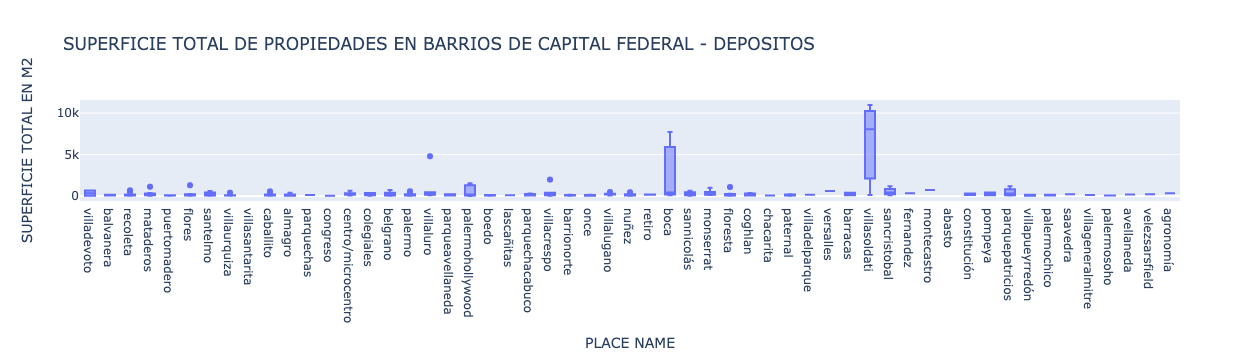

In [1017]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]\
             ,y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DEPOSITOS')

fig.show()

In [1018]:
df_deposito = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]


In [1019]:
otl_villaluro=df_deposito[df_deposito['PLACE NAME']=='villaluro'].sort_values('SUPERFICIE TOTAL EN M2',ascending = False)[:3]

otl_villaluro[['SUPERFICIE TOTAL EN M2','PRECIO USD','title','description']]

SUPERFICIE TOTAL EN M2  PRECIO USD  \
48890                4800.000 4000000.000   
16511                 460.000  345000.000   
21261                 270.000  275000.000   

                                                  title  \
48890            plantaindustrialde3500m2salidaa3calles   
16511                                         phenventa   
21261  calderondelabarca300,casaenesquinarecjclar,venta   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       description  
48890  capitalfederal,villaluro-código0292plantaindustrialde4800m2cubiertos,sobrefraccióndeterrenoirregularde3825m2totales(5terrenos)consalidaa3callesgalpónparabólicode800m2(20mx40m)altura8m,otrosgalponesdelosaydechapaen3plantas,de5a6mdealturaestacionamientocubierto,variosvestuariosybañosarefaccionar,portóndeentradaparacontainers,másde1000m2deoficinasen3plantas,redhidrófuga,muybuenospisosaptosupermercadodeprimeralínea(nohayenlazona),depósitosuotrosrubrosubicadoametrosdeavjuanbjustoy100mdeautopistapmorenozonificación:r2bii,fot:1,2opciónventa  
16511                                                                                                                           ventadedepositoenvillaluro,capitalfederalsetratadeundeposito/localde310metroscuadradoscubiertosmas150descubiertoscuentaconunaentradaparavehículosyunaentradapeatonalunasuperficiede50metroscuadradosdeoficinay2bañosidealparasupermercadochino!!esunaunidadfuncionalubicadaenlaplantabaja(noeslotepropio)zonificacionr2b2setomapropiedadenpartedepago!!!contacto:diegoramos+-1878hernanmartincarbonematcucicba5493--rcmpropiedades  
21261                                                                                                                                                                                                                                     excelenteesquinacasaantiguaparareciclarodemoler!!!lotepropiode270m2totalmenteaprovechables!!!!zonagastronomicapornaturaleza!!!sepuedeconstruirlocalesymonoambientes!!!idealempresaconstructoraoparticular!!!valelapenaverloconmuchopotencial!!!avisopublicadoporpixelinmobiliario(serviciodepáginaswebparainmobiliarias)

In [1020]:
# Es un caso particular de una planta industrial muy grande, voy a dropearlo.

df = df.drop(otl_villaluro[:1].index)

In [1021]:
df_deposito_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
df_deposito_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 36.000 194.000    53.000                    359.000   
mean   4.889   3.603  3177.792                    243.067   
std    3.336   1.916  3231.910                    754.417   
min    1.000   1.000     1.000                     48.000   
25%    3.000   3.000  1400.000                     70.500   
50%    4.000   3.000  2300.000                    112.000   
75%    6.000   4.000  3500.000                    206.500   
max   16.000  18.000 19000.000                  10958.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 285.000            258.000     370.000     357.000  
mean                  319.091           2281.050  537066.057  418878.530  
std                   935.834           1631.967 1007351.183  739197.888  
min                    26.000             13.797   19900.000    7571.290  
25%                    79.000           1280.193  165000.000  160000.000  
50%                   145.000           2005.072  254500.000  245000.000  
75%                   270.000           2889.821  489750.000  430000.000  
max                 10958.000          13698.630 8500000.000 8500000.000

In [1022]:
superficie_cubierta_mal_deposito=df_deposito_caba[df_deposito_caba['SUPERFICIE CUBIERTA EN M2']>df_deposito_caba['SUPERFICIE TOTAL EN M2']].index

df = df.drop(superficie_cubierta_mal_deposito)

In [1023]:
# Podemos observar que el valor minimo de superficie total, es inferior al de superficie cubierta, por los NaN Values, no porque hay un inmueble que tiene sup cubierta mayor a total

df_deposito_caba.sort_values('SUPERFICIE TOTAL EN M2')[:5][['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
8959                         NaN                  26.000   
56847                        NaN                  37.000   
55773                        NaN                  40.000   
54768                        NaN                  43.000   
34884                     48.000                  48.000   

                                                                  title  \
8959                                                departamentoenventa   
56847                                                     avcabildo2800   
55773                                            departamento-mataderos   
54768                                               departamentoenventa   
34884  torreastor-beruti3300-pisoaltisimovistaabiertaterminadoyamoblado   

       PRECIO USD POR M2  
8959            3423.077  
56847           2918.919  
55773           2100.000  
54768           3604.651  
34884           6458.333

In [1024]:
deposito_index =df_deposito_caba.sort_values('expenses')[:5][['expenses','SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2']].index

df_deposito_caba.sort_values('expenses')[:5][['expenses','SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2']]

expenses  SUPERFICIE TOTAL EN M2  \
51636     1.000               10958.000   
49470     1.000                7722.000   
546     300.000                  76.000   
9141    400.000                 135.000   
60963   500.000                 214.000   

                                                       title  \
51636  excelentenaveindustrialde10960m2sobreterrenode18151m2   
49470               ventaconrentaespectaculardepósitopremium   
546                                      departamentoenventa   
9141                                               phenventa   
60963                                         local-santelmo   

       PRECIO USD POR M2  
51636            775.689  
49470           1036.001  
546                  NaN  
9141            1481.481  
60963            981.308

Estos valores de expensas, son erroneos, vamos a imputarle np.NaN, para que no nos hagan ruido

In [1025]:
df.loc[deposito_index[:2],'expenses']=np.NaN

In [1026]:
deposito_index=df_deposito_caba.sort_values('PRECIO USD POR M2')[:5][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']].index

df_deposito_caba.sort_values('PRECIO USD POR M2')[:5][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']]

SUPERFICIE TOTAL EN M2  \
49517                8053.000   
21374                 365.000   
84571                  60.000   
19276                 500.000   
18834                 208.000   

                                                            title  \
49517                                 naveindustrial-villasoldati   
21374  importantelocalensubsueloconentradaindependienteenalquiler   
84571       departamentoenventaenbalvanera3ambientes60m2–jujuy300   
19276                                               echeandia6600   
18834                                     casalotepropioaestrenar   

       PRECIO USD POR M2  PRECIO USD  
49517             13.797  111111.000  
21374             39.950   14581.750  
84571            126.188    7571.290  
19276            500.000  250000.000  
18834            528.846  110000.000

In [1027]:
# Los primeros 3 indices, tienen valores muy bajos, segun simulaciones en ZonaProp

df = df.drop(deposito_index[:3])

In [1028]:
deposito_index2=df_deposito_caba.sort_values('PRECIO USD', ascending = False)[:5]\
[['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','title','PLACE NAME','PRECIO USD',"TIPO DE PROPIEDAD"]].index

df_deposito_caba.sort_values('PRECIO USD', ascending = False)[:5]\
[['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','title','PLACE NAME','PRECIO USD',"TIPO DE PROPIEDAD"]]

SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
51636               10958.000                  10958.000   
49470                7722.000                   7722.000   
48933                     NaN                   4550.000   
50078                1556.000                        NaN   
50087                1556.000                        NaN   

                                                                       title  \
51636                  excelentenaveindustrialde10960m2sobreterrenode18151m2   
49470                               ventaconrentaespectaculardepósitopremium   
48933  importanteedificiocomercial/industrialamtsdeavcorrientesyavpueyrredón   
50078                                                 local-palermohollywood   
50087                                                  casa-palermohollywood   

             PLACE NAME  PRECIO USD TIPO DE PROPIEDAD  
51636      villasoldati 8500000.000          deposito  
49470              boca 8000000.000          deposito  
48933              once 5000000.000          deposito  
50078  palermohollywood 3500000.000          deposito  
50087  palermohollywood 3500000.000          deposito

In [1029]:
# Son precios acordes segun zona prop, pero el 2do y el tercer index, son duplicados

df = df.drop(deposito_index2[1])

## Store

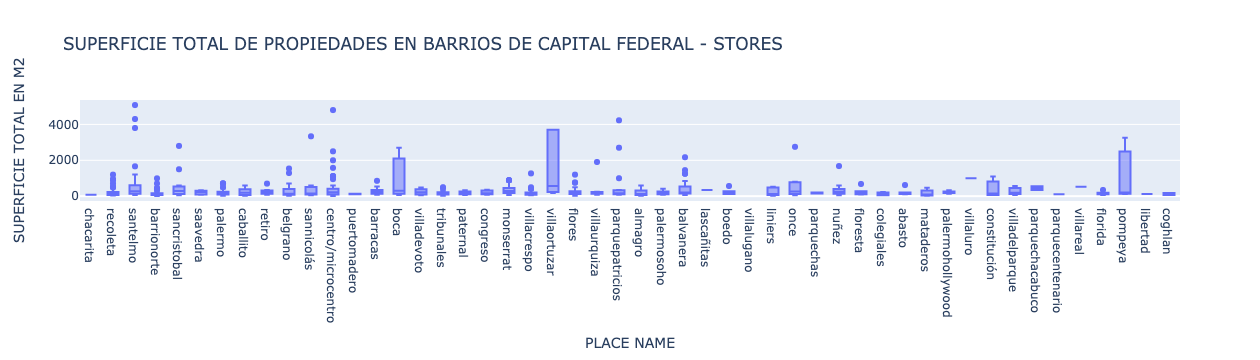

In [1030]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')], y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - STORES')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q3(75) + 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1031]:
store_outliers = ['recoleta','santelmo', 'barrionorte','sancristobal','palermo','retiro','belgrano','sannicolás','centro/microcentro', 'barracas', 'tribunales',
                 'montserrat','villacrespo','flores','villaurquiza','parquepatricios','balvanera','boedo','once','nuñez','floresta','abasto','florida']

df_stores = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]

for outliers in store_outliers:
    q1 = df_stores[df_stores['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_stores[df_stores['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_store_sup_max = df_stores[np.logical_and(df_stores['PLACE NAME']==outliers, df_stores['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    
    df = df.drop(index_outlier_store_sup_max)


In [1032]:
df_stores_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]
df_stores_caba.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 21.000   119.000                    555.000   
mean   4.000  2.429  3487.790                    247.582   
std      NaN  2.908  3613.697                    397.610   
min    4.000  1.000     1.000                     48.000   
25%    4.000  1.000  1000.000                     89.000   
50%    4.000  1.000  2800.000                    144.000   
75%    4.000  2.000  4900.000                    258.000   
max    4.000 10.000 18069.000                   3700.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                 596.000            515.000      591.000     588.000  
mean                  226.577           2779.141   591510.393  507312.220  
std                   315.693           2162.183  1181197.123  585588.549  
min                    12.000             96.696    25000.000    5608.360  
25%                    84.000           1500.000   202500.000  203750.000  
50%                   146.500           2229.299   350000.000  347500.000  
75%                   260.000           3446.340   600000.000  600000.000  
max                  3700.000          22000.000 19267560.000 6500000.000

In [1033]:
store_index_expenses=df_stores_caba.sort_values('expenses')[:20].index

df_stores_caba.sort_values('expenses')[['expenses','SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD']][:20]

# Ya que suponemos el valor de 1 es algo simbolico, vamos a imputarles nan a los 12 primeros valores de expenses

df.loc[store_index_expenses[:12],'expenses']=np.NaN

In [1034]:
df_stores_caba.sort_values('SUPERFICIE TOTAL EN M2')[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD']][:4]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
49369                        NaN                  12.000           2083.333   
82938                        NaN                  16.000           1875.000   
83012                        NaN                  18.000           1777.778   
58407                        NaN                  18.000           1500.000   

       PRECIO USD  
49369   25000.000  
82938   30000.000  
83012   32000.000  
58407   27000.000

In [1035]:
# Podemos ver que hay varios NaN, en la superficie cubierta, y es por esto que tiene un valor inferior min a sup total, pero los valores de superficie total son muy bajos

# Suponemos un valor de Superficie total minimo de 30m2

store_index_sup_muy_chica = df_stores_caba[df_stores_caba['SUPERFICIE TOTAL EN M2'] < 30 ].index
df = df.drop(store_index_sup_muy_chica)


store_index_sup_mal_cargada = df_stores_caba[df_stores_caba['SUPERFICIE CUBIERTA EN M2'] > df_stores_caba['SUPERFICIE TOTAL EN M2']].index
df = df.drop(store_index_sup_mal_cargada)

In [1036]:

df_stores_caba.sort_values('PRECIO USD',ascending = False)[:3][['SUPERFICIE TOTAL EN M2','title','PRECIO USD POR M2','PRECIO USD','PLACE NAME']]

SUPERFICIE TOTAL EN M2                                        title  \
50003                3700.000    excelentepropiedadde3700m2amtstriunvirato   
50199                3700.000      importantepropiedad3700m2aptav/destinos   
24407                1000.000  localnuevoaestrenar,1000metros,esquinaventa   

       PRECIO USD POR M2  PRECIO USD    PLACE NAME  
50003           1756.757 6500000.000  villaortuzar  
50199           1486.486 5500000.000  villaortuzar  
24407           3950.000 3950000.000     villaluro

Son logicos los precios

### Duplex/Triplex 

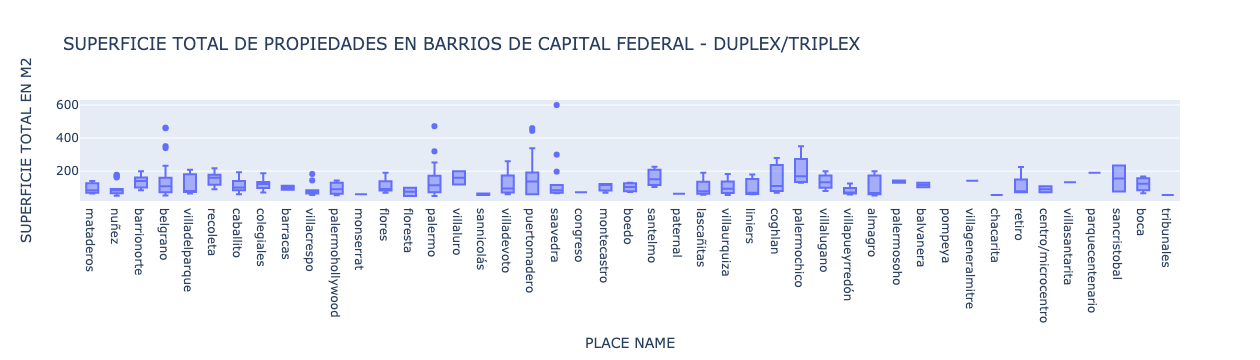

In [1037]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')], y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DUPLEX/TRIPLEX')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q3(75) + 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1038]:
duplex_outliers = ['nuñez','belgrano','villacrespo','palermo','puertomadero','saavedra']

df_duplex= df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]

for outliers in duplex_outliers:
    q1 = df_duplex[df_duplex['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_duplex[df_duplex['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_duplex_sup_max = df_duplex[np.logical_and(df_duplex['PLACE NAME']==outliers, df_duplex['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    
    df = df.drop(index_outlier_duplex_sup_max)


In [1039]:
df_duplex=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
df_duplex.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 42.000 244.000    73.000                    372.000   
mean   5.571   3.311  4164.384                    101.933   
std    4.379   1.166  3220.089                     47.713   
min    1.000   1.000    10.000                     48.000   
25%    2.000   2.000  1900.000                     64.750   
50%    4.500   3.000  3000.000                     88.000   
75%    8.750   4.000  6000.000                    129.000   
max   15.000   8.000 17000.000                    290.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 293.000            280.000     386.000     386.000  
mean                  114.549           2642.840  349255.303  303431.587  
std                    52.663           1020.009  605842.670  233171.598  
min                    50.000            250.000   23000.000   23000.000  
25%                    72.000           1979.762  175000.000  175000.000  
50%                    99.000           2451.989  240000.000  240000.000  
75%                   146.000           2989.473  357500.000  350000.000  
max                   350.000           6944.444 9435376.000 2300000.000

In [1040]:
duplex_index_expenses = df_duplex.sort_values('expenses')[:4].index
df_duplex.sort_values('expenses')[['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:4]



expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
24391    10.000                     80.000                 130.000   
53806   300.000                    150.000                 150.000   
55491   400.000                     56.000                     NaN   
79003   600.000                     99.000                 115.000   

       PRECIO USD POR M2  PRECIO USD  \
24391                NaN         NaN   
53806           1653.333  248000.000   
55491                NaN  185000.000   
79003           3295.652  379000.000   

                                                                                   title  
24391                                                               ventaduplexaestrenar  
53806              departamentoventa3ambientesbarrionorteduplexalavtaexcelenteestado!!!!  
55491                                                     departamentoenduplexconterraza  
79003  3ambientesenduplexconterrazapropiaamobladoexcelenteubicaciónprimerpisoporescalera

In [1041]:
# Vamos a dropear el primer indice, que no nos dice , y 10 es un valor muy bajo

df = df.drop(duplex_index_expenses[:1])

In [1042]:
df_duplex.sort_values('PRECIO USD', ascending = False)\
        [['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:5]


expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
31387       NaN                    290.000                 350.000   
4875        NaN                    252.000                 252.000   
9609        NaN                    265.000                     NaN   
33526       NaN                    239.000                 339.000   
60190 17000.000                    128.000                 190.000   

       PRECIO USD POR M2  PRECIO USD  \
31387           6571.429 2300000.000   
4875            6944.444 1750000.000   
9609                 NaN 1600000.000   
33526           4100.295 1390000.000   
60190           6578.947 1250000.000   

                                                               title  
31387      venta-impresionanteduplexconterrazayparrilla-barrioparque  
4875                     excelentetriplexmuyaltoconvistaaríoyalnorte  
9609                     triplexamobladodelujoenmolinosfaenabuilding  
33526  espectacularresidenciaenduplexconlasmejoresvistasdelyachtclub  
60190                            duplexenventa3ambientespuertomadero

Segun simulaciones en zonaprop son valores logicos los de PRECIO USD y PRECIO USD POR M2

## Piso/Penthouse

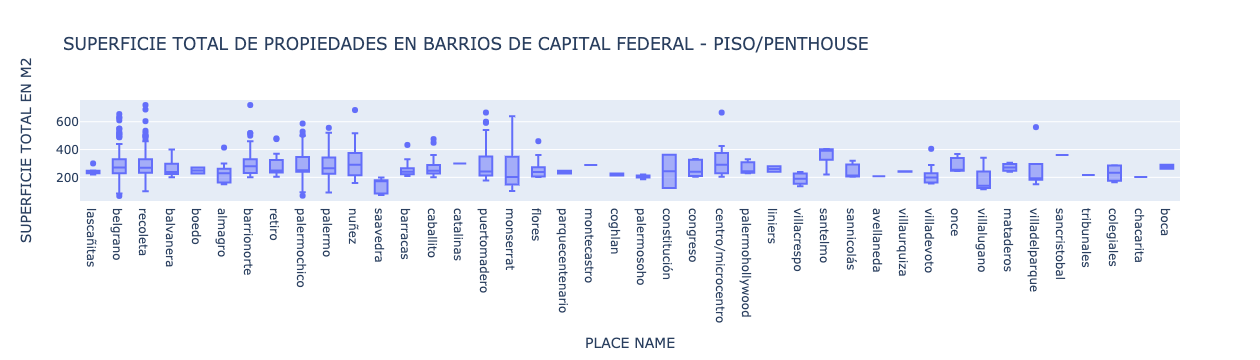

In [1043]:
fig = px.box(df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')],\
             y = "SUPERFICIE TOTAL EN M2", x='PLACE NAME', title= ' SUPERFICIE TOTAL DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PISO/PENTHOUSE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1044]:
piso_outliers = ['lascañitas','belgrano','recoleta','almagro','barrionorte','retiro','palermochico','palermo','nuñez','barracas','caballito','puertomadero','flores',
                  'centro/microcentro','villadevoto','villadelparque']

df_piso = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]

for outliers in store_outliers:
    q1 = df_piso[df_piso['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.25)
    q3 = df_piso[df_piso['PLACE NAME']==outliers]['SUPERFICIE TOTAL EN M2'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_piso_sup_max = df_piso[np.logical_and(df_piso['PLACE NAME']==outliers, df_piso['SUPERFICIE TOTAL EN M2'] > q3 + 1.5 * RIC)].index
    index_outlier_piso_sup_min = df_piso[np.logical_and(df_piso['PLACE NAME']==outliers, df_piso['SUPERFICIE TOTAL EN M2'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_piso_sup_max)
    df = df.drop(index_outlier_piso_sup_min)



In [1045]:
df_piso_caba=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
df_piso_caba.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 68.000 529.000   301.000                    819.000   
mean   4.559   5.268 12316.711                    480.424   
std    3.491   1.725  8196.969                   6527.613   
min    1.000   1.000     1.000                     48.000   
25%    1.000   4.000  6590.000                    199.000   
50%    4.000   5.000 11800.000                    234.000   
75%    7.000   6.000 16000.000                    294.000   
max   14.000  17.000 70000.000                 187000.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 759.000            687.000     784.000     784.000  
mean                  273.648           3517.867  969906.957  968055.091  
std                    81.843           2306.444  828591.429  828933.994  
min                    68.000            268.470   70000.000   70000.000  
25%                   220.000           2168.917  495000.000  493750.000  
50%                   250.000           2931.193  740000.000  740000.000  
75%                   313.000           4305.378 1200000.000 1200000.000  
max                   666.000          20731.707 8500000.000 8500000.000

In [1046]:
piso_index_ambientes = df_piso_caba.sort_values('rooms', ascending = False)[:10].index
df_piso_caba.sort_values('rooms', ascending = False)[['rooms','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]



rooms  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
37759 17.000                    359.000                     NaN   
13769 14.000                    320.000                 400.000   
9764  12.000                    363.000                 366.000   
26502 12.000                    417.000                 417.000   
33006 12.000                    320.000                 320.000   
40441 12.000                    329.000                 329.000   
39957 12.000                    554.000                     NaN   
27959 11.000                    300.000                 400.000   
29778 11.000                    273.000                 273.000   
25448 11.000                    623.000                     NaN   

       PRECIO USD POR M2  PRECIO USD  \
37759                NaN 1700000.000   
13769            837.500  335000.000   
9764            3278.689 1200000.000   
26502           2997.602 1250000.000   
33006           2171.875  695000.000   
40441           2844.985  936000.000   
39957                NaN 1380000.000   
27959            925.000  370000.000   
29778            915.751  250000.000   
25448                NaN  420000.000   

                                                                      title  \
37759                                      pisodecategoríaenventaenrecoleta   
13769                                     14habitaciones,5bañostodoen320mts   
9764     arroyoyesmeralda:oficina/viviendafrancesunico!!!frentehotelsofitel   
26502                              arenales2100increíbleduplexestilofránces   
33006                   mtdealvear-libertad320m2enimpactanteedificiofrances   
40441  arenalesal1800-edificiofrancesrecicladoensutotalidadconbajasexpensas   
39957                                       duplexdegrancategoríaconterraza   
27959                           pisode300m2cubiertoscon100m2deterrazapropia   
29778                                        ventahosteloviviendaensantelmo   
25448                                   hotel/pensionenbalvaneraaptocredito   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      description  
37759                                                                                                                                                                                                                                                                                             

In [1047]:
# El primer index, no podemos comprobar si realmente tiene 17 ambientes, asi que vamos a dropearlo, ya que no nos dice mucho

df = df.drop(piso_index_ambientes[:1])

df.loc[piso_index_ambientes[6],'TIPO DE PROPIEDAD']='duplex/triplex'

# Se trata de un hotel y no un piso
df = df.drop(piso_index_ambientes[9])


In [1048]:
piso_index_expensas = df_piso_caba.sort_values('expenses')[:10].index
df_piso_caba.sort_values('expenses')[['expenses','SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


expenses  SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  \
63002     1.000                    214.000                 214.000   
55379     1.000                    230.000                 280.000   
58620     1.000                    380.000                 400.000   
61537     1.000                    214.000                 214.000   
59061     1.000                    290.000                 380.000   
61547     1.000                    214.000                 214.000   
48579     1.000                    364.000                 364.000   
29185     5.000                        NaN                 209.000   
79619   850.000                    165.000                 165.000   
78982  1000.000                    134.000                 150.000   

       PRECIO USD POR M2  PRECIO USD  \
63002           7476.636 1600000.000   
55379           1000.000  280000.000   
58620           1000.000  400000.000   
61537           6542.056 1400000.000   
59061                NaN         NaN   
61547           7009.346 1500000.000   
48579           9615.385 3500000.000   
29185           1866.029  390000.000   
79619           1878.788  310000.000   
78982           1986.667  298000.000   

                                                 title  \
63002                renoiriisolpisoaltocondoscocheras   
55379                         piso5ambientes-mataderos   
58620                           oficinaenventasantelmo   
61537               renoirii-pisoaltosolcondoscocheras   
59061   unicodepartamentoconterrazaenchateaulibertador   
61547               renoiriisolcondoscocherasaestrenar   
48579                torremirabilia-5ambientes-palermo   
29185                              departamentoenventa   
79619                              departamentoenventa   
78982  impecablepisode150m2conbajasexpensasaptocrédito   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         description  
63002                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

In [1049]:
# Los 8 primeros valores de expensas estan mal imputados, vamos a cargarles NaN values.

df.loc[piso_index_expensas[:8],'expenses']=np.NaN

In [1050]:
piso_index_sup_cubierta = df_piso_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending = False)[:10].index
df_piso_caba.sort_values('SUPERFICIE CUBIERTA EN M2', ascending = False)[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
56218                 187000.000                     NaN                NaN   
33326                   3330.000                     NaN                NaN   
47225                   2949.000                     NaN                NaN   
34762                    655.000                     NaN                NaN   
48414                    639.000                 639.000            624.413   
25448                    623.000                     NaN                NaN   
43326                    611.000                 666.000                NaN   
34633                    600.000                     NaN                NaN   
11223                    600.000                 600.000           7500.000   
4193                     587.000                 587.000           5110.733   

       PRECIO USD                                                title  \
56218  600000.000                           excelentepisoenbarrionorte   
33326   70000.000            ventadepartamento2ambaptocredito-almagro-   
47225   76900.000            monoambienteconcocinaamericanaenbelgranor   
34762 2499000.000           vendepisobarrancasbelgrano8ambpiletapropia   
48414  399000.000                                           moreno1500   
25448  420000.000                  hotel/pensionenbalvaneraaptocredito   
43326         NaN                                       eylepetrona300   
34633         NaN                        departamentoenventaenrecoleta   
11223 4500000.000  torrerenoirii-pisode600m²vistaalrio7ambcon4cocheras   
4193  3000000.000                 importantepenthouseeninmejorablezona   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              description  
56218                                                                                                                                                                                 

In [1051]:
df.loc[piso_index_sup_cubierta[:1],['SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2']]=187

df = df.drop(piso_index_sup_cubierta[1])


In [1052]:
df_piso_caba.sort_values('PRECIO USD POR M2', ascending = False)\
[['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description']][:10]


SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
33003                    410.000                 410.000          20731.707   
18940                    200.000                 220.000          20000.000   
33002                    410.000                 410.000          19512.195   
33000                    300.000                 320.000          17187.500   
9972                     200.000                 211.000          12796.209   
41190                    250.000                 250.000          12000.000   
39663                    400.000                 400.000          11000.000   
36396                    377.000                 377.000          10875.332   
42632                    456.000                 516.000          10658.915   
39103                    456.000                 516.000          10658.915   

       PRECIO USD  \
33003 8500000.000   
18940 4400000.000   
33002 8000000.000   
33000 5500000.000   
9972  2700000.000   
41190 3000000.000   
39663 4400000.000   
36396 4100000.000   
42632 5500000.000   
39103 5500000.000   

                                                                                  title  \
33003                                      leparcalcorta-pisomuyaltode410m2con2cocheras   
18940                                             excelentepiso220m2c/dep2cocherasfijas   
33002                                      leparcalcorta-pisomuyaltode410m2con2cocheras   
33000                                             leparcalcorta-pisode320m2con2cocheras   
9972                                              leparcalcorta-pisode211m²con2cocheras   
41190  venta:semipisodegrancategoríaeimportantesterminacionesentorredemáximacategoría!!   
39663                     leparcdemaria4500-pisoaltisimorecicladovistaalriocon3cocheras   
36396                     leparcdemaria4500-pisoaltisimorecicladovistaalriocon3cocheras   
42632                                                               forumalcortatriplex   
39103                                              espectacularpenthouseenforumalcorta!   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     description  
33003                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Los precios son logicos, al simularlos en Zona Prop.

## Price

#### APARTAMENTOS - USD

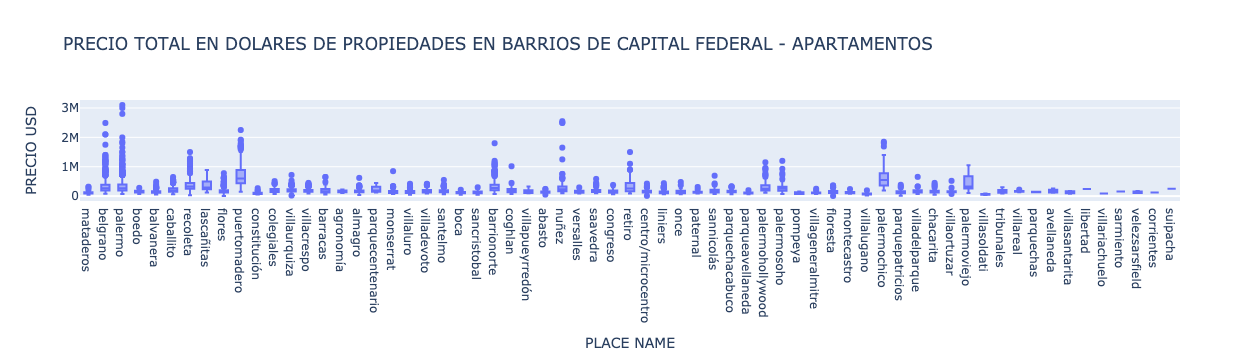

In [1053]:
df_departamento_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]

fig = px.box(df_departamento_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - APARTAMENTOS')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1054]:
precio_outliers_departamentos = ['mataderos','belgrano','palermo','boedo','balvanera','caballito','recoleta','flores','puertomadero','constitución','colegiales','villaurquiza',
                 'villacrespo','barracas','almagro','monserrat','villaluro','villadevoto','santelmo','boca','sancristobal','barrionorte','coghlan','abasto',
                 'nuñez','versalles','saavedra','congreso','retiro','centro/microcentro','liniers','once','paternal','sannicolás','parquechacabuco','parqueavellaneda',
                 'palermohollywood','palermosoho','villageneralmitre','floresta','montecastro','villalugano','palermochico','parquepatricios','villadelparque',
                 'chacarita','villaortuzar','villareal']


for outliers in precio_outliers_departamentos:
    q1 = df_departamento_capitalfederal[df_departamento_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_departamento_capitalfederal[df_departamento_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_ap_max = df_departamento_capitalfederal[np.logical_and(df_departamento_capitalfederal['PLACE NAME']==outliers, df_departamento_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_ap_min = df_departamento_capitalfederal[np.logical_and(df_departamento_capitalfederal['PLACE NAME']==outliers, df_departamento_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_ap_max)
    df = df.drop(index_outlier_ap_min)
    


In [1055]:
df_departamento_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')]
df_departamento_capitalfederal.describe().iloc[:,10:]

floor    rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 1209.000 5083.000  2856.000                   8030.000   
mean     5.157    3.260  3633.934                     84.727   
std      4.930    1.007  3094.334                     35.727   
min      1.000    1.000     1.000                     48.000   
25%      2.000    3.000  1800.000                     59.000   
50%      4.000    3.000  2900.000                     74.000   
75%      7.000    4.000  4500.000                    100.000   
max     55.000   12.000 54240.000                    419.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                7123.000           6489.000     8367.000    8350.000  
mean                   91.544           2712.958   293455.579  241891.708  
std                    40.058           1079.098   534735.117  161713.238  
min                    27.000             69.382    24300.000    6730.040  
25%                    62.000           2017.544   140000.000  139000.000  
50%                    80.000           2500.000   195000.000  190000.000  
75%                   111.000           3098.592   295000.000  290000.000  
max                   419.000           9620.351 14756597.000 1500000.000

In [1056]:
df_departamento_capitalfederal.sort_values('SUPERFICIE TOTAL EN M2')\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:5]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
72740                        NaN                  27.000           2218.519   
76291                        NaN                  27.000           2814.815   
75664                        NaN                  27.000           2740.741   
54251                        NaN                  27.000           4407.407   
82979                        NaN                  27.000           2851.852   

       PRECIO USD                     title  
72740   59900.000       departamento-flores  
76291   76000.000  departamento-palermosoho  
75664   74000.000    departamento-monserrat  
54251  119000.000  departamento-barrionorte  
82979   77000.000     departamento-belgrano

In [1057]:

df_departamento_capitalfederal.sort_values('PRECIO USD')\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']][:10]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
41381                     67.000                  97.000             69.382   
11007                     76.000                  82.000            122.426   
18828                     60.000                  60.000            405.000   
30137                        NaN                 154.000            187.498   
42428                     49.000                     NaN                NaN   
19071                        NaN                     NaN                NaN   
66747                        NaN                  27.000           1600.000   
20827                     70.000                  70.000            642.857   
19065                     50.000                  50.000            900.000   
27422                        NaN                     NaN                NaN   

       PRECIO USD  \
41381    6730.040   
11007   10038.970   
18828   24300.000   
30137   28874.750   
42428   39000.000   
19071   40000.000   
66747   43200.000   
20827   45000.000   
19065   45000.000   
27422   45000.000   

                                                                        title  
41381  3ambientesampliosenimpecableestadoconpatio1ºporescaleraenventaenflores  
11007              excelentedptode4ambcoch/baulera/parquepatriciosaptocrédito  
18828                                        sevendedpto4ambbarriopiedrabuena  
30137                                                       departamentoventa  
42428                                             ventadpto3ambenvillasoldati  
19071                                   excelente2ambienteconmuybuenprecio!!!  
66747                                                 departamento-scristobal  
20827                                                       departamentoventa  
19065                                                           dpto3ambsavio  
27422                                                departamentoenluganoiyii

In [1058]:
# De simulacion en la pagina ZonaProps, tomamos un precio minimo de 42.000 usd para un departamento en caba.

index_mal_precio_usd_m2 = df_departamento_capitalfederal[df_departamento_capitalfederal['PRECIO USD'] < 42000].index


df = df.drop(index_mal_precio_usd_m2)

In [1059]:
# Sobre el valor de las expensas, dropeamos los valores inferiores al quantil del 5%

q_expensas_caba=df_departamento_capitalfederal.expenses.quantile(0.05)

index_expensas_mal_cargadas=df_departamento_capitalfederal[df_departamento_capitalfederal.expenses < q_expensas_caba].index

df = df.drop(index_expensas_mal_cargadas)

#### Houses - usd

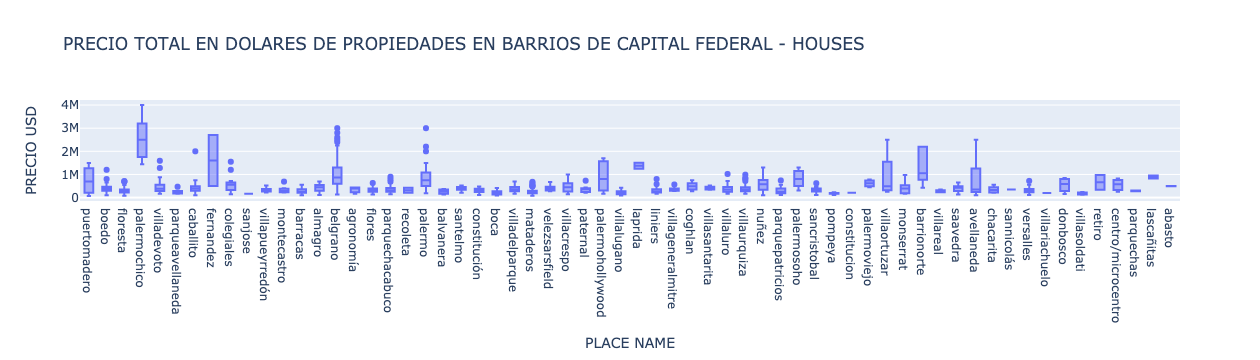

In [1060]:
df_houses_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
fig = px.box(df_houses_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - HOUSES')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1061]:
precio_outliers_casas_caba = ['boedo','floresta','villadevoto','parqueavellaneda','caballito','colegiales','montecastro','belgrano','flores','parquechacabuco',
                         'palermo','mataderos','paternal','liniers','villageneralmitre','villaluro','villaurquiza','parquepatricios','sancristobal']


for outliers in precio_outliers_casas_caba:
    q1 = df_houses_capitalfederal[df_houses_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_houses_capitalfederal[df_houses_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_h_max = df_houses_capitalfederal[np.logical_and(df_houses_capitalfederal['PLACE NAME']==outliers, df_houses_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_h_min = df_houses_capitalfederal[np.logical_and(df_houses_capitalfederal['PLACE NAME']==outliers, df_houses_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_h_max)
    df = df.drop(index_outlier_h_min)
    


In [1062]:
df_houses_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')]
df_houses_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 411.000     4.000                   1091.000   
mean   2.000   4.681  4525.250                    232.793   
std      NaN   1.534  4445.914                    130.058   
min    2.000   1.000     1.000                     48.000   
25%    2.000   4.000  1500.250                    140.000   
50%    2.000   5.000  4050.000                    200.000   
75%    2.000   5.000  7075.000                    293.000   
max    2.000  11.000 10000.000                   1015.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 897.000            776.000    1121.000    1119.000  
mean                  310.550           1571.565  444674.844  444099.643  
std                   236.095            891.685  390472.473  389931.700  
min                    48.000            257.143   70000.000   70000.000  
25%                   184.000           1050.868  240000.000  240000.000  
50%                   260.000           1395.032  349000.000  349000.000  
75%                   380.000           1894.737  490000.000  490000.000  
max                  3484.000          12121.212 4000000.000 4000000.000

nota : El valor minimo de pisos en casas es 2, debido a los NaN

In [1063]:
index_precio_mal_ingresad=df_houses_capitalfederal.sort_values('PRECIO USD',ascending = False)[:4].index

df_houses_capitalfederal.sort_values('PRECIO USD',ascending = False)[:4]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title','description','PLACE NAME']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
4180                     330.000                 330.000          12121.212   
15392                    500.000                 600.000           5333.333   
52643                    530.000                 530.000           6037.736   
20143                    527.000                 527.000           6072.106   

       PRECIO USD                                            title  \
4180  4000000.000        casamodernadedoblefrenteenimpecableestado   
15392 3200000.000  barrioparque:espectacularcasaconpiletasobreombú   
52643 3200000.000                     importantecasaenbarrioparque   
20143 3200000.000                                         ombu2900   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  description  \
4180                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            planosdeimportanteestudiodearquitecturacasamodernaen3plantas:livingycomedor,estar,toilette,cocinaconcomedordiario,patio,1dependenciaconbaño,jardínconpiletayparrilla,garage1erpiso:playroom,escritorio2dopiso:3suites,terraza   
15392  espectacularcasaenunadelascallesmáslindasdebarrioparque(ombú)lotede340m2lafachadadelacasatieneretirosobreelfrente,pudiendoestacionarunautoencocheracubiertayotroendescubiertaenlaplantaencontramos:halldeentradatoilettederecepciónlivingenlconsalidaalexteriorcomedordegrandesdimensionessobreelfrentedelacasacocinarecicladaconcomedordiario,tambiénconsalidaafueraespectacularjardínconparrillaypiletaclimatizadademuybuenasmedidasenelprimerpisoencontramosunampliohalldedistribucióny4dormitorios,2deellosensuitey1escritorioconsubañoenelsegundopiso,mastersuitedegrandesproporcionesalfrenteconventanal,doblevestidorybañogranplayroomconvistaaljardín,gimnasioytoiletteeneltercerpiso,lavadero,2dormitoriosdeservicio,bañoyterrazadeexcelentesmedidaslacasaestarecicladaíntegramenteanuevohacepocosaños(incluyendocañeríaseinstalacióneléctrica)tieneascensoratodoslospisospisoradianteeléctricocontermostatoregulableparacadaambientemuyluminosaespectacular!   
52643                                               casaenbarrioparqueconjardín,parrillaypileta,todorodeadodeverdeenpbseencuentraelhalldeentrada,comedoralfrente,importantelivingenlconvistaaljardín,toilettederecepción,cocinaconcomedordiarioconsalidaaljardín,jardínconparrillaypiletaclimatizadacocheracubiertaydescubiertaprimerpiso:granhalldedistribución,4dormitorios(2ensuiteydosensemisuite)yunescritorioconbaño(puedeserun5tod

In [1064]:
# El primer index, tiene un valor un 50% mas elevado a las simulaciones en zonaprop, vamos a droppearlo.

df = df.drop(index_precio_mal_ingresad[0])


### PH - usd

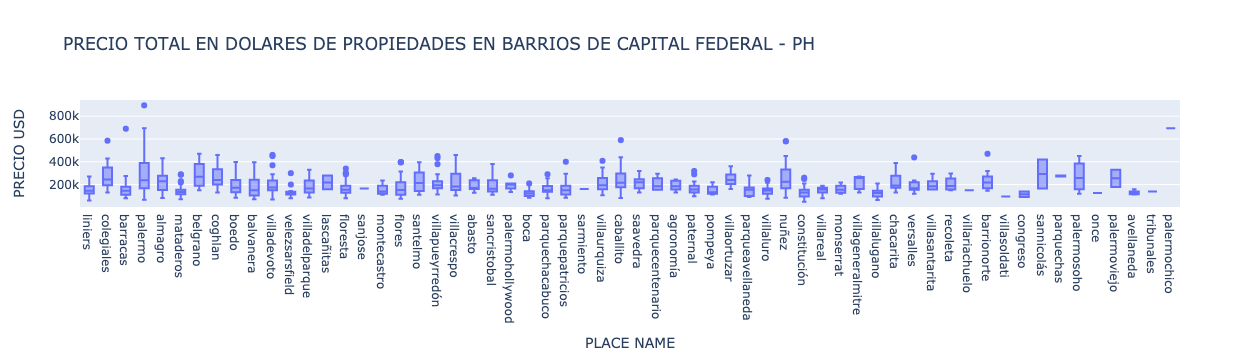

In [1065]:
df_ph_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
fig = px.box(df_ph_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PH')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1066]:
precio_outliers_ph_caba = ['colegiales','barracas','palermo','mataderos','villadevoto','velezsarsfield','floresta','flores','villapueyrredón','palermohollywood',
                           'boca','parquechacabuco','parquepatricios','villaurquiza','caballito','paternal','villaluro','nuñez','constitución','versalles','barrionorte']


for outliers in precio_outliers_ph_caba:
    q1 = df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_ph_capitalfederal[df_ph_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_ph_max = df_ph_capitalfederal[np.logical_and(df_ph_capitalfederal['PLACE NAME']==outliers, df_ph_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_ph_min = df_ph_capitalfederal[np.logical_and(df_ph_capitalfederal['PLACE NAME']==outliers, df_ph_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_ph_max)
    df = df.drop(index_outlier_ph_min)
    


In [1067]:
df_ph_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')]
df_ph_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 81.000 725.000   115.000                   1088.000   
mean   1.889   3.724   979.861                     98.354   
std    1.332   1.123   886.098                     44.621   
min    1.000   1.000     1.000                     48.000   
25%    1.000   3.000   400.000                     65.000   
50%    1.000   4.000   700.000                     86.000   
75%    2.000   4.000  1500.000                    120.000   
max    6.000   9.000  4600.000                    360.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 904.000            874.000    1165.000    1164.000  
mean                  130.244           1628.094  190929.099  190030.807  
std                    67.491            567.280   92500.805   87875.010  
min                    23.000            500.000   50000.000   50000.000  
25%                    78.000           1181.610  130000.000  130000.000  
50%                   111.000           1550.509  165000.000  165000.000  
75%                   161.250           2000.000  229500.000  229125.000  
max                   430.000           3630.435 1185000.000  695000.000

In [1068]:
# Sobre el valor de las expensas, dropeamos los valores inferiores al quantil del 10%

q_expensas_caba=df_ph_capitalfederal.expenses.quantile(0.10)

index_expensas_mal_cargadas=df_ph_capitalfederal[df_ph_capitalfederal.expenses < q_expensas_caba].index

df = df.drop(index_expensas_mal_cargadas)

#### Stores - usd

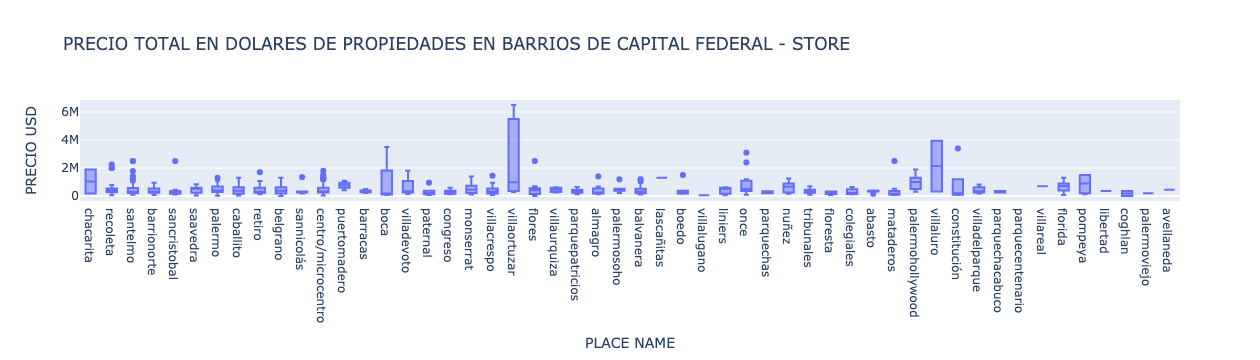

In [1069]:
df_stores_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]

fig = px.box(df_stores_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - STORE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1070]:
precio_outliers_store_caba = ['recoleta','santelmo','sancristobal','palermo','retiro','sannicolás','centro/microcentro','paternal','villacrespo','flores',
                              'almagro','palermosoho','balvanera','boedo','once','mataderos','constitución']


for outliers in precio_outliers_store_caba:
    q1 = df_stores_capitalfederal[df_stores_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_stores_capitalfederal[df_stores_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_store_max = df_stores_capitalfederal[np.logical_and(df_stores_capitalfederal['PLACE NAME']==outliers, df_stores_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_store_min = df_stores_capitalfederal[np.logical_and(df_stores_capitalfederal['PLACE NAME']==outliers, df_stores_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_store_max)
    df = df.drop(index_outlier_store_min)
    


In [1071]:
df_stores_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')]
df_stores_capitalfederal.describe().iloc[:,10:]

floor  rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count  1.000 20.000    98.000                    525.000   
mean   4.000  2.500  3862.367                    224.947   
std      NaN  2.965  3412.629                    366.818   
min    4.000  1.000   400.000                     48.000   
25%    4.000  1.000  1271.500                     86.000   
50%    4.000  1.000  3000.000                    140.000   
75%    4.000  2.250  5000.000                    240.000   
max    4.000 10.000 17500.000                   3700.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2        PRICE  PRECIO USD  
count                 555.000            475.000      543.000     540.000  
mean                  216.605           2720.632   503274.737  444781.648  
std                   309.911           2119.928   870853.289  499494.259  
min                    30.000             96.696    28500.000    5608.360  
25%                    88.000           1455.416   209500.000  209750.000  
50%                   141.000           2198.582   330000.000  330000.000  
75%                   248.000           3281.322   550000.000  546250.000  
max                  3700.000          22000.000 12581296.000 6500000.000

In [1072]:
df_stores_capitalfederal.sort_values('PRECIO USD')[:10]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
47595                     58.000                  58.000             96.696   
71112                     70.000                  70.000            128.191   
71099                     70.000                  70.000            128.191   
75361                    230.000                 270.000            105.556   
4611                     300.000                 300.000            116.667   
49114                        NaN                     NaN                NaN   
68630                        NaN                  30.000           1500.000   
12823                        NaN                     NaN                NaN   
13476                     60.000                  60.000            825.000   
61740                        NaN                     NaN                NaN   

       PRECIO USD                                  title  
47595    5608.360  excelentelocalenventaconrentaenflores  
71112    8973.380          ventafondodecomercioencoghlan  
71099    8973.380         ventafondodecomercioenbelgrano  
75361   28500.000       ventafondodecomercioenlascañitas  
4611    35000.000                           localenventa  
49114   45000.000               fondodecomercio-saavedra  
68630   45000.000           localenzonacomercial1rajunta  
12823   48000.000      localc/fondodecomercioenlugano1y2  
13476   49500.000      econmicoslocalesengaleraenliniers  
61740   52000.000                    localsobreavsantafe

In [1073]:
# Precio minimo de store, 45000 usd

index_precio_usd_mal=df_stores_capitalfederal[df_stores_capitalfederal['PRECIO USD'] < 45000].index 

df = df.drop(index_precio_usd_mal)

### Depositos - usd

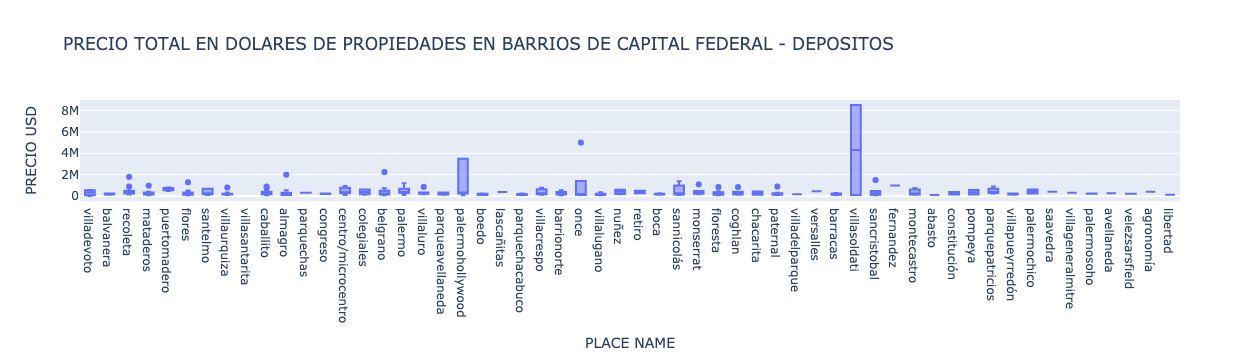

In [1074]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
fig = px.box(df_depositos_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DEPOSITOS')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1075]:
precio_outliers_depositos_caba = ['recoleta','mataderos','flores','villaurquiza','almagro','belgrano','villaluro','once','monserrat','floresta','paternal','sancristobal']


for outliers in precio_outliers_depositos_caba:
    q1 = df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_depositos_capitalfederal[df_depositos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_depo_max = df_depositos_capitalfederal[np.logical_and(df_depositos_capitalfederal['PLACE NAME']==outliers, df_depositos_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_depo_min = df_depositos_capitalfederal[np.logical_and(df_depositos_capitalfederal['PLACE NAME']==outliers, df_depositos_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_depo_max)
    df = df.drop(index_outlier_depo_min)
    


In [1076]:
df_depositos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')]
df_depositos_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 36.000 191.000    48.000                    341.000   
mean   4.889   3.581  3410.396                    192.830   
std    3.336   1.920  3298.513                    604.603   
min    1.000   1.000   300.000                     48.000   
25%    3.000   3.000  1750.000                     70.000   
50%    4.000   3.000  2500.000                    107.000   
75%    6.000   4.000  3850.000                    187.000   
max   16.000  18.000 19000.000                  10958.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 270.000            244.000     351.000     338.000  
mean                  249.407           2272.446  481690.399  355832.459  
std                   693.110           1452.584  907205.442  552259.875  
min                    26.000            500.000   19900.000   19900.000  
25%                    77.250           1303.261  164000.000  159250.000  
50%                   140.000           2031.442  245000.000  239999.000  
75%                   231.000           2892.409  425000.000  405125.000  
max                 10958.000           9750.000 8500000.000 8500000.000

#### Duplex/Triplex - usd

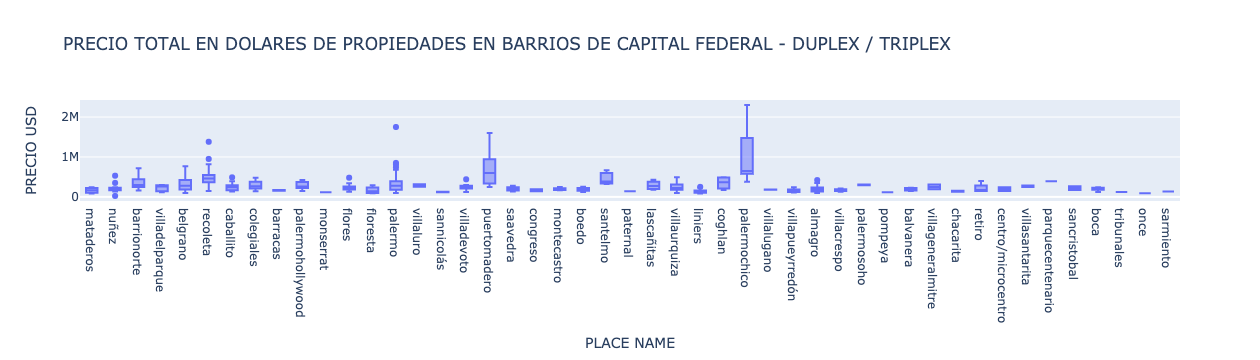

In [1077]:
df_duplex_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
fig = px.box(df_duplex_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - DUPLEX / TRIPLEX')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1078]:
precio_outliers_duplex_caba = ['nuñez','recoleta','caballito','flores','palermo','villadevoto','liniers','almagro']


for outliers in precio_outliers_duplex_caba:
    q1 = df_duplex_capitalfederal[df_duplex_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_duplex_capitalfederal[df_duplex_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_duplex_max = df_duplex_capitalfederal[np.logical_and(df_duplex_capitalfederal['PLACE NAME']==outliers, df_duplex_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_duplex_min = df_duplex_capitalfederal[np.logical_and(df_duplex_capitalfederal['PLACE NAME']==outliers, df_duplex_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_duplex_max)
    df = df.drop(index_outlier_duplex_min)
    


In [1079]:
df_duplex_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='duplex/triplex')]
df_duplex_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 42.000 238.000    68.000                    357.000   
mean   5.571   3.277  4046.912                     99.641   
std    4.379   1.158  3047.801                     45.565   
min    1.000   1.000   300.000                     48.000   
25%    2.000   2.000  1897.500                     64.000   
50%    4.500   3.000  3000.000                     85.000   
75%    8.750   4.000  6000.000                    129.000   
max   15.000   8.000 17000.000                    290.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 278.000            267.000     370.000     370.000  
mean                  111.748           2611.252  340604.181  292798.899  
std                    51.092            944.075  611724.974  216907.699  
min                    50.000            900.000   82000.000   82000.000  
25%                    71.000           1975.397  175000.000  175000.000  
50%                    98.000           2451.923  235000.000  235000.000  
75%                   143.750           2946.239  339000.000  335000.000  
max                   350.000           6611.111 9435376.000 2300000.000

#### Piso/Penthouses - usd

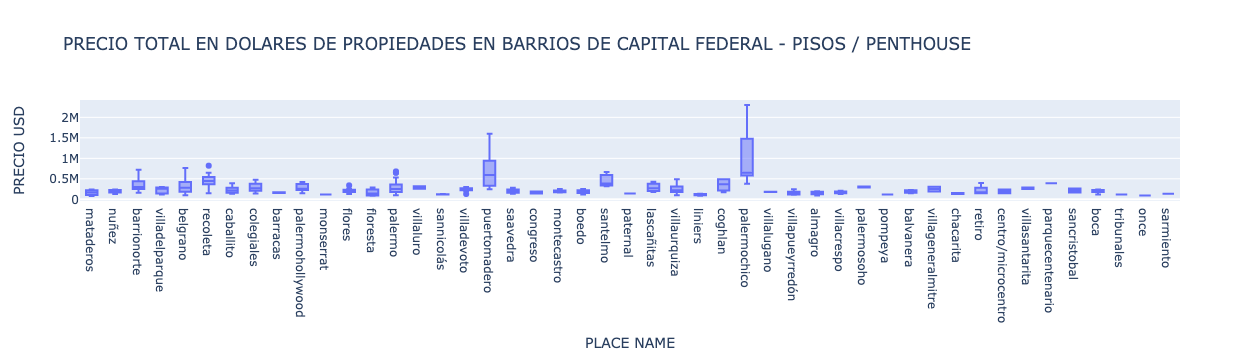

In [1080]:
df_pisos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
fig = px.box(df_duplex_capitalfederal, y = "PRECIO USD", x='PLACE NAME'\
             ,title= ' PRECIO TOTAL EN DOLARES DE PROPIEDADES EN BARRIOS DE CAPITAL FEDERAL - PISOS / PENTHOUSE')

fig.show()

Vamos a optar por dropear los valores de superficie mayores a q(75) + 1.5 RIC y menores a q(25) - 1.5 RIC, para los barrios de caba donde haya outliers, dado que son valores muy extremos de superficie, y son casos excepcionales, poco comunes y poco representativos para darnos informacion sobre el PRECIO USD POR M2 de un inmueble en esa zona.


In [1081]:
precio_outliers_pisos_caba = ['recoleta','flores','palermo']


for outliers in precio_outliers_pisos_caba:
    q1 = df_pisos_capitalfederal[df_pisos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.25)
    q3 = df_pisos_capitalfederal[df_pisos_capitalfederal['PLACE NAME']==outliers]['PRECIO USD'].quantile(.75)
    RIC = q3-q1
    
    index_outlier_pisos_max = df_pisos_capitalfederal[np.logical_and(df_pisos_capitalfederal['PLACE NAME']==outliers, df_pisos_capitalfederal['PRECIO USD'] > q3 + 1.5 * RIC)].index    
    index_outlier_pisos_min = df_pisos_capitalfederal[np.logical_and(df_pisos_capitalfederal['PLACE NAME']==outliers, df_pisos_capitalfederal['PRECIO USD'] < q1 - 1.5 * RIC)].index
    
    df = df.drop(index_outlier_pisos_max)
    df = df.drop(index_outlier_pisos_min)
    


In [1086]:
df_pisos_capitalfederal=df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')]
df_pisos_capitalfederal.describe().iloc[:,10:]

floor   rooms  expenses  SUPERFICIE CUBIERTA EN M2  \
count 65.000 513.000   292.000                    800.000   
mean   4.538   5.230 12627.801                    242.532   
std    3.446   1.596  8049.777                     82.540   
min    1.000   2.000   850.000                     48.000   
25%    1.000   4.000  7000.000                    197.500   
50%    4.000   5.000 12000.000                    230.500   
75%    7.000   6.000 16000.000                    290.000   
max   14.000  14.000 70000.000                    655.000   

       SUPERFICIE TOTAL EN M2  PRECIO USD POR M2       PRICE  PRECIO USD  
count                 747.000            674.000     765.000     765.000  
mean                  272.185           3445.701  943137.456  941239.597  
std                    81.432           2245.485  799572.431  799872.599  
min                    68.000            268.470  110000.000   89937.580  
25%                   220.000           2148.946  490000.000  490000.000  
50%                   250.000           2913.921  735000.000  735000.000  
75%                   310.000           4218.216 1190000.000 1190000.000  
max                   666.000          20731.707 8500000.000 8500000.000

In [1083]:
index_sup_cuv = df_pisos_capitalfederal.sort_values('SUPERFICIE CUBIERTA EN M2',ascending = False)[:5].index
df_pisos_capitalfederal.sort_values('SUPERFICIE CUBIERTA EN M2',ascending = False)[:5]\
    [['SUPERFICIE CUBIERTA EN M2','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRECIO USD','title']]

SUPERFICIE CUBIERTA EN M2  SUPERFICIE TOTAL EN M2  PRECIO USD POR M2  \
47225                   2949.000                     NaN                NaN   
34762                    655.000                     NaN                NaN   
48414                    639.000                 639.000            624.413   
43326                    611.000                 666.000                NaN   
11223                    600.000                 600.000           7500.000   

       PRECIO USD                                                title  
47225   76900.000            monoambienteconcocinaamericanaenbelgranor  
34762 2499000.000           vendepisobarrancasbelgrano8ambpiletapropia  
48414  399000.000                                           moreno1500  
43326         NaN                                       eylepetrona300  
11223 4500000.000  torrerenoirii-pisode600m²vistaalrio7ambcon4cocheras

In [1085]:
# Dropeo el primer indice, ya que el valor de sup cuv esta mal ingresado.

df = df.drop(index_sup_cuv[0])

### Correlacion entre variables

**Vamos a seguir trabajando solo con capital federal y sus barrios**

##### CORRELACION EN APARTAMENTOS UBICADOS EN CAPITAL FEDERAL

In [1092]:
sanjose=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='sanjose')].index
df.loc[sanjose,'place_name']='sanjose'


In [1093]:
suipacha=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='suipacha')].index
df.loc[suipacha,'PLACE NAME']='monserrat'

In [1094]:
lima=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='lima')].index
df.loc[lima,'PLACE NAME']='santarita'

In [1095]:
laprida = df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='laprida')].index
df.loc[laprida[0],'PLACE NAME']='recoleta'
df = df.drop(laprida[1])

In [1096]:
florida=df[np.logical_and(df['place_name']=='capitalfederal',df['PLACE NAME']=='florida')].index
df.loc[florida,'state_name']='bsasgbazonanorte'


In [1097]:
sanjos=df[np.logical_and(df['place_name']=='sanjose',df['PLACE NAME']=='sanjose')].index
df.loc[sanjos[:2],'state_name']='bsasgbazonasur'

In [1122]:
comunas_dict={
'constitucion':'comuna1',
'catalinas':'comuna1',
'libertad':'comuna1',
'retiro':'comuna1',
'sannicolás':'comuna1',
'puertomadero':'comuna1',
'santelmo':'comuna1',
'montserrat':'comuna1',
'monserrat':'comuna1',
'constitución':'comuna1',
'centro/microcentro':'comuna1',
'centro':'comuna1',
'tribunales':'comuna1',
'sannicolás':'comuna1',
'recoleta':"comuna2",
'barrionorte':'comuna2',
'billinghurst':"comuna2",
'balvanera':"comuna3",
'sancristobal':"comuna3",
'abasto':"comuna3",
'congreso':"comuna3",
'sarmiento':'comuna3',
'once':"comuna3",
'fernandez':'comuna3',
'corrientes':'comuna3',
'boca':"comuna4",
'barracas':"comuna4",
'parquepatricios':"comuna4",
'pompeya':"comuna4",
'catalinas':"comuna4",
'almagro':"comuna5",
'boedo':"comuna5",
'donbosco':'comuna5',
'caballito':"comuna6",
'parquecentenario':'comuna6',
'flores':"comuna7",
'parquechacabuco':"comuna7",
'rivadavia':"comuna7",
'villasoldati':"comuna8",
'villariachuelo':"comuna8",
'villalugano':"comuna8",
'liniers':"comuna9",
'mataderos':"comuna9",
'parqueavellaneda':"comuna9",
'avellaneda':"comuna9",
'villareal':"comuna10",
'montecastro':"comuna10", 
'versalles':"comuna10", 
'floresta':"comuna10", 
'velezsarsfield':"comuna10",
'villaluro':"comuna10",
'villageneralmitre':"comuna11", 
'villadevoto':"comuna11", 
'villadelparque':"comuna11",
'villasantarita':"comuna11",
'santarita':'comuna11',
'coghlan':"comuna12",
'saavedra':"comuna12",
'villaurquiza':"comuna12",
'villapueyrredón':"comuna12",
'nuñez':"comuna13",
'belgrano':"comuna13",
'colegiales':"comuna13",
'palermo':"comuna14",
'lasheras':'comuna14',
'palermochico':"comuna14",
'palermohollywood':"comuna14",
'palermoviejo':"comuna14",
'palermosoho':'comuna14',
'lascañitas':"comuna14",
'chacarita':"comuna15",
'villacrespo':"comuna15",
'paternal':"comuna15",
'villaortuzar':"comuna15",
'agronomía':"comuna15",
'parquechas':"comuna15",
}

# colors = sns.color_palette(n_colors=15)
dict_colors={'comuna1':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
            'comuna2':(1.0, 0.4980392156862745, 0.054901960784313725),
            'comuna3':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
            'comuna4':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
            'comuna5':(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
            'comuna6':(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
            'comuna7':(0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
            'comuna8':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
            'comuna9':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
            'comuna10':(0.09019607843137255, 0.7450980392156863, 0.8117647058823529),
            'comuna11':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
            'comuna12':(1.0, 0.4980392156862745, 0.054901960784313725),
            'comuna13':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
            'comuna14':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
            'comuna15':(0.5803921568627451, 0.403921568627451, 0.7411764705882353)
}

df_capitalfederal = df.loc[df.state_name=='capitalfederal']
comunas_serie = df_capitalfederal['PLACE NAME'].replace(comunas_dict)
df['COMUNAS']=comunas_serie

In [1123]:
def correlation_plotter(data_to_plot,cols_to_plot):
    g = sns.PairGrid(data_to_plot, vars=cols_to_plot, hue='COMUNAS' ,palette=dict_colors)
    g.map(plt.scatter, alpha=0.6)
    g.add_legend();
    plt.show()

In [1124]:
df_corr_capitalfederal_apartment = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='apartment')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','floor','rooms','expenses','PLACE NAME','COMUNAS']]
df_corr_capitalfederal_apartment.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.707   
PRECIO USD                             0.707       1.000   
SUPERFICIE TOTAL EN M2                 0.084       0.695   
SUPERFICIE CUBIERTA EN M2              0.167       0.695   
floor                                  0.220       0.182   
rooms                                 -0.109       0.317   
expenses                               0.392       0.717   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                           0.084                      0.167   
PRECIO USD                                  0.695                      0.695   
SUPERFICIE TOTAL EN M2                      1.000                      0.916   
SUPERFICIE CUBIERTA EN M2                   0.916                      1.000   
floor                                       0.069                      0.031   
rooms                                       0.605                      0.641   
expenses                                    0.590                      0.616   

                           floor  rooms  expenses  
PRECIO USD POR M2          0.220 -0.109     0.392  
PRECIO USD                 0.182  0.317     0.717  
SUPERFICIE TOTAL EN M2     0.069  0.605     0.590  
SUPERFICIE CUBIERTA EN M2  0.031  0.641     0.616  
floor                      1.000 -0.024     0.189  
rooms                     -0.024  1.000     0.376  
expenses                   0.189  0.376     1.000

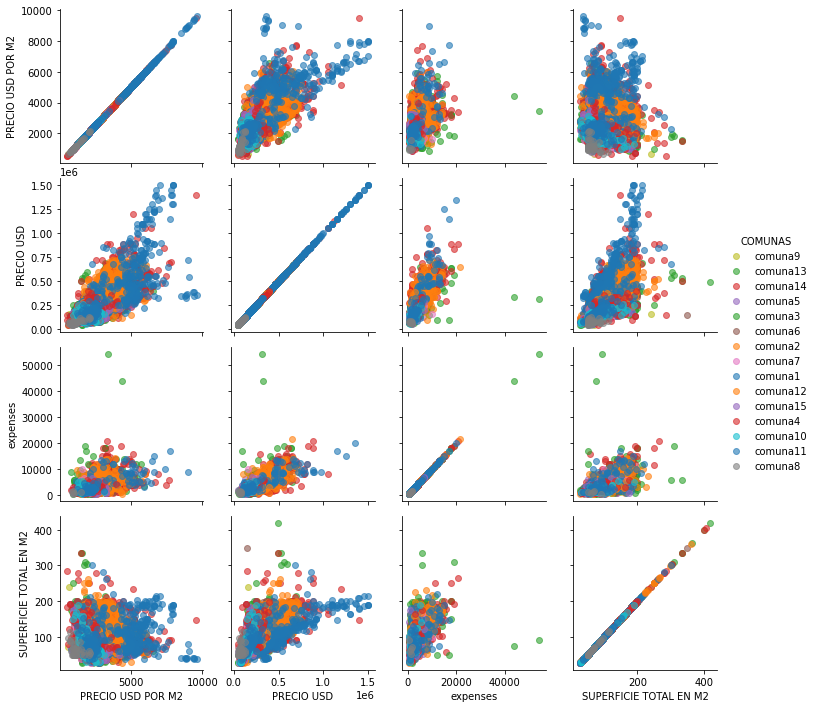

In [1125]:
correlation_plotter(df_corr_capitalfederal_apartment,['PRECIO USD POR M2','PRECIO USD','expenses','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones DEPARTAMENTOS:

   * Podemos ver que logicamente hay una correlacion `POSITIVA` con el PRECIO USD.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de las EXPENSAS del departamento, departamentos ubicados en zonas mas costosas o que tienen        mas amenities, suelen tener un PRECIO USD POR M2 mayor.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de SUPERFICIE del departamento.

##### CORRELACION EN CASAS UBICADAS EN CAPITAL FEDERAL

In [1126]:
df_corr_capitalfederal_houses = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='house')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME','COMUNAS']]
df_corr_capitalfederal_houses.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.629   
PRECIO USD                             0.629       1.000   
SUPERFICIE TOTAL EN M2                -0.121       0.584   
SUPERFICIE CUBIERTA EN M2              0.077       0.677   
rooms                                  0.035       0.382   
expenses                               0.372      -0.457   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.121                      0.077   
PRECIO USD                                  0.584                      0.677   
SUPERFICIE TOTAL EN M2                      1.000                      0.775   
SUPERFICIE CUBIERTA EN M2                   0.775                      1.000   
rooms                                       0.376                      0.543   
expenses                                   -0.171                     -0.449   

                           rooms  expenses  
PRECIO USD POR M2          0.035     0.372  
PRECIO USD                 0.382    -0.457  
SUPERFICIE TOTAL EN M2     0.376    -0.171  
SUPERFICIE CUBIERTA EN M2  0.543    -0.449  
rooms                      1.000       NaN  
expenses                     NaN     1.000

In [1127]:
drop=df_corr_capitalfederal_houses[df_corr_capitalfederal_houses['PLACE NAME']=='sanjose'].index
df=df.drop(drop)

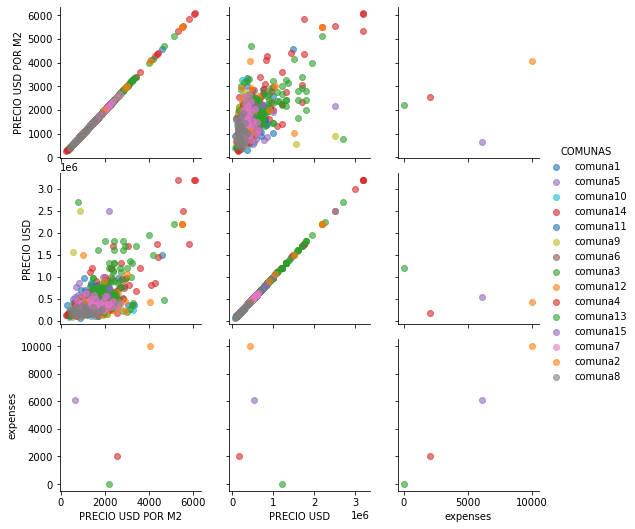

In [1128]:
correlation_plotter(df_corr_capitalfederal_houses,['PRECIO USD POR M2','PRECIO USD','expenses'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones CASAS:

   * Podemos ver que logicamente hay una correlacion `POSITIVA` con el PRECIO USD.
   
   * Pareciera haber una correlacion `POSITIVA`, entre el valor de las EXPENSAS y el PRECIO USD POR M2, pero al ser tan pocos datos los que tenemos de expensas      en casas, hay que tener cuidado con esta conclusion, no sabemos si es representativo.

##### CORRELACION EN PHs UBICADOS EN CAPITAL FEDERAL

In [1129]:
df_corr_capitalfederal_ph = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='ph')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME',"COMUNAS"]]
df_corr_capitalfederal_ph.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.207   
PRECIO USD                             0.207       1.000   
SUPERFICIE TOTAL EN M2                -0.485       0.689   
SUPERFICIE CUBIERTA EN M2             -0.360       0.647   
rooms                                 -0.283       0.486   
expenses                               0.179       0.244   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.485                     -0.360   
PRECIO USD                                  0.689                      0.647   
SUPERFICIE TOTAL EN M2                      1.000                      0.843   
SUPERFICIE CUBIERTA EN M2                   0.843                      1.000   
rooms                                       0.619                      0.629   
expenses                                    0.132                      0.288   

                           rooms  expenses  
PRECIO USD POR M2         -0.283     0.179  
PRECIO USD                 0.486     0.244  
SUPERFICIE TOTAL EN M2     0.619     0.132  
SUPERFICIE CUBIERTA EN M2  0.629     0.288  
rooms                      1.000     0.016  
expenses                   0.016     1.000

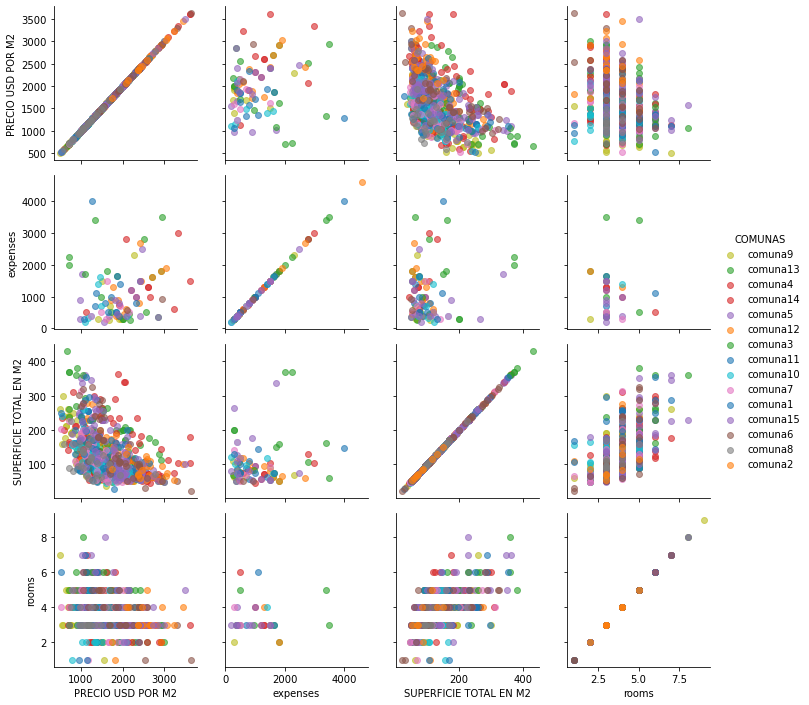

In [1130]:
correlation_plotter(df_corr_capitalfederal_ph,['PRECIO USD POR M2','expenses','SUPERFICIE TOTAL EN M2','rooms'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones PHs:
   
   * Podemos ver que hay una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y las SUPERFICIES que ocupa el PH, a medida que aumentan las dimensiones de los      PH, el PRECIO USD POR M2, va disminuyendo.
    
   * Podemos ver que hay una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la cantidad de ambientes del PH, lo cual esta relacionado con la conclusion        anterior sobre las dimensiones del PH.
   
   * Podemos ver que hay una correlacion `POSITIVA` entre el PRECIO USD POR M2 y las EXPENSAS que paga el PH, esto se debe probablemente, porque                    PHs ubicados en zonas mas costosas pagan mayores expensas.

##### CORRELACION EN DEPOSITOS UBICADOS EN CAPITAL FEDERAL

In [1131]:
df_corr_capitalfederal_depositos = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='deposito')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME',"COMUNAS"]]
df_corr_capitalfederal_depositos.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.076   
PRECIO USD                             0.076       1.000   
SUPERFICIE TOTAL EN M2                -0.143       0.909   
SUPERFICIE CUBIERTA EN M2             -0.127       0.938   
rooms                                 -0.250       0.458   
expenses                               0.289       0.510   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.143                     -0.127   
PRECIO USD                                  0.909                      0.938   
SUPERFICIE TOTAL EN M2                      1.000                      0.995   
SUPERFICIE CUBIERTA EN M2                   0.995                      1.000   
rooms                                       0.589                      0.690   
expenses                                    0.473                      0.562   

                           rooms  expenses  
PRECIO USD POR M2         -0.250     0.289  
PRECIO USD                 0.458     0.510  
SUPERFICIE TOTAL EN M2     0.589     0.473  
SUPERFICIE CUBIERTA EN M2  0.690     0.562  
rooms                      1.000     0.546  
expenses                   0.546     1.000

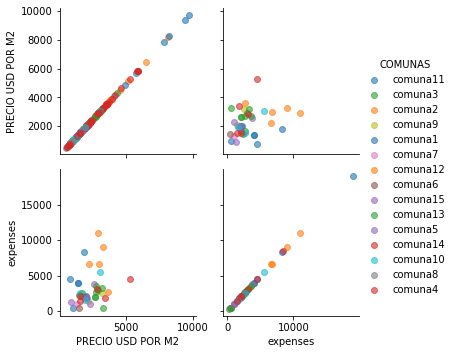

In [1132]:
correlation_plotter(df_corr_capitalfederal_depositos,['PRECIO USD POR M2','expenses'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones DEPOSITOS:

*nota: Se tomo como Deposito desde Naves Industriales, hasta inmuebles que ofrecian un Deposito.*
       
   * Pareciera existir una correlacion `POSITIVA` entre el PRECIO USD POR M2 y las EXPENSAS que paga el DEPOSITO, pero al ser una cantidad pequeña de datos,        hay que tener cuidado con esta conclusion, no sabemos si es representativa.

##### CORRELACION EN STORES UBICADOS EN CAPITAL FEDERAL

In [1133]:
df_corr_capitalfederal_stores = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='store')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME',"COMUNAS"]]
df_corr_capitalfederal_stores.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.169   
PRECIO USD                             0.169       1.000   
SUPERFICIE TOTAL EN M2                -0.208       0.816   
SUPERFICIE CUBIERTA EN M2             -0.207       0.754   
rooms                                 -0.343       0.012   
expenses                              -0.129       0.092   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                          -0.208                     -0.207   
PRECIO USD                                  0.816                      0.754   
SUPERFICIE TOTAL EN M2                      1.000                      0.997   
SUPERFICIE CUBIERTA EN M2                   0.997                      1.000   
rooms                                       0.484                      0.431   
expenses                                    0.051                      0.040   

                           rooms  expenses  
PRECIO USD POR M2         -0.343    -0.129  
PRECIO USD                 0.012     0.092  
SUPERFICIE TOTAL EN M2     0.484     0.051  
SUPERFICIE CUBIERTA EN M2  0.431     0.040  
rooms                      1.000     0.997  
expenses                   0.997     1.000

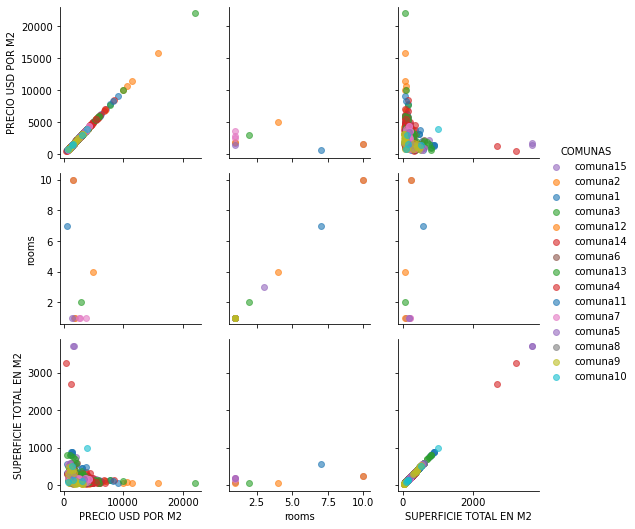

In [1134]:
correlation_plotter(df_corr_capitalfederal_stores,['PRECIO USD POR M2','rooms','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones STORES:

   * Pareciera haber una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la SUPERFICIE, Stores de mayores superficies, su PRECIO USD POR M2 va                  disminuyendo.
   
   * Pareciera haber una correlacion `NEGATIVA` entre el PRECIO USD POR M2 y la cantidad de AMBIENTES del STORE, pero al ser una cantidad pequeña de datos, hay      que tener cuidado con esta conclusion, puede no ser representativa.

##### CORRELACION EN PISOS/SEMI-PISOS/PENTHOUSES UBICADOS EN CAPITAL FEDERAL

In [1135]:
df_corr_capitalfederal_pisos = df[np.logical_and(df.state_name=='capitalfederal',df['TIPO DE PROPIEDAD']=='piso/penthouse')][['PRECIO USD POR M2','PRECIO USD','SUPERFICIE TOTAL EN M2','SUPERFICIE CUBIERTA EN M2','rooms','expenses','PLACE NAME',"COMUNAS"]]
df_corr_capitalfederal_pisos.corr()

PRECIO USD POR M2  PRECIO USD  \
PRECIO USD POR M2                      1.000       0.899   
PRECIO USD                             0.899       1.000   
SUPERFICIE TOTAL EN M2                 0.179       0.503   
SUPERFICIE CUBIERTA EN M2              0.309       0.514   
rooms                                 -0.097       0.021   
expenses                               0.536       0.604   

                           SUPERFICIE TOTAL EN M2  SUPERFICIE CUBIERTA EN M2  \
PRECIO USD POR M2                           0.179                      0.309   
PRECIO USD                                  0.503                      0.514   
SUPERFICIE TOTAL EN M2                      1.000                      0.830   
SUPERFICIE CUBIERTA EN M2                   0.830                      1.000   
rooms                                       0.317                      0.406   
expenses                                    0.326                      0.469   

                           rooms  expenses  
PRECIO USD POR M2         -0.097     0.536  
PRECIO USD                 0.021     0.604  
SUPERFICIE TOTAL EN M2     0.317     0.326  
SUPERFICIE CUBIERTA EN M2  0.406     0.469  
rooms                      1.000     0.156  
expenses                   0.156     1.000

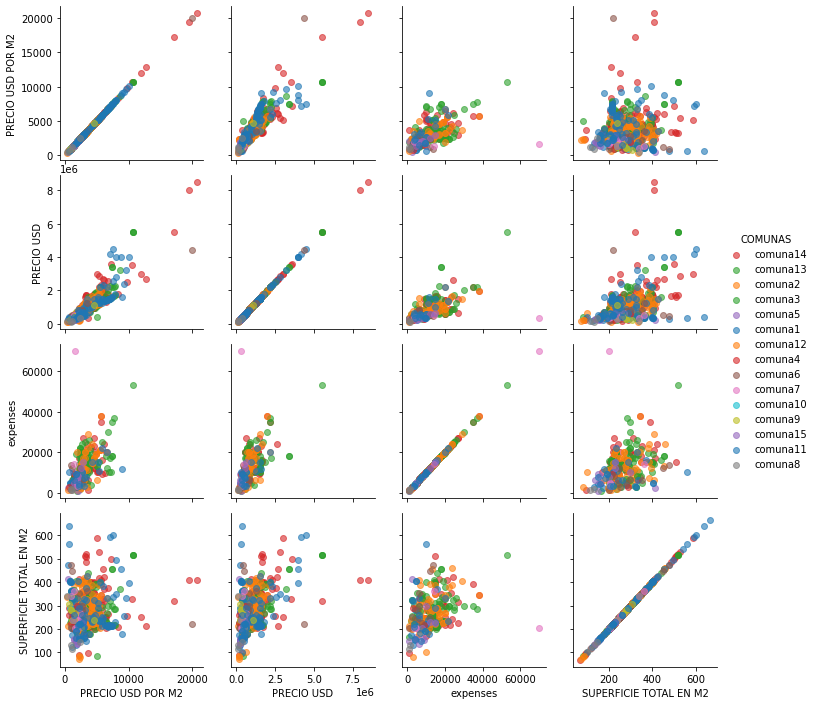

In [1136]:
correlation_plotter(df_corr_capitalfederal_pisos,['PRECIO USD POR M2','PRECIO USD','expenses','SUPERFICIE TOTAL EN M2'])

Queremos observar que variables guardan una relacion lineal, con nuestra variable objetivo PRECIO USD POR M2

Conclusiones PISOS/SEMI-PISOS/PENTHOUSES:

   * Podemos ver que hay una correlacion `POSITIVA` con el PRECIO USD.
   
   * Podemos ver que hay una correlacion `POSITIVA` con el valor de las EXPENSAS del PISO, inmuebles ubicados en zonas mas costosas o que tienen mas amenities,      suelen tener un PRECIO USD POR M2 mayor.
   
   * A diferencia de otras propiedades, donde el PRECIO USD POR M2, disminuia conforme aumentaban las dimensiones de la propiedad, en este caso, podemos ver        que hay una correlacion `POSITIVA` entre las SUPERFICIES y el PRECIO USD POR M2, similar a lo que ocurre con los apartamentos, al aumentar la superficie        del inmueble, el PRECIO USD POR M2, tiene a aumentar.


### Variables Cuantitativas y Categoricas

## 8) Analisis y Operacion Sobre Datos Faltantes

In [ ]:
df[['PLACE NAME','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRICE','CURRENCY','PRECIO USD','TIPO DE PROPIEDAD']].isnull().sum()/df.shape[0]*100

En primer lugar, vemos que podemos imputar algunos valores de PRECIO USD POR M2, a partir de SUPERFICIE TOTAL EN M2 y PRECIO USD

In [ ]:
df_PRECIO_USD_POR_M2_NULL_mask=df['PRECIO USD POR M2'].isnull()


df.loc[df_PRECIO_USD_POR_M2_NULL_mask,'PRECIO USD POR M2'] = df[['PRECIO USD','SUPERFICIE TOTAL EN M2']].apply(lambda x: x['PRECIO USD']/x['SUPERFICIE TOTAL EN M2'], axis=1)

In [ ]:
df[['PLACE NAME','SUPERFICIE TOTAL EN M2','PRECIO USD POR M2','PRICE','CURRENCY','PRECIO USD','TIPO DE PROPIEDAD']].isnull().sum()/df.shape[0]*100

Logramos bajar un 1% aproximadamente

## SUPERFICIE TOTAL EN M2 - IMPUTACION

De acuerdo, y en mi caso lo pensaría así. Ya en parte 'afectaste' el target en aquellos registros que se calcularon dividiendo el PRICE por la mediana imputada. (y tal vez sería más estricto, por ej, tomando además de la zona para calcular la mediana, la cantidad de ambientes, por ej) Una vez hecho eso, vería cuánto se afectó el target, es decir cómo quedó la nueva distribución respecto de la original (por ejemplo, comparando un scatterplot de USD_por_m2 contra Sup_m2 antes y después de imputar). Si no cambió,  y la cantidad de datos recupetados lo amerita, me quedo con la imputación (y este criterio lo miraría por barrio). Sino, no. Si luego me quedaron nans, es porque no los pude rescatar de ninguna manera, con lo cual lo único que voy a hacer si imputo es generar datos totalmente inventados en función de una mediana, 'matando' la varianza que pudiera haber. Eso último no lo haría.
para mirar si cambió o no la distribución despuués de imputar, podés hacer un gráfico de antes y después de los precios

In [ ]:
444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444444

### Floor

Sabemos que los departamentos que se encuentran en los pisos superiores de los edificios, suelen tener precios superiores a los que se encuentran cerca de la planta baja, pero nuestra columna floor, esta muy vacia, vamos a ver si podemos completarla con la informacion que encontramos en la columna 'description'

In [ ]:
df.property_type.value_counts()

In [ ]:
departamento_mask = df.property_type=='apartment'
patron_piso = re.compile(r'(\d+(º)?(\s)?(piso))|((piso)(\s)?\d+(º)?)')

encuentra_piso=df.loc[departamento_mask,'description'].apply(lambda x: re.search(patron_piso,str(x)))

encuentra_piso_mask=encuentra_piso.notnull()

pisos=encuentra_piso[encuentra_piso_mask].apply(lambda x: x.group())


In [ ]:
# pisos.shape
pisos.sample(10)

Nuestro REGEX matchea dentro de todo bastante bien, solo debemos filtrar algunos valores altos. Pero primero, vamos a filtrar y convertir a int, nuestra variable pisos

In [ ]:
pisos_sin_piso=pisos.replace("piso"," ",regex=True)
pisos_sin_piso = pisos_sin_piso.apply(lambda x: str(x).strip())
pisos_clean_str = pisos_sin_piso.replace("º","",regex=True)
pisos_int = pisos_clean_str.apply(lambda y: int(y))
pisos_int.sample(5)

Ahora, voy a intentar sacarme de encima a los pocos valores que el regex me tomo por error, primero defino con mi criterio, que los edificios no pueden tener mas de 40 pisos

In [ ]:
pisos_filtrado_mask = pisos_int <= 50

pisos_filtrado_menor50=pisos_int[pisos_filtrado_mask]

In [ ]:
g=sns.histplot(pisos_filtrado_menor50)
sns.set(rc = {'figure.figsize':(15,6)})
g.set_title("DISTRIBUCION DE LOS DEPARTAMENTOS SEGUN LOS PISOS", fontsize = 17)
g.set_xlabel("PISO DE LA PROPIEDAD", fontsize = 15)
g.set_ylabel("CANTIDAD DE DEPARTAMENTOS", fontsize = 15)

La gran mayoria de los departamentos, rondan entre el 2do y 10mo piso

In [ ]:
pisos_filtrado_menor50.median()

Porcentaje de valores faltantes en floor para viviendas tipo departamento

In [ ]:
df.floor[departamento_mask].isnull().sum()/df.floor[departamento_mask].shape[0]*100

Ahora con estos valores de pisos, voy a imputar mi columna floor, en las filas donde property_type sea apartment y floor tenga valor nan

In [ ]:
null_floor_mask = df.floor.isnull()
departamento_mask
departamento_y_floor_null=np.logical_and(departamento_mask,null_floor_mask)

df.loc[departamento_y_floor_null,'floor']=pisos_filtrado_menor50

In [ ]:
df.floor[departamento_mask].isnull().sum()/df.floor[departamento_mask].shape[0]*100

Bajo el porcentaje de nulos, pero aun sigue siendo muy alto para tomar esta columna como relevante.

### Rooms

Es posible que la cantidad de ambientes en los departamentos, que se encuentren en la misma zona (place_name), influya en el valor del inmueble, pero tenemos un 60.9% de columnas Null, veremos si podemos obtener alguna informacion de la columna description, como hicimos con floor.

In [ ]:
patron_ambientes = re.compile(r'\d+(\s)?(ambiente(s)?)|\d+(\s)?(amb(\.)?)')


encuentra_ambientes=df.loc[departamento_mask,'description'].apply(lambda x: re.search(patron_ambientes,str(x)))

encuentra_ambientes_mask=encuentra_ambientes.notnull()

ambientes=encuentra_ambientes[encuentra_ambientes_mask].apply(lambda x: x.group())
ambientes.sample(30)
# ambientes.shape
ambientes.value_counts()

Podemos ver que nuestro Regex funciono bastante bien, pero hay alguno valores que hay que filtrar, para esto primero vamos a convertir a dato numerico 

In [ ]:
ambientes_sin_ambientes=ambientes.replace("ambientes"," ",regex=True)
ambientes_sin_ambientes_sin_ambiente=ambientes_sin_ambientes.replace("ambiente"," ",regex=True)
ambientes_sin_ambientes_sin_ambiente_sin_amb=ambientes_sin_ambientes_sin_ambiente.replace("amb(\.)?"," ",regex=True)

ambientes_clean_str = ambientes_sin_ambientes_sin_ambiente_sin_amb.apply(lambda x: str(x).strip())
ambientes_int = ambientes_clean_str.apply(lambda y: int(y))
ambientes_int.sample(5)

Voy a tomar un criterio de que mas de 10 ambientes, en un departamento, es un valor incorrecto

In [ ]:
ambientes_menor_10=ambientes_int<10
ambientes_clean=ambientes_int[ambientes_menor_10]

In [ ]:
g1=sns.histplot(ambientes_clean)
sns.set(rc = {'figure.figsize':(15,6)})
g1.set_title("CANTIDAD DE DEPARTAMENTOS EN FUNCION DE SU N DE AMBIENTES", fontsize = 17)
g1.set_xlabel("Nº AMBIENTES", fontsize = 15)
g1.set_ylabel("CANTIDAD DE DEPARTAMENTOS", fontsize = 15)

Podemos observar que la gran mayoria de los departamentos en venta, tienen 2 y 3 ambientes

Porcentaje de valores faltantes en la columna rooms, para viviendas tipo departamento.

In [ ]:
df.rooms[departamento_mask].isnull().sum()/df.rooms[departamento_mask].shape[0]*100

Ahora vamos a imputar con ambientes_clean, algunos de los valores faltantes de rooms

In [ ]:
rooms_null_mask=df.rooms.isnull()
departamento_rooms_null_mask = np.logical_and(rooms_null_mask,departamento_mask)

df.loc[departamento_rooms_null_mask,'rooms']=ambientes_clean

df.rooms[departamento_mask].isnull().sum()/df.rooms[departamento_mask].shape[0]*100

Podemos ver como bajamos casi un 20% el valor de NaN rows en los inmuebles tipo departamento

## 10) Generacion de nuevas variables explicativas

### Cocheras

Vamos a filtrar los departamentos que tengan cochera, para estudiar si el precio por m2 aumenta en estos casos.

In [ ]:
df_departamentos = df[departamento_mask]

patron_cochera = re.compile(r'cochera(s)?|garage(s)?|garaje(s)?')

encuentra_cochera=df.loc[departamento_mask,'description'].apply(lambda x: re.search(patron_cochera,str(x)))

departamentos_con_cochera_mask=encuentra_cochera.notnull()


departamentos_con_cochera = df_departamentos[departamentos_con_cochera_mask]
departamentos_con_cochera.sample(3)

## Piscinas

Vamos a ver de todas las propiedades, cuales tienen pileta, para ver si esto afecta al valor por metro cuadrado de la propiedad

In [ ]:
patron_pileta = re.compile(r'piscina|pileta')

encuentra_pileta=df['description'].apply(lambda x: re.search(patron_pileta,str(x)))

inmuebles_con_pileta_mask=encuentra_pileta.notnull()


inmuebles_con_pileta = df[inmuebles_con_pileta_mask]

In [ ]:
list(inmuebles_con_pileta.description.sample(1))